# DATA MERGING

In [1]:
# importing libraries
import pandas as pd
import numpy as np

In [2]:
# reading mobileusebasedata
df1 = pd.read_csv('mobileusebasedata.csv')
df1.head()

user               first_open  dayofweek       hour  age  \
0  235136  2012-12-27 02:14:51.273          3   02:00:00   23   
1  333588  2012-12-02 01:16:00.905          6   01:00:00   24   
2  254414  2013-03-19 19:19:09.157          1   19:00:00   23   
3  234192  2013-07-05 16:08:46.354          4   16:00:00   28   
4   51549  2013-02-26 18:50:48.661          1   18:00:00   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   used_premium_feature  enrolled            enrolled_date  liked  
0                     0         0                      NaN      0  
1                     0         0                      NaN      0  
2                     1         0                      NaN      1  
3                     0         1  2013-07-05 16:11:49.513      0  
4                     0         1  2013-02-26 18:56:37.841      1

In [3]:
df1.shape

(50000, 12)

In [4]:
# checking for class imbalance
df1['enrolled'].value_counts()

1    31074
0    18926
Name: enrolled, dtype: int64

In [5]:
# checking what kind of values are there in screen_list column
df1['screen_list'][0]

'idscreen,joinscreen,Cycle,product_review,ScanPreview,VerifyDateOfBirth,VerifyPhone,VerifyToken,ProfileVerifySSN,Loan2,Settings,ForgotPassword,Login'

In [6]:
# reading most_used_screens data
df2 = pd.read_csv('most_used_screens.csv')
df2.head()

Unnamed: 0       top_screens
0           0             Loan2
1           1          location
2           2      Institutions
3           3  Credit3Container
4           4       VerifyPhone

In [7]:
# Checking all screens available in screen_list
all_screens = list(df1['screen_list'])
text = ','.join(all_screens)
unique_screens = set(text.split(','))
unique_screens

{'About',
 'AccountView',
 'AddProperty',
 'AddVehicle',
 'AdverseActions',
 'Alerts',
 'BVPlaidLinkContainer',
 'BVStats',
 'BankVerification',
 'BoostFriendsList',
 'CC1',
 'CC1Category',
 'CC3',
 'CameraScreen',
 'CommunityAndInvites',
 'ContactInfoConfirm',
 'Credit1',
 'Credit2',
 'Credit3',
 'Credit3Alerts',
 'Credit3CTA',
 'Credit3Container',
 'Credit3Dashboard',
 'Credits',
 'Cycle',
 'EditProfile',
 'EmploymentInfo',
 'EmploymentSummary',
 'Finances',
 'FindFriendsCycle',
 'ForgotPassword',
 'GroupedInstitutions',
 'History',
 'Home',
 'IdAndSelfieCameraScreen',
 'IdentityVerification',
 'InstantLoanSSN',
 'InstantOfferCreateAccount',
 'Institutions',
 'LLLoanAmount',
 'LandingScreen',
 'Leaderboard',
 'ListPicker',
 'Loan',
 'Loan1',
 'Loan2',
 'Loan3',
 'Loan4',
 'LoanAppAgreement',
 'LoanAppBankInfo',
 'LoanAppConfirmWithdrawal',
 'LoanAppDenied',
 'LoanAppESign',
 'LoanAppLoan4',
 'LoanAppPaymentSchedule',
 'LoanAppPromoCode',
 'LoanAppReasons',
 'LoanAppRequestAmount',
 '

In [8]:
# creating copy of original data
df1_copy = df1.copy()

In [9]:
# Converting all the unique values in screen_list column as dummies
dummies_columns = (df1_copy.screen_list.str.split('\s*,\s*', expand=True)
   .stack()
   .str.get_dummies()
   .sum(level=0))

C:\Users\jayant.yadav\AppData\Local\Temp\ipykernel_26484\2733942172.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  dummies_columns = (df1_copy.screen_list.str.split('\s*,\s*', expand=True)


In [10]:
dummies_columns

About  AccountView  AddProperty  AddVehicle  AdverseActions  Alerts  \
0          0            0            0           0               0       0   
1          0            0            0           0               0       0   
2          0            0            0           0               0       0   
3          0            0            0           0               0       0   
4          0            0            0           0               0       0   
...      ...          ...          ...         ...             ...     ...   
49995      0            0            0           0               0       0   
49996      0            0            0           0               0       0   
49997      0            0            0           0               0       0   
49998      0            0            0           0               0       0   
49999      0            0            0           0               0       0   

       BVPlaidLinkContainer  BVStats  BankVerification  BoostFriendsList  ...  \
0                         0        0                 0                 0  ...   
1                         0        0                 0                 0  ...   
2                         0        0                 0                 0  ...   
3                         0        0                 0                 0  ...   
4                         0        0                 1                 0  ...   
...                     ...      ...               ...               ...  ...   
49995                     0        0                 0                 0  ...   
49996                     0        0                 0                 0  ...   
49997                     0        0                 0                 0  ...   
49998                     0        0                 1                 0  ...   
49999                     0        0                 0                 0  ...   

       WelcomeBankVerification  YourNetwork  idscreen  joinscreen  location  \
0                            0            0         1           1         0   
1                            0            0         0           1         1   
2                            0            0         0           0         0   
3                            0            0         0           0         1   
4                            0            0         1           1         0   
...                        ...          ...       ...         ...       ...   
49995                        0            0         0           0         0   
49996                        0            0         0           0         0   
49997                        0            0         0           1         1   
49998                        0            0         0           0         1   
49999                        0            0         0           0         0   

       product_review  product_review2  product_review3  product_review4  \
0                   1                0                0                0   
1                   1                1                0                0   
2                   0                0                0                0   
3                   2                0                0                0   
4                   2                1                0                0   
...               ...              ...              ...              ...   
49995               2                0                1                0   
49996               0                0                0                0   
49997               1                1                0                0   
49998               7                0                1                0   
49999               1                0                0                0   

       product_review5  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  
...                ...  
49995                0  
49996                0  
49997     

In [11]:
# Checking for all the dummies
dummies_columns.columns

Index(['About', 'AccountView', 'AddProperty', 'AddVehicle', 'AdverseActions',
       'Alerts', 'BVPlaidLinkContainer', 'BVStats', 'BankVerification',
       'BoostFriendsList',
       ...
       'WelcomeBankVerification', 'YourNetwork', 'idscreen', 'joinscreen',
       'location', 'product_review', 'product_review2', 'product_review3',
       'product_review4', 'product_review5'],
      dtype='object', length=137)

In [12]:
# Making the list of column those we want in our final data
top_screens_list = list(df2.top_screens)
top_screens_list

['Loan2',
 'location',
 'Institutions',
 'Credit3Container',
 'VerifyPhone',
 'BankVerification',
 'VerifyDateOfBirth',
 'ProfilePage',
 'VerifyCountry',
 'Cycle',
 'idscreen',
 'Credit3Dashboard',
 'Loan3',
 'CC1Category',
 'Splash',
 'Loan',
 'CC1',
 'RewardsContainer',
 'Credit3',
 'Credit1',
 'EditProfile',
 'Credit2',
 'Finances',
 'CC3',
 'Saving9',
 'Saving1',
 'Alerts',
 'Saving8',
 'Saving10',
 'Leaderboard',
 'Saving4',
 'VerifyMobile',
 'VerifyHousing',
 'RewardDetail',
 'VerifyHousingAmount',
 'ProfileMaritalStatus',
 'ProfileChildren ',
 'ProfileEducation',
 'Saving7',
 'ProfileEducationMajor',
 'Rewards',
 'AccountView',
 'VerifyAnnualIncome',
 'VerifyIncomeType',
 'Saving2',
 'Saving6',
 'Saving2Amount',
 'Saving5',
 'ProfileJobTitle',
 'Login',
 'ProfileEmploymentLength',
 'WebView',
 'SecurityModal',
 'Loan4',
 'ResendToken',
 'TransactionList',
 'NetworkFailure',
 'ListPicker']

In [13]:
# remove whitespaces from each value in list
top_screens_list_clean = []
for i  in top_screens_list:
  top_screens_list_clean.append(i.strip())

In [14]:
# Selecting only required columns those are mentioned in top_screens_list_clean list
dummies_columns_selected  = dummies_columns[top_screens_list_clean]

In [15]:
dummies_columns_selected.head()

Loan2  location  Institutions  Credit3Container  VerifyPhone  \
0      1         0             0                 0            1   
1      1         1             1                 0            1   
2      0         0             0                 0            0   
3      0         1             0                 0            1   
4      1         0             1                 1            1   

   BankVerification  VerifyDateOfBirth  ProfilePage  VerifyCountry  Cycle  \
0                 0                  1            0              0      1   
1                 0                  1            0              1      0   
2                 0                  0            0              0      1   
3                 0                  1            0              0      0   
4                 1                  0            0              1      1   

   ...  ProfileJobTitle  Login  ProfileEmploymentLength  WebView  \
0  ...                0      1                        0        0   
1  ...                0      0                        0        0   
2  ...                0      0                        0        0   
3  ...                0      0                        0        0   
4  ...                0      0                        0        0   

   SecurityModal  Loan4  ResendToken  TransactionList  NetworkFailure  \
0              0      0            0                0               0   
1              0      0            0                0               0   
2              0      0            0                0               0   
3              0      0            0                0               0   
4              0      0            0                0               0   

   ListPicker  
0           0  
1           0  
2           0  
3           0  
4           0  

[5 rows x 58 columns]

In [16]:
# Seecting remaining columns those are not in top_screens_list_clean
dummies_columns_remain = dummies_columns.drop(top_screens_list_clean,axis=1)

In [17]:
dummies_columns_remain.head()

About  AddProperty  AddVehicle  AdverseActions  BVPlaidLinkContainer  \
0      0            0           0               0                     0   
1      0            0           0               0                     0   
2      0            0           0               0                     0   
3      0            0           0               0                     0   
4      0            0           0               0                     0   

   BVStats  BoostFriendsList  CameraScreen  CommunityAndInvites  \
0        0                 0             0                    0   
1        0                 0             0                    0   
2        0                 0             0                    0   
3        0                 0             0                    0   
4        0                 0             0                    0   

   ContactInfoConfirm  ...  VerifySSN  VerifyToken  WelcomeBankVerification  \
0                   0  ...          0            1                        0   
1                   0  ...          0            1                        0   
2                   0  ...          0            0                        0   
3                   0  ...          1            0                        0   
4                   0  ...          1            1                        0   

   YourNetwork  joinscreen  product_review  product_review2  product_review3  \
0            0           1               1                0                0   
1            0           1               1                1                0   
2            0           0               0                0                0   
3            0           0               2                0                0   
4            0           1               2                1                0   

   product_review4  product_review5  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0  

[5 rows x 79 columns]

In [61]:
dummies_columns_remain.columns

Index(['About', 'AddProperty', 'AddVehicle', 'AdverseActions',
       'BVPlaidLinkContainer', 'BVStats', 'BoostFriendsList', 'CameraScreen',
       'CommunityAndInvites', 'ContactInfoConfirm', 'Credit3Alerts',
       'Credit3CTA', 'Credits', 'EmploymentInfo', 'EmploymentSummary',
       'FindFriendsCycle', 'ForgotPassword', 'GroupedInstitutions', 'History',
       'Home', 'IdAndSelfieCameraScreen', 'IdentityVerification',
       'InstantLoanSSN', 'InstantOfferCreateAccount', 'LLLoanAmount',
       'LandingScreen', 'Loan1', 'LoanAppAgreement', 'LoanAppBankInfo',
       'LoanAppConfirmWithdrawal', 'LoanAppDenied', 'LoanAppESign',
       'LoanAppLoan4', 'LoanAppPaymentSchedule', 'LoanAppPromoCode',
       'LoanAppReasons', 'LoanAppRequestAmount', 'LoanAppScheduleCall',
       'LoanAppSuccess', 'LoanAppVerifyBankInfo', 'LoanAppWithdrawn',
       'LoginForm', 'MLWebView', 'ManageFinances', 'NetworkUser',
       'NewContactListInvite', 'Payoff', 'ProfileAnnualIncome',
       'ProfileCompanyN

In [18]:
# Summing all the remaining columns values so that we can create a new column called 'Other'
Others = dummies_columns_remain.sum(axis=1)
Others

0         7
1         5
2         0
3         6
4        10
         ..
49995     7
49996     1
49997     6
49998    13
49999     4
Length: 50000, dtype: int64

In [19]:
# Creating 'Other' column after concatinating orinial data and dummies data
df1_copy_ = pd.concat([df1_copy,dummies_columns_selected],axis=1)
df1_copy_['Other'] = Others

In [66]:
# creating list of all columns of the dataframe that we have creating
df1_copy_cols = list(df1_copy_.columns)

In [67]:
df1_copy_cols

['user',
 'first_open',
 'dayofweek',
 'hour',
 'age',
 'screen_list',
 'numscreens',
 'minigame',
 'used_premium_feature',
 'enrolled',
 'enrolled_date',
 'liked',
 'Loan2',
 'location',
 'Institutions',
 'Credit3Container',
 'VerifyPhone',
 'BankVerification',
 'VerifyDateOfBirth',
 'ProfilePage',
 'VerifyCountry',
 'Cycle',
 'idscreen',
 'Credit3Dashboard',
 'Loan3',
 'CC1Category',
 'Splash',
 'Loan',
 'CC1',
 'RewardsContainer',
 'Credit3',
 'Credit1',
 'EditProfile',
 'Credit2',
 'Finances',
 'CC3',
 'Saving9',
 'Saving1',
 'Alerts',
 'Saving8',
 'Saving10',
 'Leaderboard',
 'Saving4',
 'VerifyMobile',
 'VerifyHousing',
 'RewardDetail',
 'VerifyHousingAmount',
 'ProfileMaritalStatus',
 'ProfileChildren',
 'ProfileEducation',
 'Saving7',
 'ProfileEducationMajor',
 'Rewards',
 'AccountView',
 'VerifyAnnualIncome',
 'VerifyIncomeType',
 'Saving2',
 'Saving6',
 'Saving2Amount',
 'Saving5',
 'ProfileJobTitle',
 'Login',
 'ProfileEmploymentLength',
 'WebView',
 'SecurityModal',
 'Loan4

In [21]:
sel_cols = list(dummies_columns_selected.columns)

In [22]:
# Selected Columns so that by adding them we can create 'SavingCount' column

SavingCount = [col for col in sel_cols if col.startswith('Saving')]
print(SavingCount)

['Saving9', 'Saving1', 'Saving8', 'Saving10', 'Saving4', 'Saving7', 'Saving2', 'Saving6', 'Saving2Amount', 'Saving5']


In [23]:
# Selected Columns so that by adding them we can create 'CCCount' column

CCCount = [col for col in sel_cols if col.startswith('CC')]
print(CCCount)

['CC1Category', 'CC1', 'CC3']


In [24]:
# Selected Columns so that by adding them we can create 'LoansCount' column

LoanCount = [col for col in sel_cols if col.startswith('Loan')]
print(LoanCount)

['Loan2', 'Loan3', 'Loan', 'Loan4']


In [25]:
# creating copy of data
df1_copy_f = df1_copy_.copy()

In [26]:
df1_copy_f.head(1)

user               first_open  dayofweek       hour  age  \
0  235136  2012-12-27 02:14:51.273          3   02:00:00   23   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   

   used_premium_feature  enrolled  ... Login  ProfileEmploymentLength  \
0                     0         0  ...     1                        0   

   WebView  SecurityModal  Loan4  ResendToken  TransactionList  \
0        0              0      0            0                0   

   NetworkFailure  ListPicker  Other  
0               0           0      7  

[1 rows x 71 columns]

In [27]:
# Creating new column 'SavingCount' by summing these columns ['Saving2Amount', 'Saving6', 'Saving10', 'Saving9', 'Saving8', 'Saving7', 'Saving4', 'Saving5', 'Saving1', 'Saving2']
df1_copy_f['SavingCount'] = df1_copy_f[SavingCount].sum(axis=1)
df1_copy_f['SavingCount']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    7
Name: SavingCount, Length: 50000, dtype: int64

In [28]:
# droping all the columns used to calculate 'SavingCount' column
df1_copy_f = df1_copy_f.drop(SavingCount,axis=1)

In [29]:
# Creating new column 'LoansCount' by summing these columns ['Loan2', 'Loan3', 'Loan4', 'Loan']
df1_copy_f['LoansCount'] = df1_copy_f[LoanCount].sum(axis=1)
df1_copy_f['LoansCount']

0        1
1        1
2        1
3        1
4        1
        ..
49995    0
49996    0
49997    0
49998    0
49999    1
Name: LoansCount, Length: 50000, dtype: int64

In [30]:
# droping all the columns used to calculate 'LoanCount' column
df1_copy_f = df1_copy_f.drop(LoanCount,axis=1)

In [31]:
# Creating new column called 'CCCount' by summing these columns ['CC3', 'CC1Category', 'CC1']
df1_copy_f['CCCount'] = df1_copy_f[CCCount].sum(axis=1)
df1_copy_f['CCCount']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: CCCount, Length: 50000, dtype: int64

In [32]:
# droping all the columns used to calculate 'CCCount' column

df1_copy_f = df1_copy_f.drop(CCCount,axis=1)

In [33]:
df1_copy_f.shape

(50000, 57)

In [34]:
# Changing column name 'ProfileChildren' to its original name 'ProfileChildren '
df1_copy_f.rename(columns={'ProfileChildren':'ProfileChildren '},inplace=True)

In [35]:
df1_copy_f.columns

Index(['user', 'first_open', 'dayofweek', 'hour', 'age', 'screen_list',
       'numscreens', 'minigame', 'used_premium_feature', 'enrolled',
       'enrolled_date', 'liked', 'location', 'Institutions',
       'Credit3Container', 'VerifyPhone', 'BankVerification',
       'VerifyDateOfBirth', 'ProfilePage', 'VerifyCountry', 'Cycle',
       'idscreen', 'Credit3Dashboard', 'Splash', 'RewardsContainer', 'Credit3',
       'Credit1', 'EditProfile', 'Credit2', 'Finances', 'Alerts',
       'Leaderboard', 'VerifyMobile', 'VerifyHousing', 'RewardDetail',
       'VerifyHousingAmount', 'ProfileMaritalStatus', 'ProfileChildren ',
       'ProfileEducation', 'ProfileEducationMajor', 'Rewards', 'AccountView',
       'VerifyAnnualIncome', 'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'LoansCount', 'CCCount'],
      dtype='object')

In [36]:
# creating a list of all 'Credit' type columns
CMCounts = ['Credit3Container',
       'Credit3Dashboard', 'Credit3', 'Credit1', 'Credit2']

In [37]:
# Creating new column called 'CMCount' by summing these columns ['Credit3Container','Credit3Dashboard', 'Credit3', 'Credit1', 'Credit2']
df1_copy_f['CMCount'] = df1_copy_f[CMCounts].sum(axis=1)
df1_copy_f['CMCount']

0        0
1        0
2        0
3        3
4        2
        ..
49995    2
49996    0
49997    0
49998    0
49999    0
Name: CMCount, Length: 50000, dtype: int64

In [38]:
# dropping all the columns used to calculate 'CMCount' column

df1_copy_f = df1_copy_f.drop(CMCounts,axis=1)

In [39]:
df1_copy_f.shape

(50000, 53)

In [40]:
# dropping unnecessary columns 
df1_final = df1_copy_f.drop(['first_open', 'screen_list', 'enrolled_date'],axis=1)

In [41]:
df1_final.head()

user  dayofweek       hour  age  numscreens  minigame  \
0  235136          3   02:00:00   23          15         0   
1  333588          6   01:00:00   24          13         0   
2  254414          1   19:00:00   23           3         0   
3  234192          4   16:00:00   28          40         0   
4   51549          1   18:00:00   31          32         0   

   used_premium_feature  enrolled  liked  location  ...  SecurityModal  \
0                     0         0      0         0  ...              0   
1                     0         0      0         1  ...              0   
2                     1         0      1         0  ...              0   
3                     0         1      0         1  ...              0   
4                     0         1      1         0  ...              0   

   ResendToken  TransactionList  NetworkFailure  ListPicker  Other  \
0            0                0               0           0      7   
1            0                0               0           0      5   
2            0                0               0           0      0   
3            0                0               0           0      6   
4            0                0               0           0     10   

   SavingCount  LoansCount  CCCount  CMCount  
0            0           1        0        0  
1            0           1        0        0  
2            0           1        0        0  
3            0           1        0        3  
4            0           1        0        2  

[5 rows x 50 columns]

In [42]:
# Removing leading and trailing spaces and then changing 'hour' column to datetime
df1_final['hour'] = df1_final['hour'].str.strip()  # Remove leading/trailing spaces
hours = pd.to_datetime(df1_final['hour'], format='%H:%M:%S')

In [43]:
hours.dt.hour

0         2
1         1
2        19
3        16
4        18
         ..
49995    13
49996     0
49997    22
49998    12
49999     1
Name: hour, Length: 50000, dtype: int64

In [44]:
# selecting only hour from time
df1_final['hour'] = hours.dt.hour

In [45]:
df1_final.head()

user  dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
0  235136          3     2   23          15         0                     0   
1  333588          6     1   24          13         0                     0   
2  254414          1    19   23           3         0                     1   
3  234192          4    16   28          40         0                     0   
4   51549          1    18   31          32         0                     0   

   enrolled  liked  location  ...  SecurityModal  ResendToken  \
0         0      0         0  ...              0            0   
1         0      0         1  ...              0            0   
2         0      1         0  ...              0            0   
3         1      0         1  ...              0            0   
4         1      1         0  ...              0            0   

   TransactionList  NetworkFailure  ListPicker  Other  SavingCount  \
0                0               0           0      7            0   
1                0               0           0      5            0   
2                0               0           0      0            0   
3                0               0           0      6            0   
4                0               0           0     10            0   

   LoansCount  CCCount  CMCount  
0           1        0        0  
1           1        0        0  
2           1        0        0  
3           1        0        3  
4           1        0        2  

[5 rows x 50 columns]

In [100]:
# Saving merged dataframe as csv
df1_final.to_csv('mobileusebasedata_merged.csv',index=False)

In [101]:
df=pd.read_csv("mobileusebasedata_merged.csv")

In [102]:
df.head()

user  dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
0  235136          3     2   23          15         0                     0   
1  333588          6     1   24          13         0                     0   
2  254414          1    19   23           3         0                     1   
3  234192          4    16   28          40         0                     0   
4   51549          1    18   31          32         0                     0   

   enrolled  liked  location  ...  SecurityModal  ResendToken  \
0         0      0         0  ...              0            0   
1         0      0         1  ...              0            0   
2         0      1         0  ...              0            0   
3         1      0         1  ...              0            0   
4         1      1         0  ...              0            0   

   TransactionList  NetworkFailure  ListPicker  Other  SavingCount  \
0                0               0           0      7            0   
1                0               0           0      5            0   
2                0               0           0      0            0   
3                0               0           0      6            0   
4                0               0           0     10            0   

   LoansCount  CCCount  CMCount  
0           1        0        0  
1           1        0        0  
2           1        0        0  
3           1        0        3  
4           1        0        2  

[5 rows x 50 columns]

# EDA

In [103]:
df.isnull().sum()

user                       0
dayofweek                  0
hour                       0
age                        0
numscreens                 0
minigame                   0
used_premium_feature       0
enrolled                   0
liked                      0
location                   0
Institutions               0
VerifyPhone                0
BankVerification           0
VerifyDateOfBirth          0
ProfilePage                0
VerifyCountry              0
Cycle                      0
idscreen                   0
Splash                     0
RewardsContainer           0
EditProfile                0
Finances                   0
Alerts                     0
Leaderboard                0
VerifyMobile               0
VerifyHousing              0
RewardDetail               0
VerifyHousingAmount        0
ProfileMaritalStatus       0
ProfileChildren            0
ProfileEducation           0
ProfileEducationMajor      0
Rewards                    0
AccountView                0
VerifyAnnualIn

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   user                     50000 non-null  int64
 1   dayofweek                50000 non-null  int64
 2   hour                     50000 non-null  int64
 3   age                      50000 non-null  int64
 4   numscreens               50000 non-null  int64
 5   minigame                 50000 non-null  int64
 6   used_premium_feature     50000 non-null  int64
 7   enrolled                 50000 non-null  int64
 8   liked                    50000 non-null  int64
 9   location                 50000 non-null  int64
 10  Institutions             50000 non-null  int64
 11  VerifyPhone              50000 non-null  int64
 12  BankVerification         50000 non-null  int64
 13  VerifyDateOfBirth        50000 non-null  int64
 14  ProfilePage              50000 non-null  int64
 15  Ve

In [105]:
df.shape

(50000, 50)

In [106]:
#no of unique values in the each colum of the data frame
for i in df.columns:
  print(i,df[i].nunique())

user 49874
dayofweek 7
hour 24
age 78
numscreens 151
minigame 2
used_premium_feature 2
enrolled 2
liked 2
location 2
Institutions 2
VerifyPhone 2
BankVerification 2
VerifyDateOfBirth 2
ProfilePage 2
VerifyCountry 2
Cycle 2
idscreen 2
Splash 2
RewardsContainer 2
EditProfile 2
Finances 2
Alerts 2
Leaderboard 2
VerifyMobile 2
VerifyHousing 2
RewardDetail 2
VerifyHousingAmount 2
ProfileMaritalStatus 2
ProfileChildren  2
ProfileEducation 2
ProfileEducationMajor 2
Rewards 2
AccountView 2
VerifyAnnualIncome 2
VerifyIncomeType 2
ProfileJobTitle 2
Login 2
ProfileEmploymentLength 2
WebView 2
SecurityModal 2
ResendToken 2
TransactionList 2
NetworkFailure 2
ListPicker 2
Other 32
SavingCount 11
LoansCount 4
CCCount 4
CMCount 5


as we can see there are some duplicate columns in the user as the data frame has 50000 user values but ubique values are 49874

In [107]:
df["enrolled"].value_counts()

1    31074
0    18926
Name: enrolled, dtype: int64

In [108]:
df[df.duplicated("user")]

user  dayofweek  hour  age  numscreens  minigame  \
6408   147481          6     2   27          23         0   
8502   110722          1     3   29           2         0   
8527   317127          3    16   33           5         0   
8976   264428          1    21   35          11         0   
9031    24604          4    20   45           3         0   
...       ...        ...   ...  ...         ...       ...   
49397    5867          0     8   26          18         0   
49509    8767          1    23   36          22         0   
49524  306414          2    16   40          52         1   
49802  200246          3    23   55           3         0   
49897   19386          6    20   51          17         0   

       used_premium_feature  enrolled  liked  location  ...  SecurityModal  \
6408                      0         1      0         1  ...              0   
8502                      0         1      0         0  ...              0   
8527                      0         0      0         1  ...              0   
8976                      1         0      1         1  ...              0   
9031                      0         1      0         0  ...              0   
...                     ...       ...    ...       ...  ...            ...   
49397                     0         0      1         0  ...              0   
49509                     0         1      0         1  ...              0   
49524                     1         1      0         0  ...              0   
49802                     0         1      0         0  ...              0   
49897                     0         0      0         0  ...              0   

       ResendToken  TransactionList  NetworkFailure  ListPicker  Other  \
6408             0                0               0           0     11   
8502             0                0               0           0      1   
8527             0                0               0           0      3   
8976             0                0               0           0      6   
9031             0                0               0           0      1   
...            ...              ...             ...         ...    ...   
49397            0                0               0           0      3   
49509            0                0               0           0      7   
49524            0                0               0           0     22   
49802            0                0               0           0      3   
49897            0                0               0           0      4   

       SavingCount  LoansCount  CCCount  CMCount  
6408             0           1        0        0  
8502             0           0        0        0  
8527             0           0        0        0  
8976             0           0        0        0  
9031             0           1        0        0  
...            ...         ...      ...      ...  
49397            0           1        0        0  
49509            0           0        0        3  
49524            0           2        0        2  
49802            0           0        0        0  
49897            0           1        0        2  

[126 rows x 50 columns]

In [109]:
df[df["user"]==147481]

user  dayofweek  hour  age  numscreens  minigame  \
4499  147481          6     2   26          23         0   
6408  147481          6     2   27          23         0   

      used_premium_feature  enrolled  liked  location  ...  SecurityModal  \
4499                     0         1      0         1  ...              0   
6408                     0         1      0         1  ...              0   

      ResendToken  TransactionList  NetworkFailure  ListPicker  Other  \
4499            0                0               0           0     11   
6408            0                0               0           0     11   

      SavingCount  LoansCount  CCCount  CMCount  
4499            0           1        0        0  
6408            0           1        0        0  

[2 rows x 50 columns]

In [110]:
indexes_to_drop=df[df.duplicated("user")].index

In [111]:
indexes_to_drop

Int64Index([ 6408,  8502,  8527,  8976,  9031,  9126,  9227, 10050, 10230,
            10600,
            ...
            48413, 48775, 48788, 49322, 49370, 49397, 49509, 49524, 49802,
            49897],
           dtype='int64', length=126)

In [112]:
# Drop the rows with the specified index labels
for index_label in indexes_to_drop:
    df.drop(index_label, inplace=True)

In [113]:
df[df.duplicated("user")]

Empty DataFrame
Columns: [user, dayofweek, hour, age, numscreens, minigame, used_premium_feature, enrolled, liked, location, Institutions, VerifyPhone, BankVerification, VerifyDateOfBirth, ProfilePage, VerifyCountry, Cycle, idscreen, Splash, RewardsContainer, EditProfile, Finances, Alerts, Leaderboard, VerifyMobile, VerifyHousing, RewardDetail, VerifyHousingAmount, ProfileMaritalStatus, ProfileChildren , ProfileEducation, ProfileEducationMajor, Rewards, AccountView, VerifyAnnualIncome, VerifyIncomeType, ProfileJobTitle, Login, ProfileEmploymentLength, WebView, SecurityModal, ResendToken, TransactionList, NetworkFailure, ListPicker, Other, SavingCount, LoansCount, CCCount, CMCount]
Index: []

[0 rows x 50 columns]

In [114]:
df.drop("user",axis=1, inplace=True)

In [115]:
df.shape

(49874, 49)

In [116]:
df.columns

Index(['dayofweek', 'hour', 'age', 'numscreens', 'minigame',
       'used_premium_feature', 'enrolled', 'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker', 'Other',
       'SavingCount', 'LoansCount', 'CCCount', 'CMCount'],
      dtype='object')

In [117]:
df_num=['age', 'numscreens','Other',
       'SavingCount', 'LoansCount', 'CCCount', 'CMCount']

In [118]:
df_cat=['dayofweek', 'hour', 'minigame',
       'used_premium_feature',  'liked', 'location', 'Institutions',
       'VerifyPhone', 'BankVerification', 'VerifyDateOfBirth', 'ProfilePage',
       'VerifyCountry', 'Cycle', 'idscreen', 'Splash', 'RewardsContainer',
       'EditProfile', 'Finances', 'Alerts', 'Leaderboard', 'VerifyMobile',
       'VerifyHousing', 'RewardDetail', 'VerifyHousingAmount',
       'ProfileMaritalStatus', 'ProfileChildren ', 'ProfileEducation',
       'ProfileEducationMajor', 'Rewards', 'AccountView', 'VerifyAnnualIncome',
       'VerifyIncomeType', 'ProfileJobTitle', 'Login',
       'ProfileEmploymentLength', 'WebView', 'SecurityModal', 'ResendToken',
       'TransactionList', 'NetworkFailure', 'ListPicker'
       ]

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt

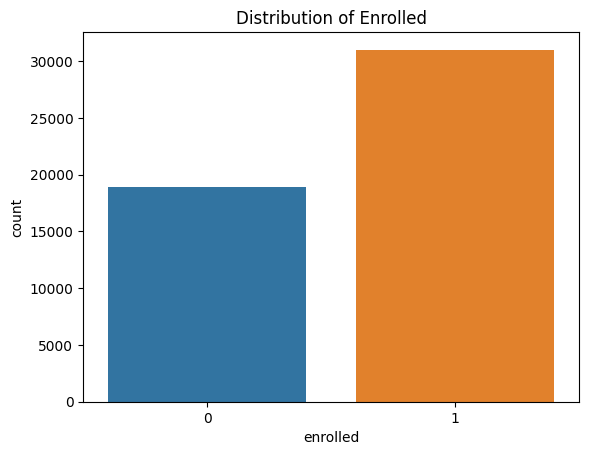

In [120]:
# Distribution of 'enrolled' (Target variable)
sns.countplot(x='enrolled', data=df)
plt.title('Distribution of Enrolled')
plt.show()

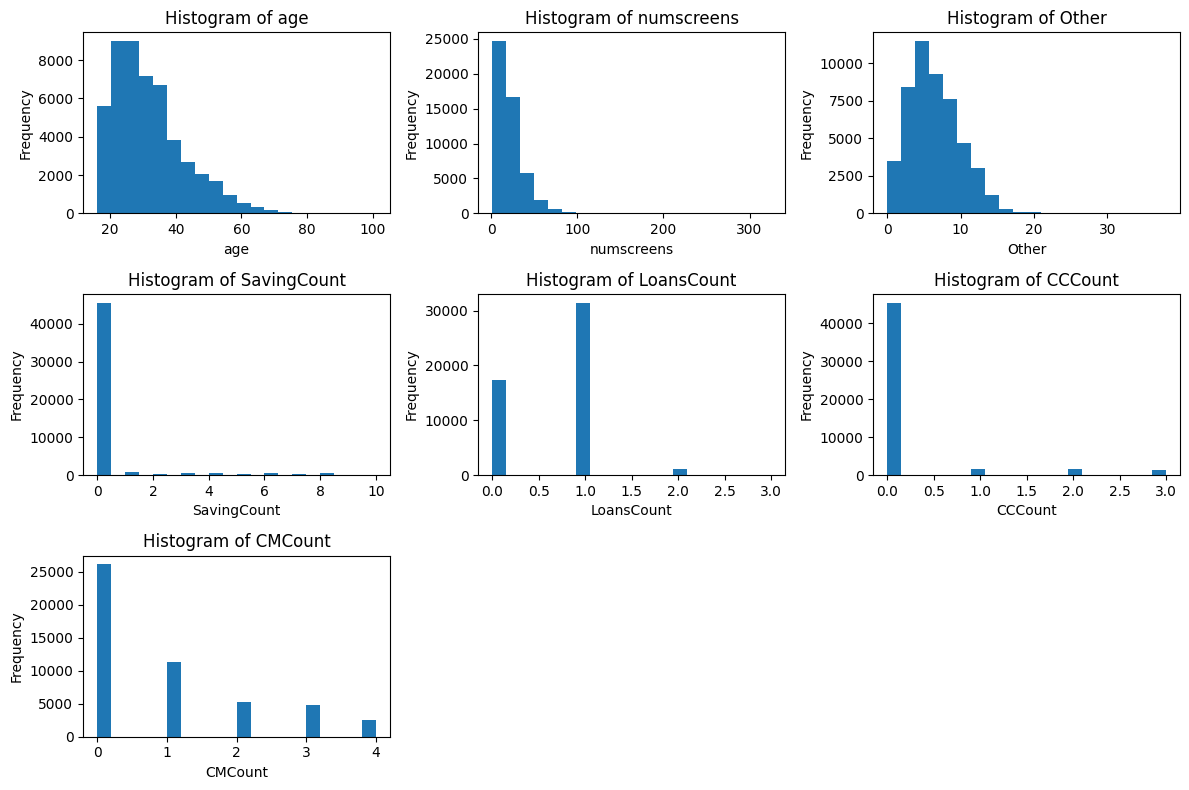

In [121]:
# Create histograms for each numerical column
plt.figure(figsize=(12, 8))
for i, column in enumerate(df_num, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[column], bins=20)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()


### INFRENCES

 -`Age Distribution:` The 'Age' column shows the distribution of user ages. As we can observe that the histogram is mostly on th left side and has a tail that entends to the right (rihgt-skewed distribution). This means that there are relatively more younger users compared to the older users



- `Numscreens Distribution:` It displays the distribution of the number of screens accessed by the users. the most users access small number of screens. and we can also say that the most number users have limited interaction with the application, accessing only a small users have limited interactions with the application, accessing only small number of screens.


- `Savingcount', 'CMcount', 'CCCount', and 'Loanscount':`  show a large number of data points at 0, indicating that a significant portion of users did not engage in these specific activities. However, non-zero values suggest the presence of active users who participated in these interactions. The distribution of these activities provides insights into user behavior, feature importance, and user engagement levels, helping to understand the popularity and usage of these specific features in the application.


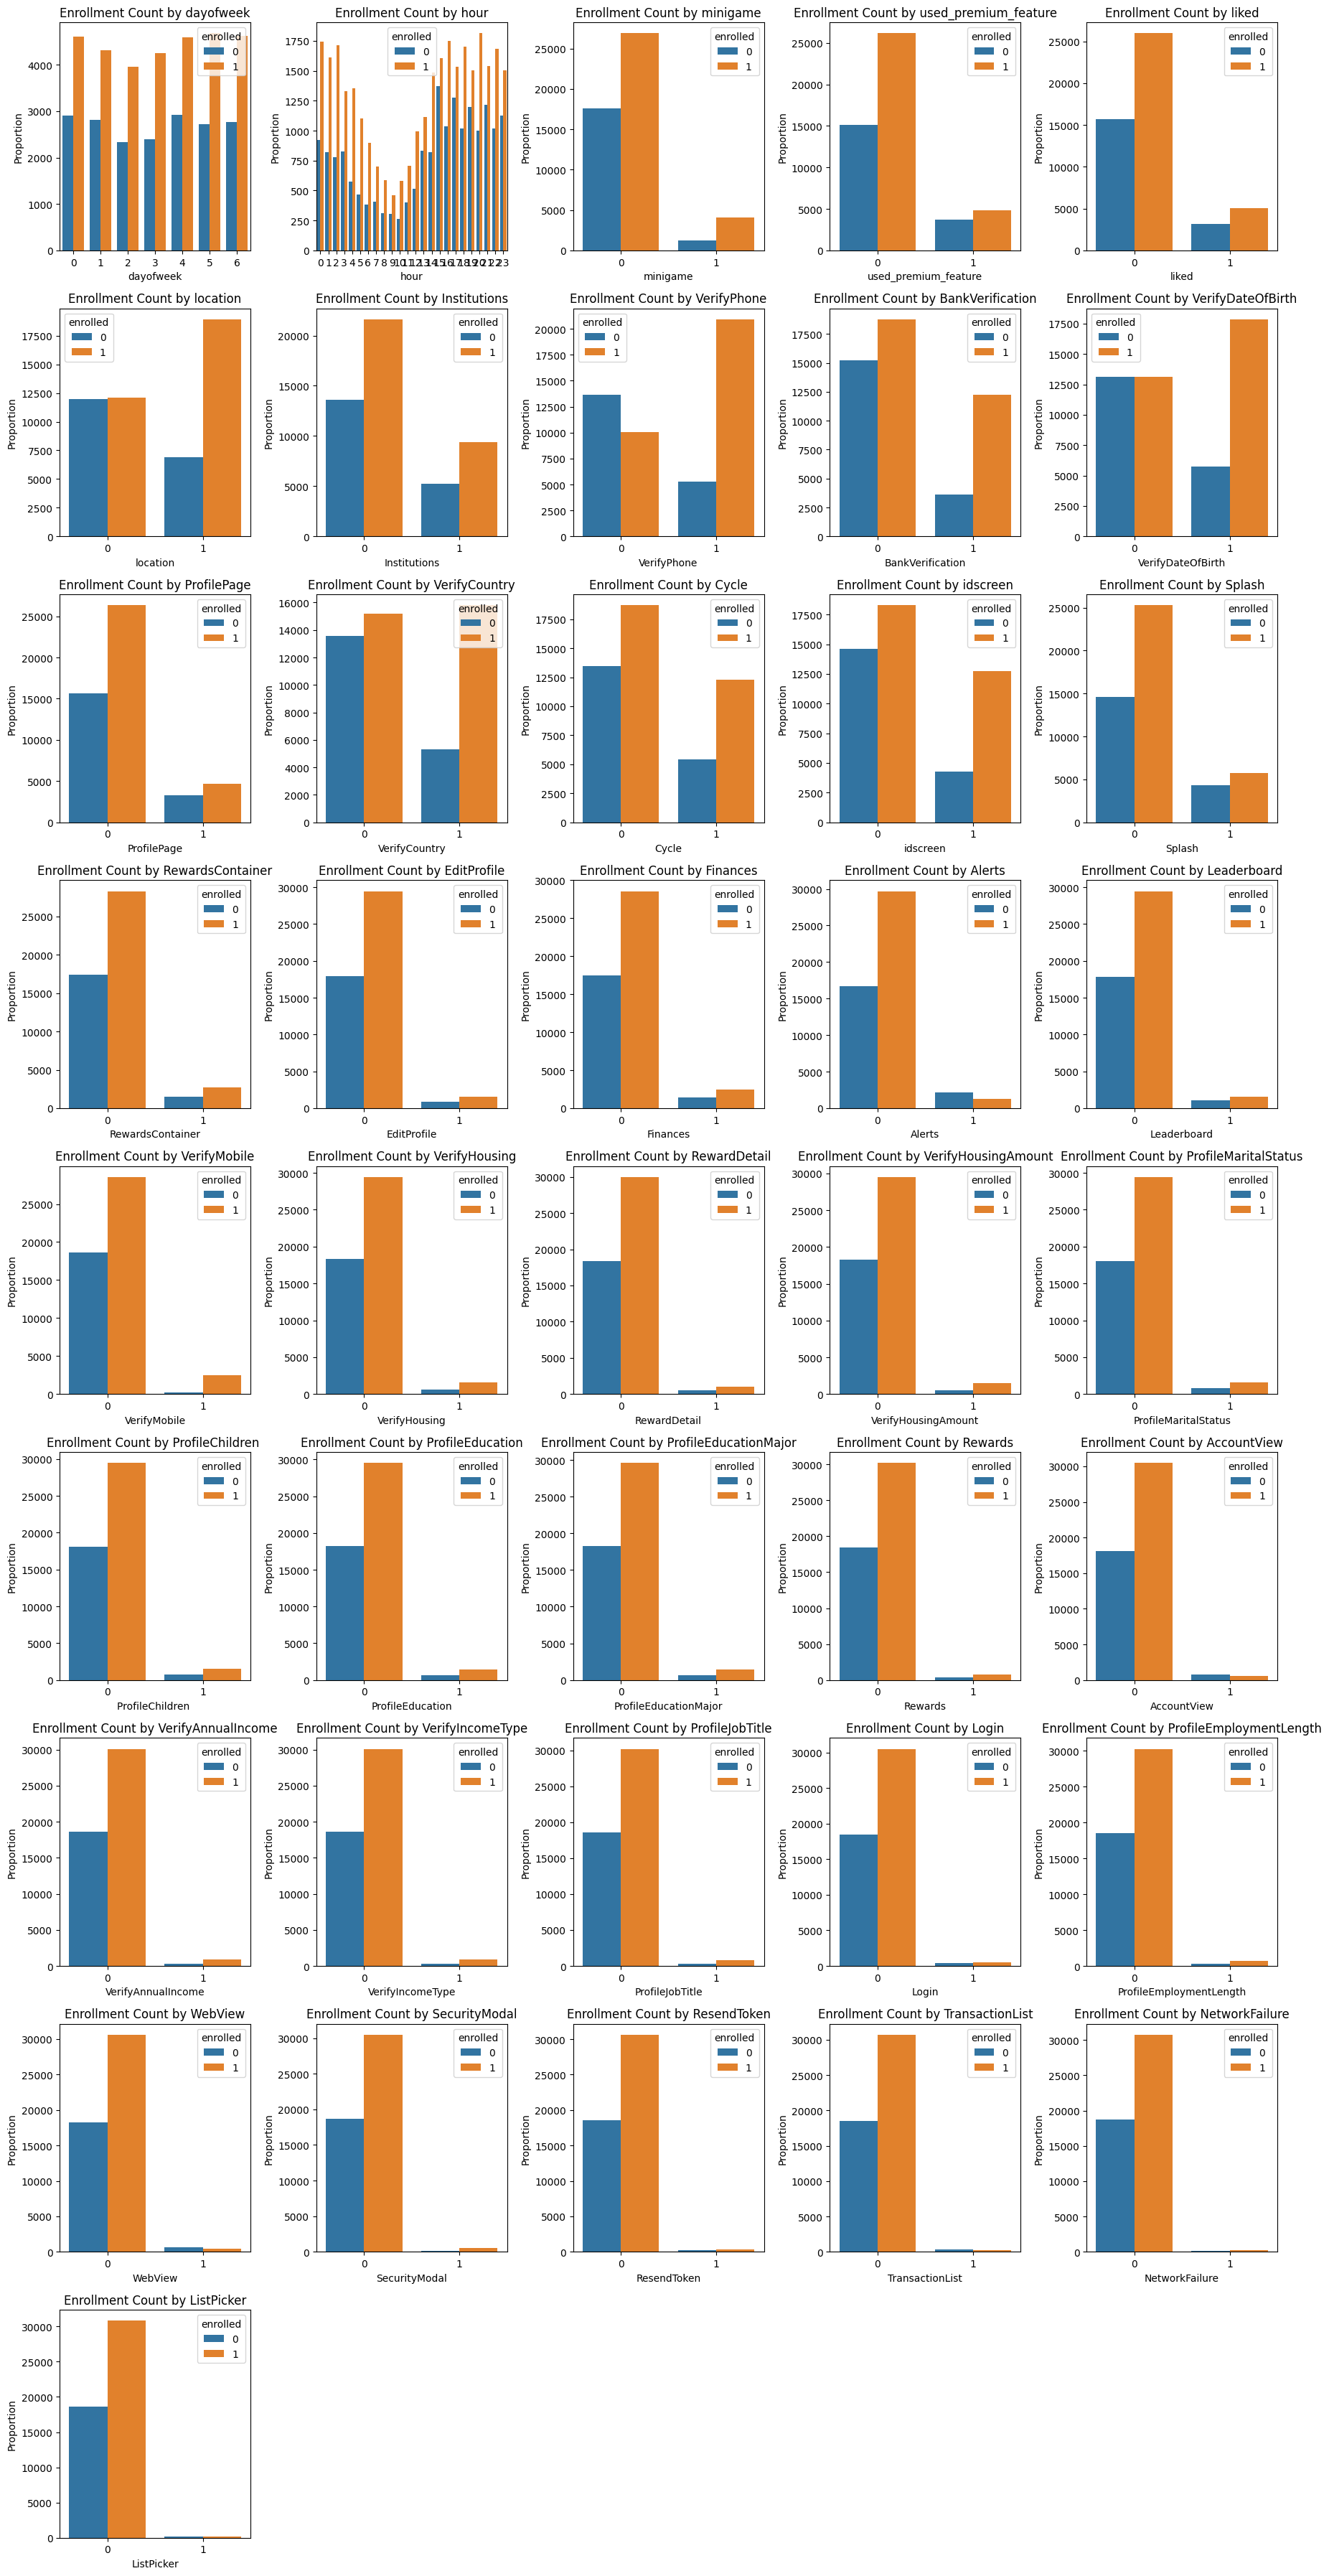

In [122]:
# Calculate the number of rows and columns for subplots
num_plots = len(df_cat)
num_plots_per_line = 5
num_rows = (num_plots + num_plots_per_line - 1) // num_plots_per_line
num_cols = min(num_plots, num_plots_per_line)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 4*num_rows))

# Flatten axes for easy iteration
axes_flat = axes.flatten()

# Loop through each categorical column and visualize its relationship with 'enrolled' using countplot
for i, (column, ax) in enumerate(zip(df_cat, axes_flat)):
    sns.countplot(x=column, hue='enrolled', data=df, ax=ax)
    ax.set_title(f'Enrollment Count by {column}')
    ax.set_ylabel('Proportion')

# Remove any empty subplots
if num_plots < num_rows * num_cols:
    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes_flat[i])

plt.tight_layout()
plt.show()

### INFRENCES

- `Dayofweek`: The bar plot shows that Friday (Day 4) has the highest user activity, while Monday (Day 1) has the lowest. Weekends (Days 5 and 6) exhibit consistent engagement levels, indicating users' relatively higher interest during weekends compared to weekdays.


- `minigame`: The bar plot indicates that a majority of users (44609) did not engage in the minigame (0), while a smaller number of users (5391) participated in the minigame(1). The mini-game feature seems to be less utilized by the users, with a significant imbalance between the two categories.


- `used_premium_feature`: The bar plot indicates that a majority of users (41399) did not used the premium feature  (0). while a smaller number of users (8601) used premium feature. The used premium feature seems to be less utilized bbyt the users.


- `liked`: It indicates that weather the users liked the application or not. here we can observe that most of users (41750) didn't liked the content(0). where only few users (8250) liked the certain content(1).


- `location`: It indicates that wether the users have location based services or not. from the bar plot we can observer that the significant number (25888) of users have location based services(1). while a slightly number(24112) of users disabled this feature(0).


- `Institutions`: from bar plot we can say that 14648 users interacting with institutions (1) and 35352 users not interacting (0). It indicates that a considerable number of users engaged with the institutions-related features in the application.


- `VerifyPhone`: from the bar plot we can say that 26230 users veryfing the phone(1) and 23770 users are not verify the phones(0). It indicates that almost the users are verified the phone

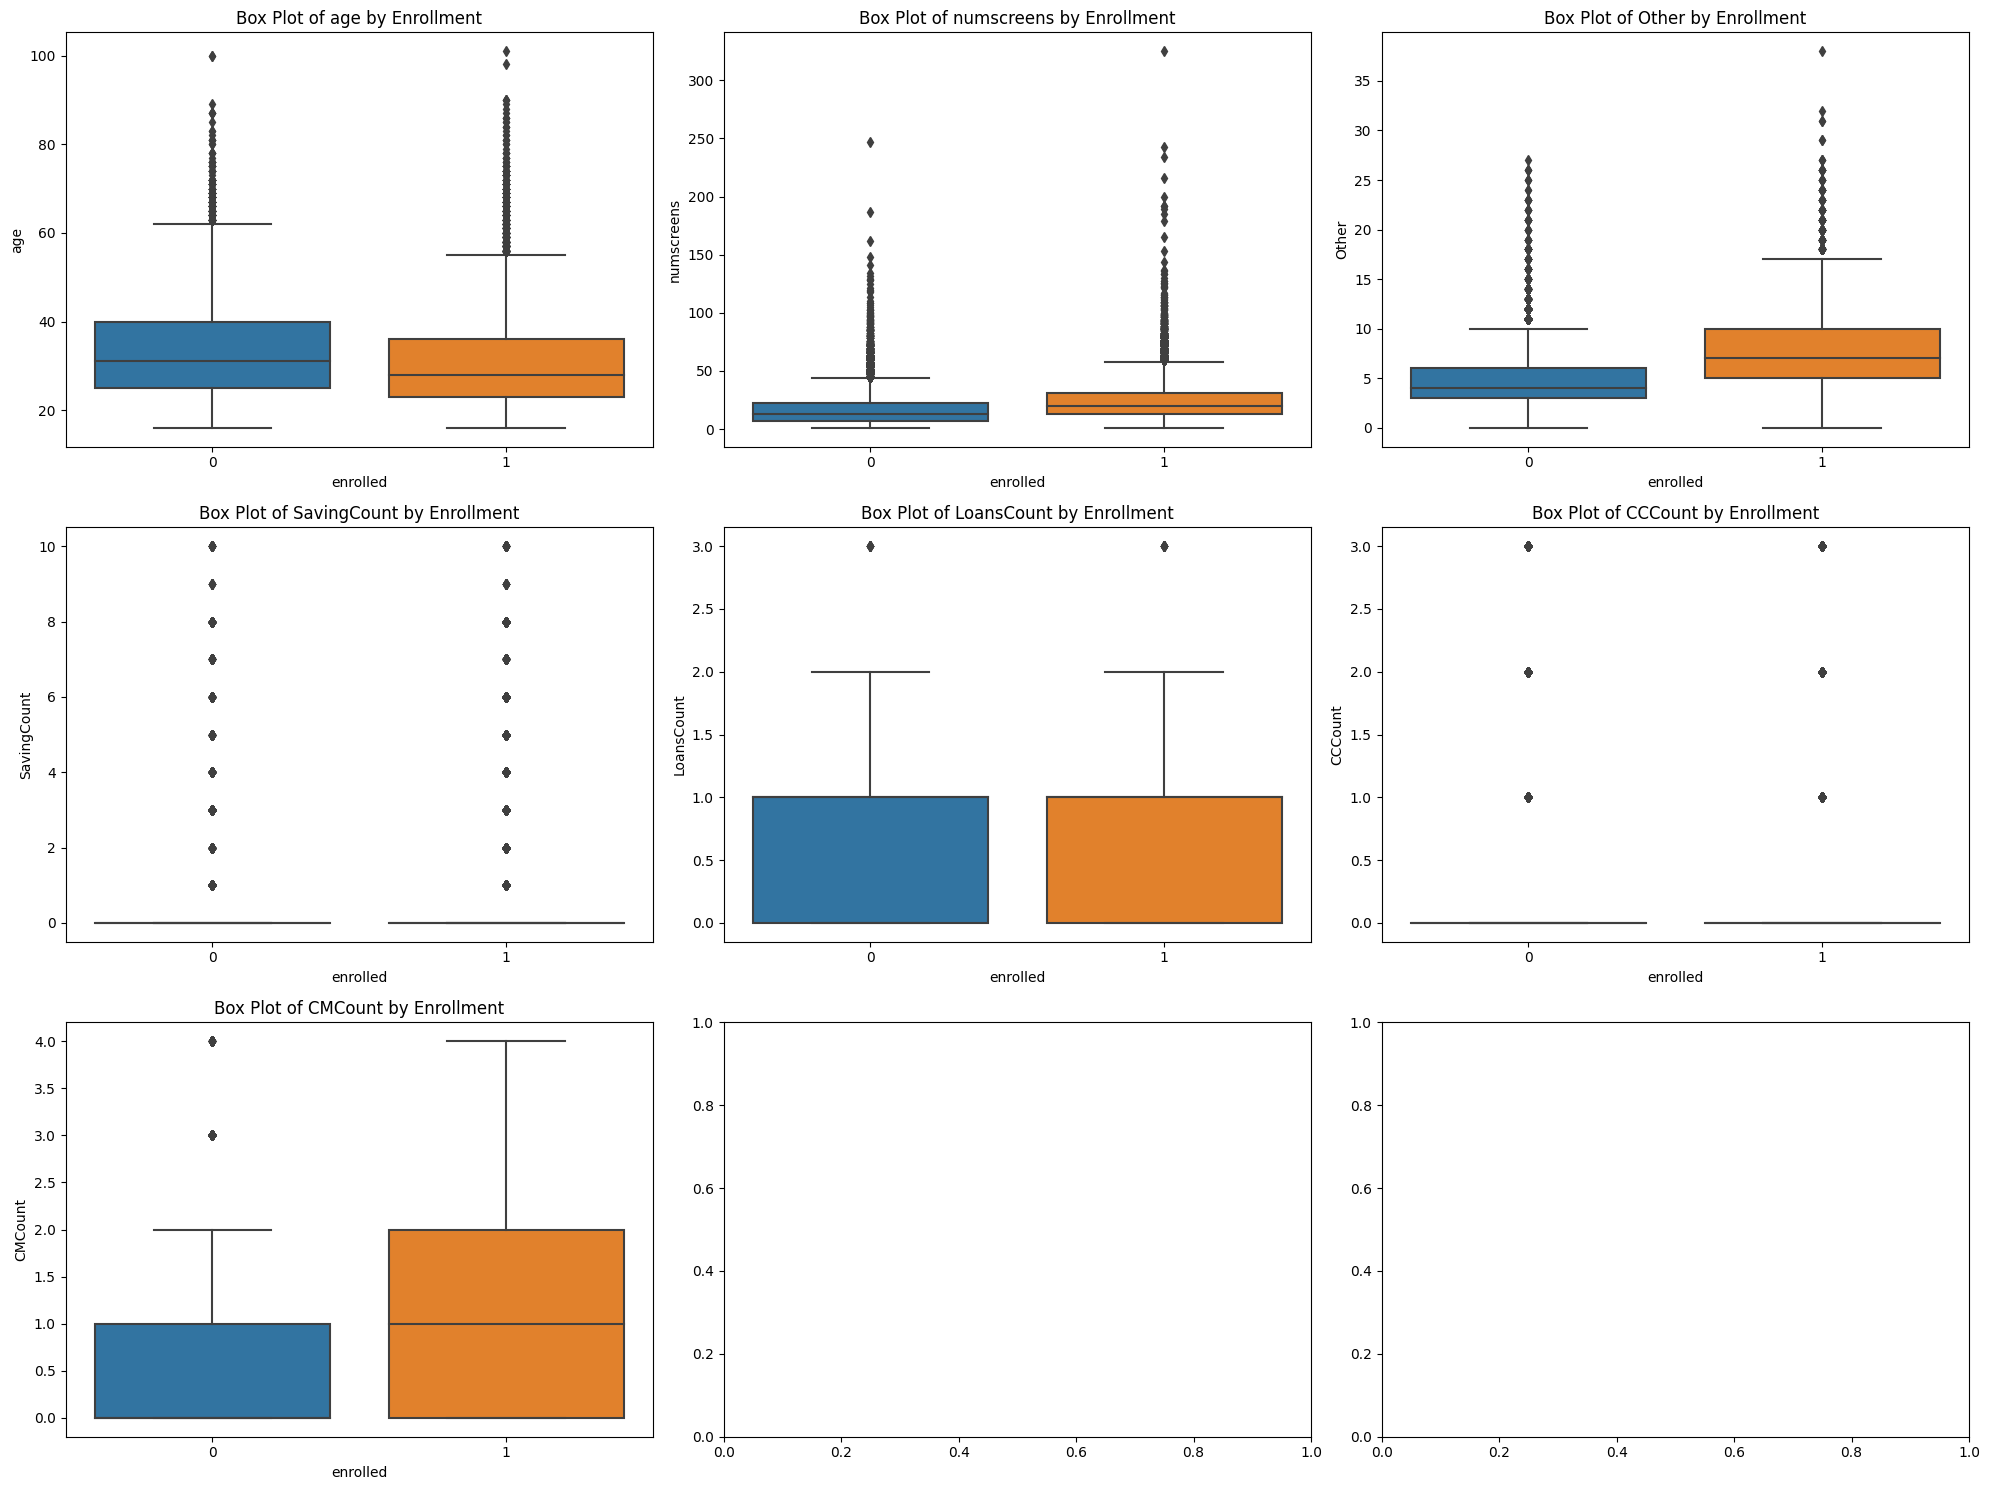

In [123]:

# Calculate the number of rows and columns needed for subplots
num_columns = 3
num_rows = len(df_num) // num_columns
if len(df_num) % num_columns != 0:
    num_rows += 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(20, 15))

# Create box plots for each numerical column by enrollment status
for idx, column in enumerate(df_num):
    row_idx = idx // num_columns
    col_idx = idx % num_columns
    ax = axes[row_idx, col_idx]
    sns.boxplot(x='enrolled', y=column, data=df, ax=ax)
    ax.set_title(f'Box Plot of {column} by Enrollment')

# Adjust layout
plt.tight_layout()
plt.show()

Age: There appear to be some outliers in both enrolled and non-enrolled users. These outliers might represent users whose ages are significantly different from the majority of users.

Hour: There are no apparent outliers in the distribution of usage across hours for both enrolled and non-enrolled users.

Numscreens: There are some outliers in both groups, indicating that certain users interact with a significantly higher number of screens than others.

Other: Similar to 'Numscreens', both groups have outliers for the 'Other' feature, suggesting that some users exhibit significantly different behaviors.

SavingCount, CMCount, CCCount, LoansCount: These features also have outliers, implying that some users might have extreme values for these features.

In [124]:
#df1 is the new DataFrame where it contained enrolled_date
dfold = pd.read_csv('mobileusebasedata.csv')
dfold.head()

user               first_open  dayofweek       hour  age  \
0  235136  2012-12-27 02:14:51.273          3   02:00:00   23   
1  333588  2012-12-02 01:16:00.905          6   01:00:00   24   
2  254414  2013-03-19 19:19:09.157          1   19:00:00   23   
3  234192  2013-07-05 16:08:46.354          4   16:00:00   28   
4   51549  2013-02-26 18:50:48.661          1   18:00:00   31   

                                         screen_list  numscreens  minigame  \
0  idscreen,joinscreen,Cycle,product_review,ScanP...          15         0   
1  joinscreen,product_review,product_review2,Scan...          13         0   
2                                  Splash,Cycle,Loan           3         0   
3  product_review,Home,product_review,Loan3,Finan...          40         0   
4  idscreen,joinscreen,Cycle,Credit3Container,Sca...          32         0   

   used_premium_feature  enrolled            enrolled_date  liked  
0                     0         0                      NaN      0  
1                     0         0                      NaN      0  
2                     1         0                      NaN      1  
3                     0         1  2013-07-05 16:11:49.513      0  
4                     0         1  2013-02-26 18:56:37.841      1

In [125]:
# Filter the DataFrame to include only rows where 'enrolled' is equal to 1
enr_anls = dfold[dfold['enrolled'] == 1]
# Sort the 'enr_anls' DataFrame by the 'enrolled_date' column
enr_anls.sort_values(by='enrolled_date', inplace=True)
# Group the 'enr_anls' DataFrame by 'enrolled_date' and aggregate the 'enrolled' column by counting occurrences
grouped_data = enr_anls.groupby('enrolled_date').agg({'enrolled': 'count'})
# Create a new column 'cum_sum' containing the cumulative sum of the 'enrolled' column
grouped_data['cum_sum'] = grouped_data['enrolled'].cumsum()
grouped_data

<ipython-input-125-dea8a5e795f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enr_anls.sort_values(by='enrolled_date', inplace=True)


enrolled  cum_sum
enrolled_date                             
2012-11-23 00:53:10.346         1        1
2012-11-23 01:35:11.120         1        2
2012-11-23 02:35:52.650         1        3
2012-11-23 03:00:40.079         1        4
2012-11-23 03:02:14.585         1        5
...                           ...      ...
2013-07-09 14:44:00.240         1    31070
2013-07-09 14:45:37.388         1    31071
2013-07-09 14:51:53.231         1    31072
2013-07-09 14:54:32.059         1    31073
2013-07-09 15:56:09.465         1    31074

[31001 rows x 2 columns]

In [126]:
#to check null values from the df1
dfold.isnull().sum()

user                        0
first_open                  0
dayofweek                   0
hour                        0
age                         0
screen_list                 0
numscreens                  0
minigame                    0
used_premium_feature        0
enrolled                    0
enrolled_date           18926
liked                       0
dtype: int64

In [127]:
dfold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   user                  50000 non-null  int64 
 1   first_open            50000 non-null  object
 2   dayofweek             50000 non-null  int64 
 3   hour                  50000 non-null  object
 4   age                   50000 non-null  int64 
 5   screen_list           50000 non-null  object
 6   numscreens            50000 non-null  int64 
 7   minigame              50000 non-null  int64 
 8   used_premium_feature  50000 non-null  int64 
 9   enrolled              50000 non-null  int64 
 10  enrolled_date         31074 non-null  object
 11  liked                 50000 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 4.6+ MB


In [128]:
import pandas as pd

# Convert 'first_open' and 'enrolled_date' columns to datetime format
dfold['first_open'] = pd.to_datetime(dfold['first_open'])
dfold['enrolled_date'] = pd.to_datetime(dfold['enrolled_date'])

# Calculate the time difference for users who have enrolled
dfold['time_to_enroll'] = (dfold['enrolled_date'] - dfold['first_open']).dt.total_seconds()


# Assuming dfold is your DataFrame
dfold['time_to_enroll_minutes'] = (dfold['enrolled_date'] - dfold['first_open']).dt.total_seconds() / 60

# Filter out rows where 'enrolled_date' is null
df_with_enrollment_time = dfold[dfold['enrolled_date'].notnull()]

# Print the average time it takes to enroll in seconds
average_time_to_enroll = df_with_enrollment_time['time_to_enroll'].mean()
print("Average Time to Enroll (seconds):", average_time_to_enroll)


Average Time to Enroll (seconds): 687701.9149968784


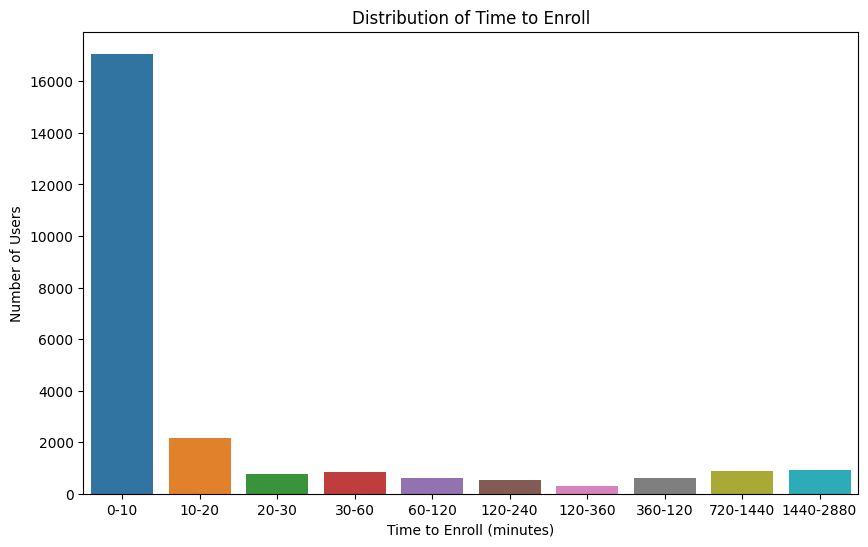

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the bins and labels
time_bins = [0, 10, 20, 30, 60, 120, 240, 360, 720,1440, 2880]
time_bin_labels = ['0-10', '10-20', '20-30', '30-60', '60-120', '120-240', '120-360', '360-120','720-1440', '1440-2880']

# Create a new column to categorize the time intervals
dfold['time_interval'] = pd.cut(dfold['time_to_enroll_minutes'], bins=time_bins, labels=time_bin_labels, right=False)

# Count the number of users in each time interval
time_interval_counts = dfold['time_interval'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=time_interval_counts.index, y=time_interval_counts.values)
plt.xlabel('Time to Enroll (minutes)')
plt.ylabel('Number of Users')
plt.title('Distribution of Time to Enroll')
plt.show()


The majority of users enroll within the first 10 minutes, indicating swift decision-making. A smaller group takes longer, possibly due to exploring features before committing.

In [130]:
# Convert 'enrolled_date' to datetime
dfold['enrolled_date'] = pd.to_datetime(dfold['enrolled_date'])
#convert ' enrolled_date' to only date
dfold['enrolled_date_only'] = dfold['enrolled_date'].dt.date

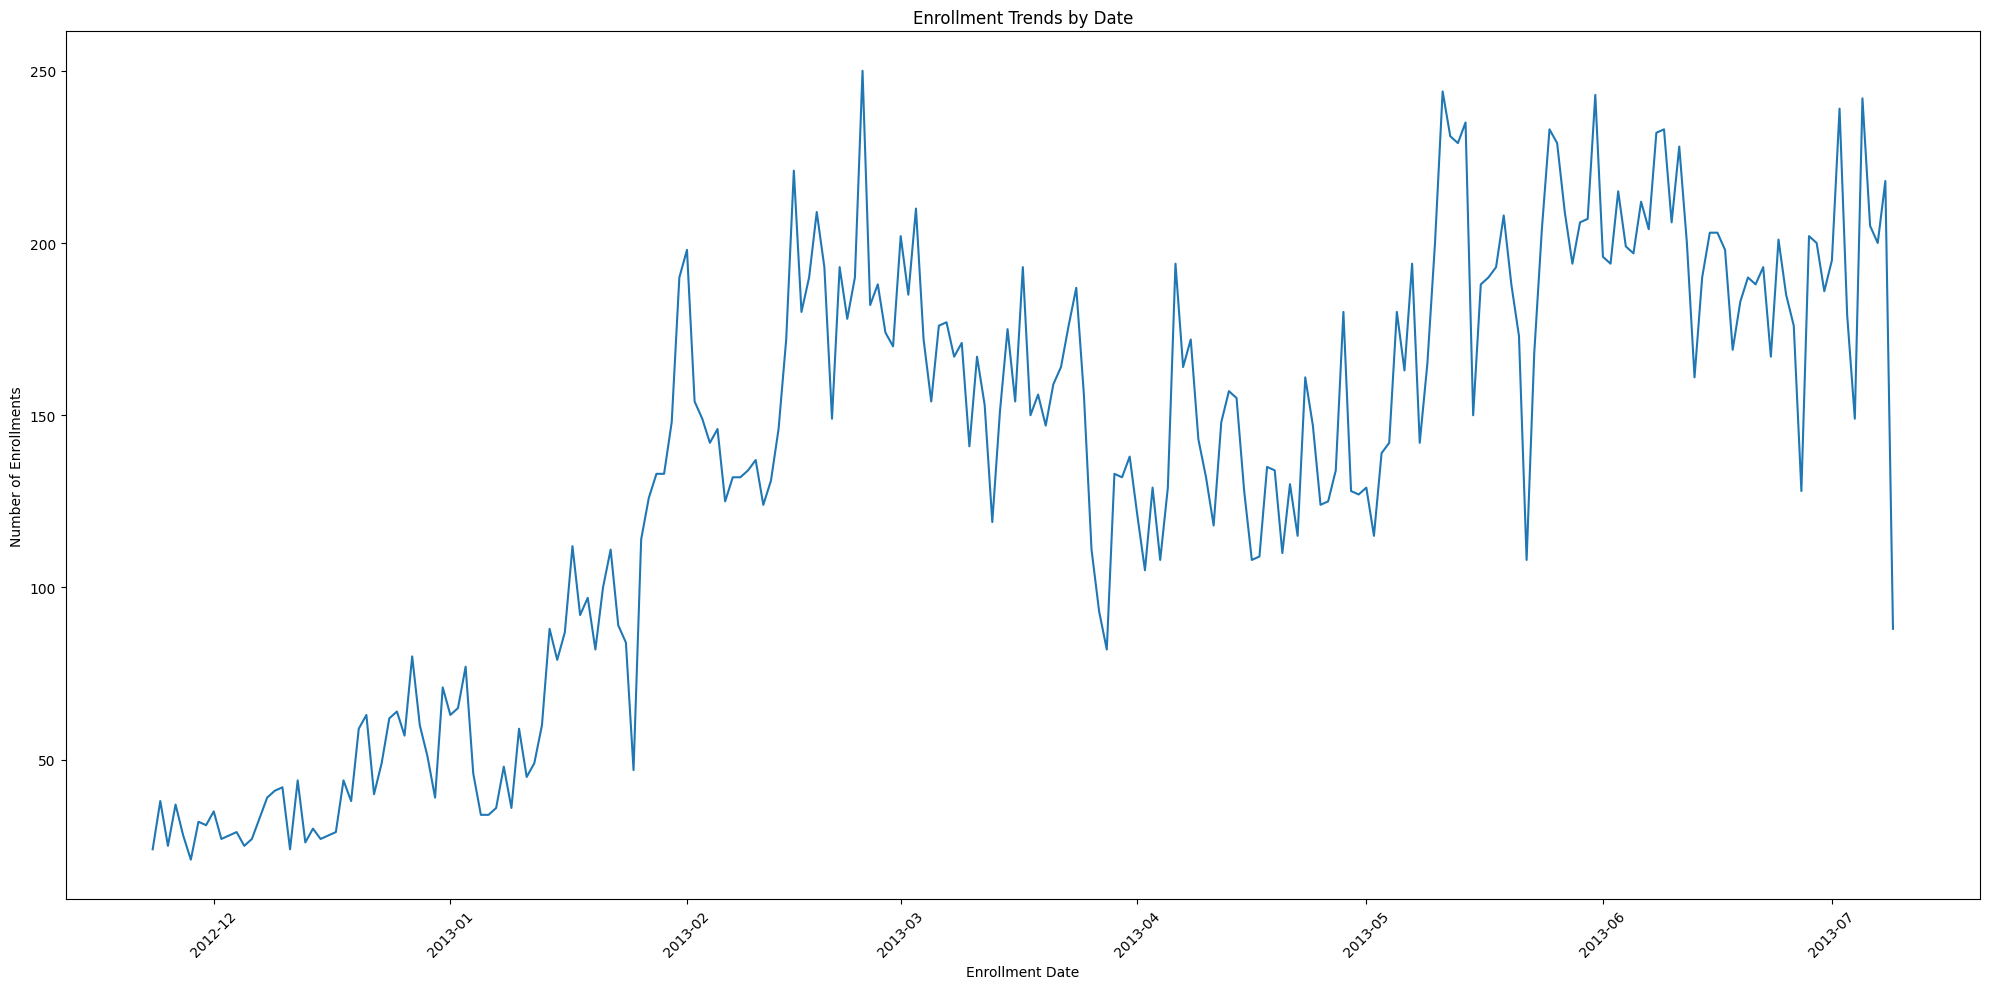

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named 'df'
# Group by enrollment date and count enrollments
enrollment_counts = dfold.groupby('enrolled_date_only').size()  # Use the actual column name
enrollment_counts = enrollment_counts.sort_index()
enrollment_counts = enrollment_counts.to_frame().reset_index()

# Plot the enrollment trends using seaborn
plt.figure(figsize=(20, 10))
sns.lineplot(data=enrollment_counts,x='enrolled_date_only',y=0)  # Specify x and y columns
plt.xlabel('Enrollment Date')
plt.ylabel('Number of Enrollments')
plt.title('Enrollment Trends by Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

line plot of enrollment trends based on enrollment dates, it is evident that there is a consistent upward trend. This suggests a growing interest and engagement from users, as the number of enrollments gradually increases over time. The sustained growth in enrollments indicates a positive reception of the 'Buy Now Pay Later' model, showcasing its appeal to a widening audience.

<ipython-input-132-7ee206dc0ee9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  enr_anls.sort_values(by='enrolled_date', inplace=True)


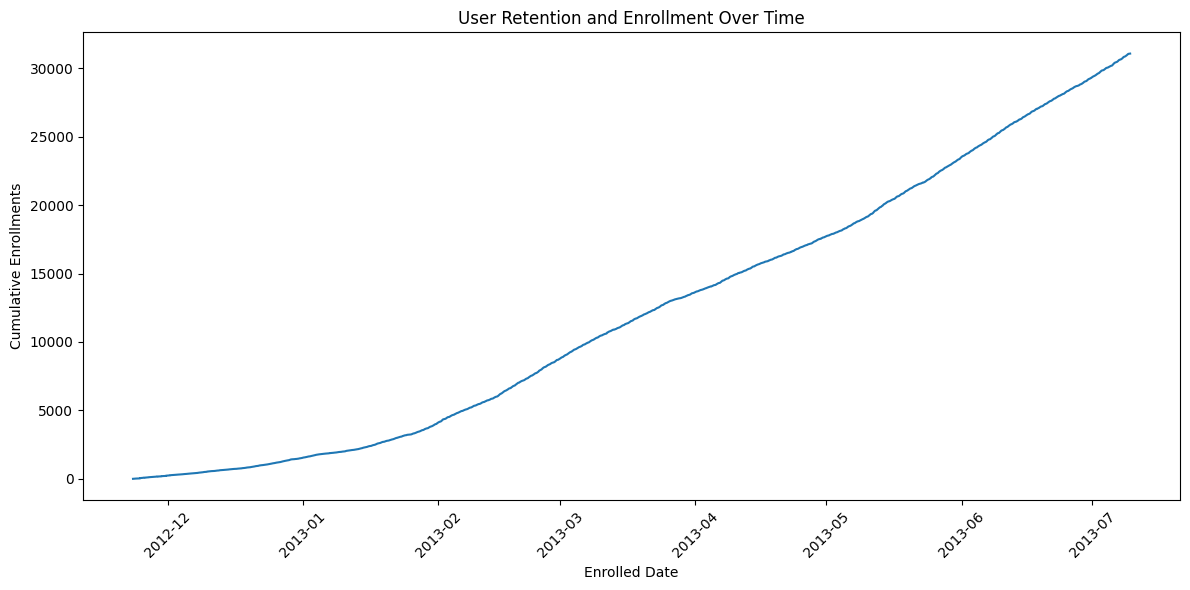

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
enr_anls = dfold[dfold['enrolled'] == 1]
enr_anls.sort_values(by='enrolled_date', inplace=True)
grouped_data = enr_anls.groupby('enrolled_date').agg({'enrolled': 'count'})
grouped_data['cum_sum'] = grouped_data['enrolled'].cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped_data, x='enrolled_date', y='cum_sum')
plt.title('User Retention and Enrollment Over Time')
plt.xlabel('Enrolled Date')
plt.ylabel('Cumulative Enrollments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## UNIVARIATE ANALYSIS

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def univariate_analysis_numeric(df, num_columns):


    for column in num_columns:
        # Summary statistics
        print(f"Summary statistics for '{column}':")
        print(df[column].describe())
        print("--------------------------------")

        # Histogram plot
        plt.figure(figsize=(8, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f"Histogram for '{column}'")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

        # Box plot
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f"Box plot for '{column}'")
        plt.xlabel(column)
        plt.show()



Summary statistics for 'age':
count    49874.000000
mean        31.713157
std         10.803037
min         16.000000
25%         24.000000
50%         29.000000
75%         37.000000
max        101.000000
Name: age, dtype: float64
--------------------------------


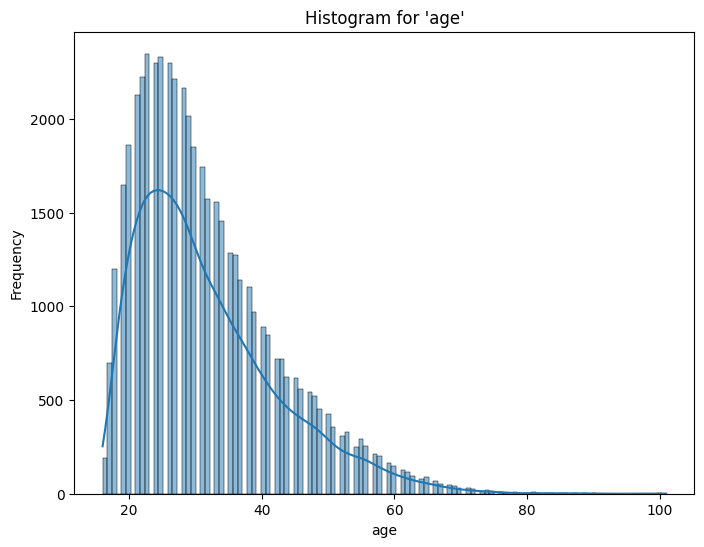

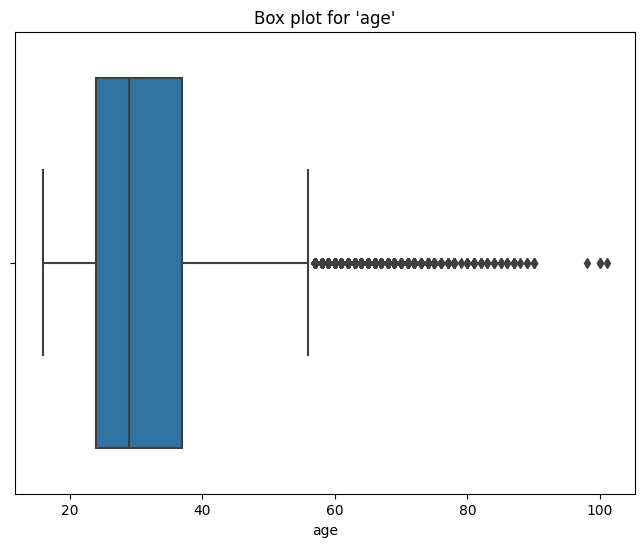

Summary statistics for 'numscreens':
count    49874.000000
mean        21.098849
std         15.726940
min          1.000000
25%         10.000000
50%         18.000000
75%         28.000000
max        325.000000
Name: numscreens, dtype: float64
--------------------------------


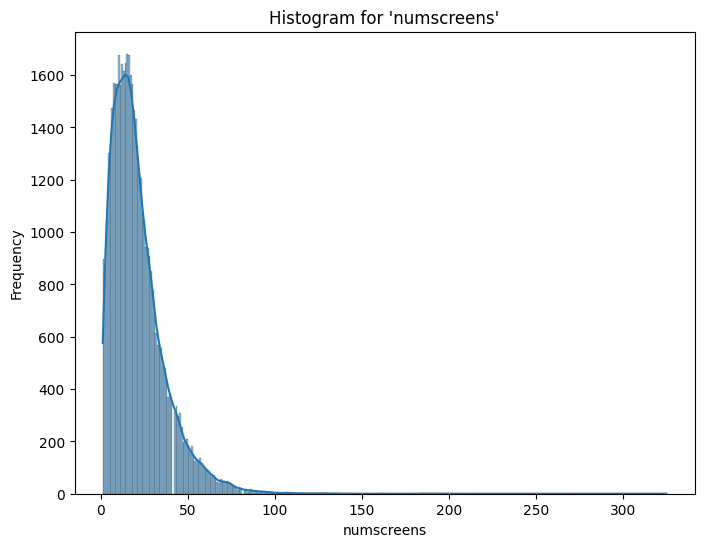

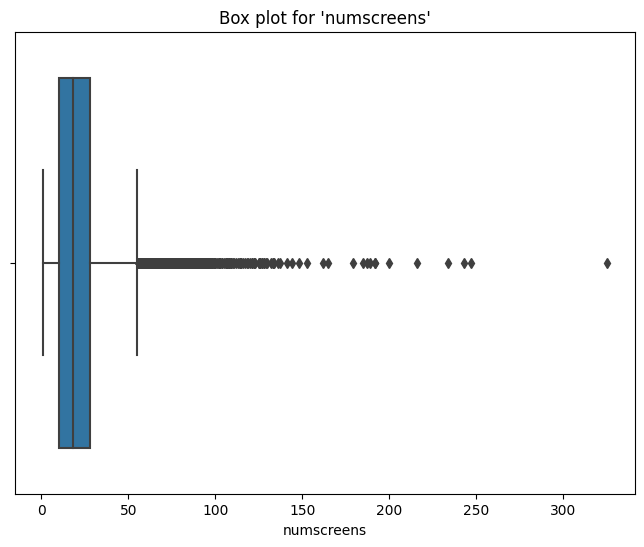

Summary statistics for 'Other':
count    49874.000000
mean         6.330152
std          3.685873
min          0.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         38.000000
Name: Other, dtype: float64
--------------------------------


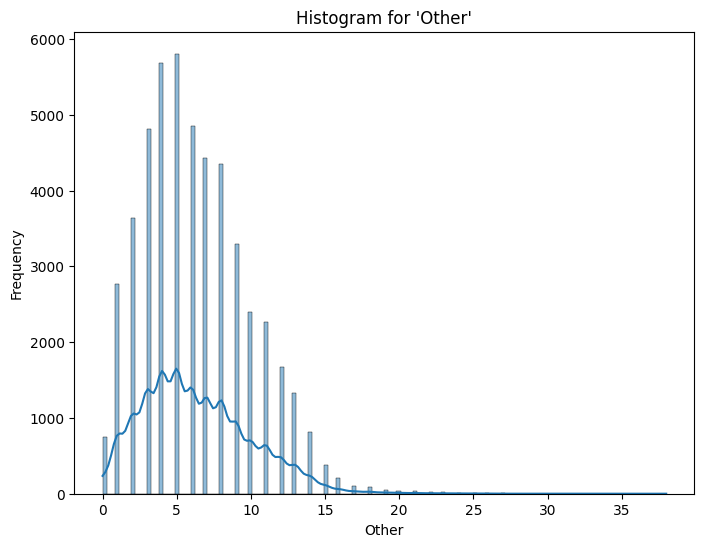

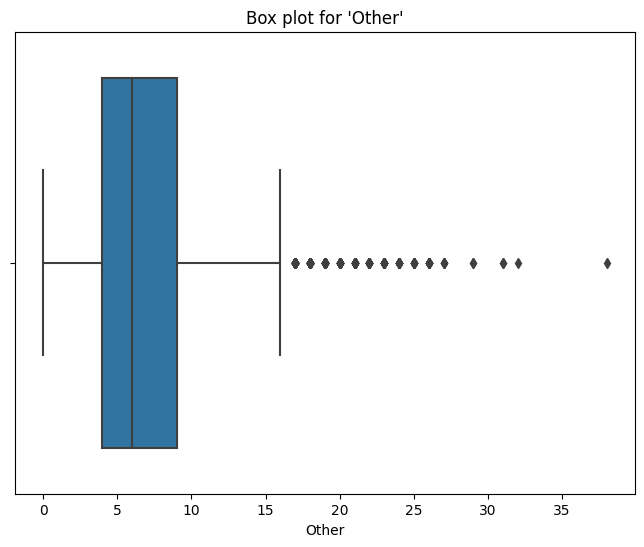

Summary statistics for 'SavingCount':
count    49874.000000
mean         0.360889
std          1.394621
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: SavingCount, dtype: float64
--------------------------------


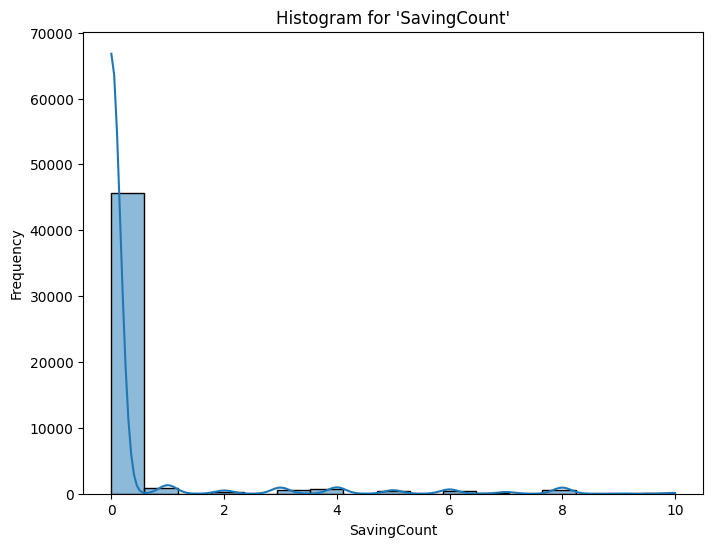

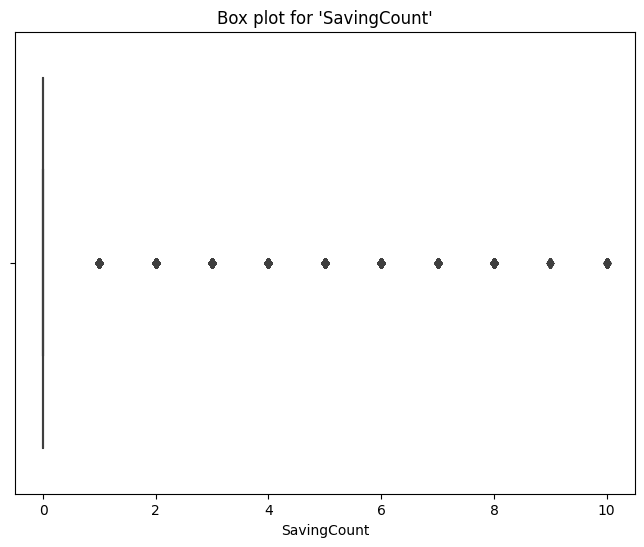

Summary statistics for 'LoansCount':
count    49874.000000
mean         0.676685
std          0.515972
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: LoansCount, dtype: float64
--------------------------------


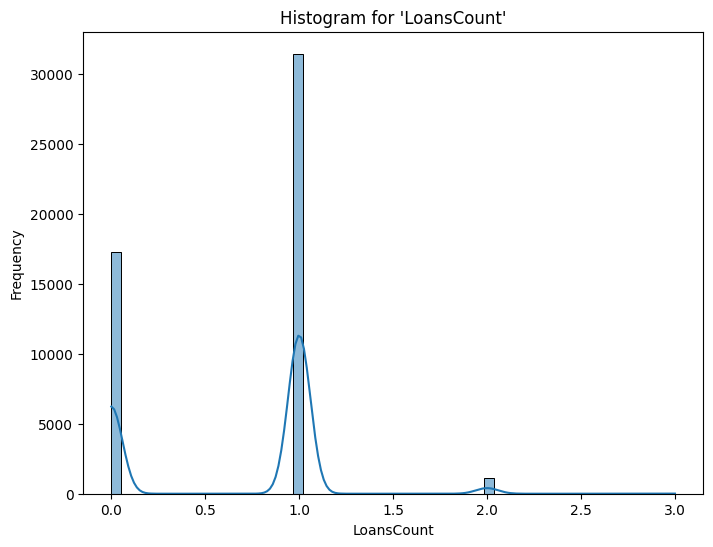

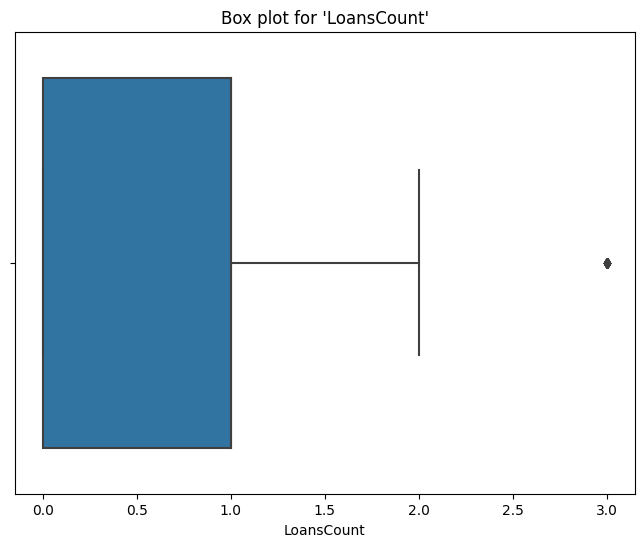

Summary statistics for 'CCCount':
count    49874.000000
mean         0.176826
std          0.612687
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: CCCount, dtype: float64
--------------------------------


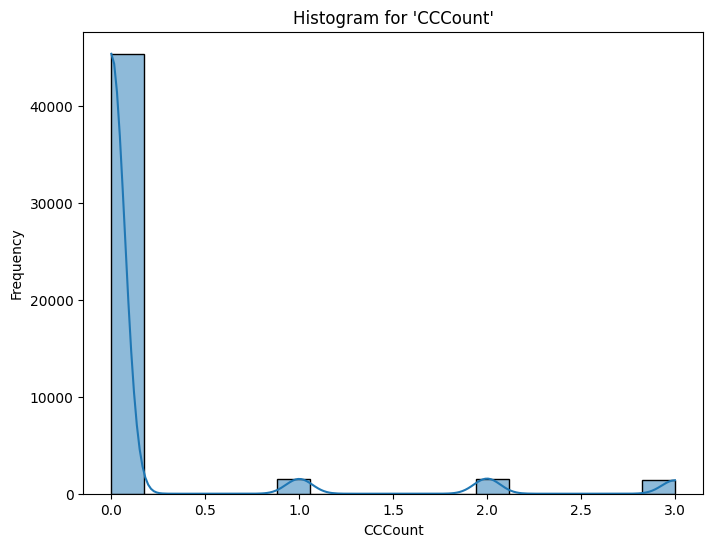

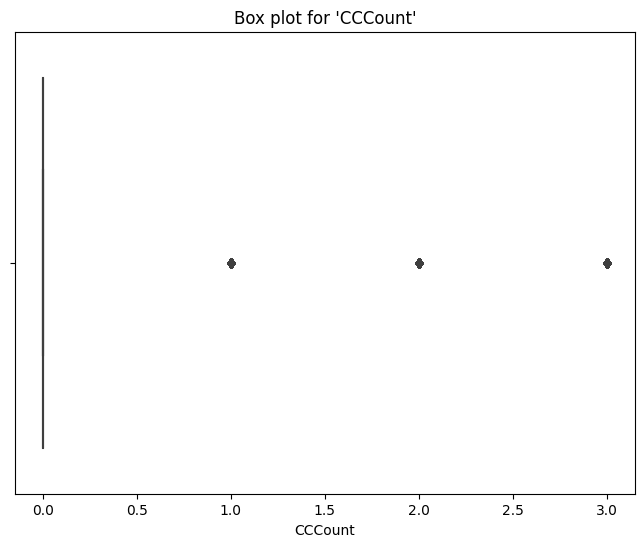

Summary statistics for 'CMCount':
count    49874.000000
mean         0.921562
std          1.205801
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          4.000000
Name: CMCount, dtype: float64
--------------------------------


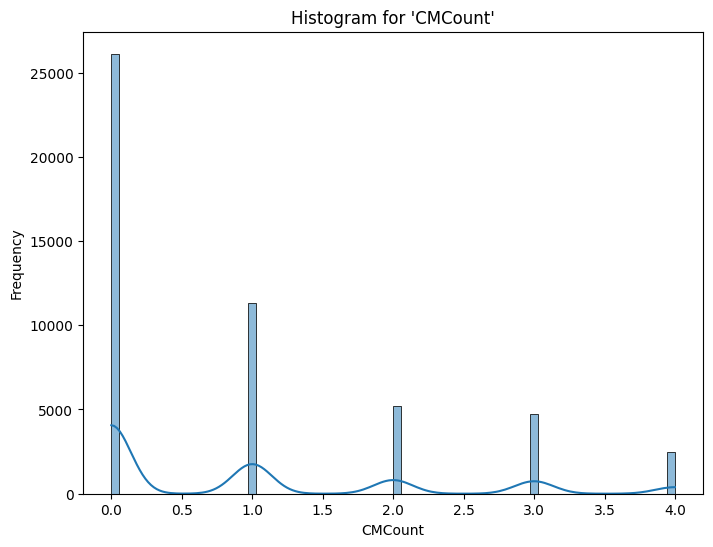

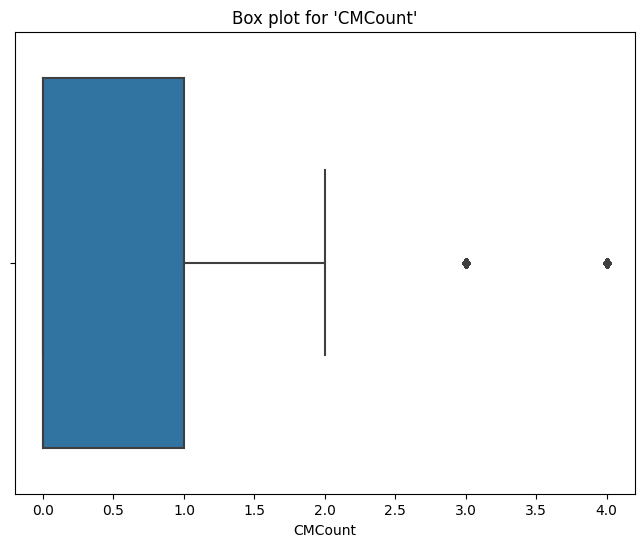

In [134]:
 univariate_analysis_numeric(df,df_num)

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def univariate_analysis_categorical(df, cat_columns):

    for column in cat_columns:
        # Value counts
        print(f"Value counts for '{column}':")
        print(df[column].value_counts())
        print("--------------------------------")

        # Bar plot
        plt.figure(figsize=(8, 6))
        sns.countplot(x=column, data=df, order=df[column].value_counts().index)
        plt.title(f"Bar plot for '{column}'")
        plt.xlabel(column)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.show()


Value counts for 'dayofweek':
4    7514
0    7501
5    7405
6    7395
1    7122
3    6638
2    6299
Name: dayofweek, dtype: int64
--------------------------------


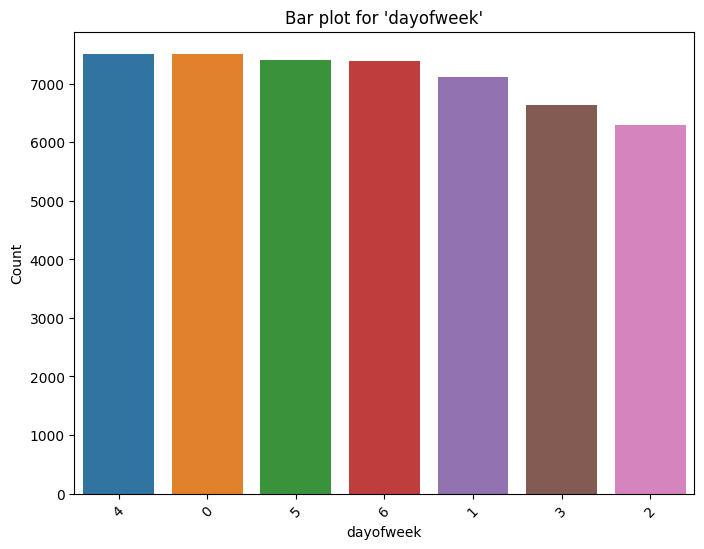

Value counts for 'hour':
15    2974
20    2810
17    2805
16    2782
21    2758
18    2720
22    2700
19    2699
0     2660
23    2628
2     2492
1     2435
14    2305
3     2154
13    1946
4     1927
5     1567
12    1505
6     1280
11    1108
7     1106
8      895
10     848
9      770
Name: hour, dtype: int64
--------------------------------


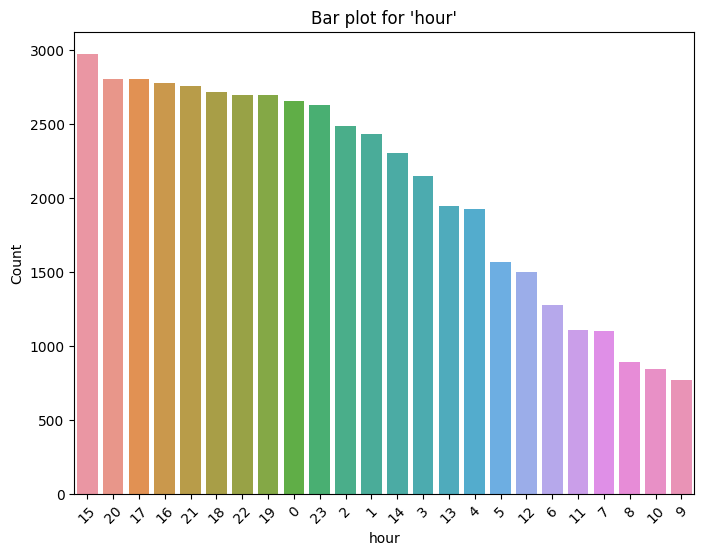

Value counts for 'minigame':
0    44500
1     5374
Name: minigame, dtype: int64
--------------------------------


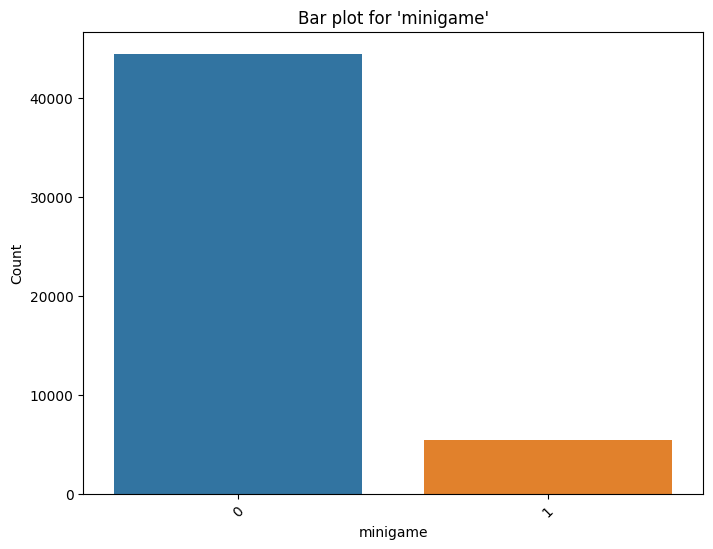

Value counts for 'used_premium_feature':
0    41303
1     8571
Name: used_premium_feature, dtype: int64
--------------------------------


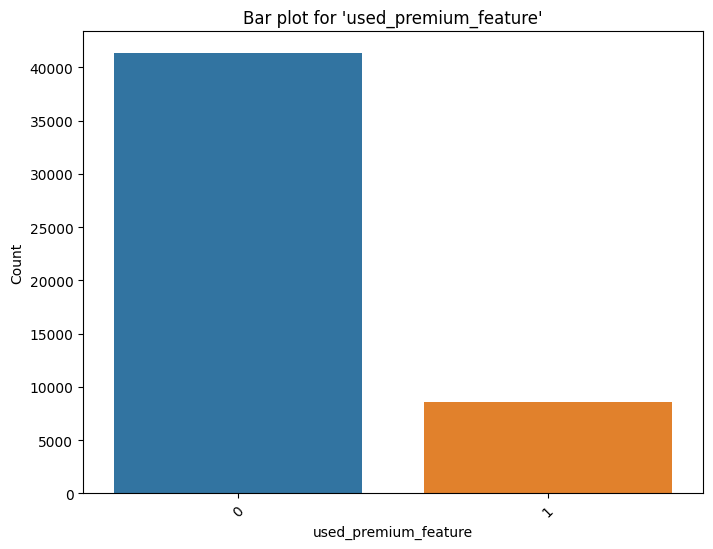

Value counts for 'liked':
0    41641
1     8233
Name: liked, dtype: int64
--------------------------------


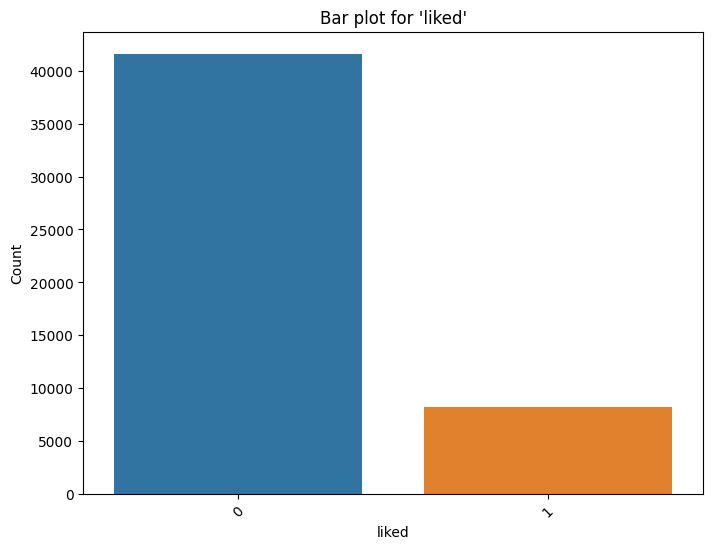

Value counts for 'location':
1    25831
0    24043
Name: location, dtype: int64
--------------------------------


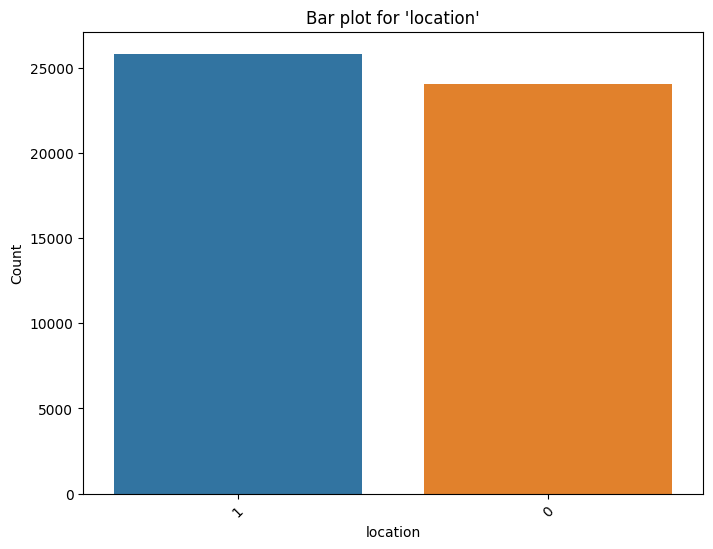

Value counts for 'Institutions':
0    35250
1    14624
Name: Institutions, dtype: int64
--------------------------------


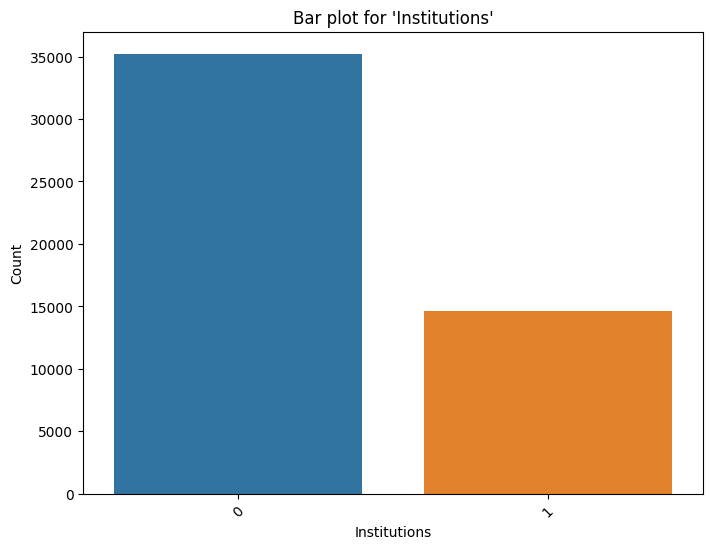

Value counts for 'VerifyPhone':
1    26182
0    23692
Name: VerifyPhone, dtype: int64
--------------------------------


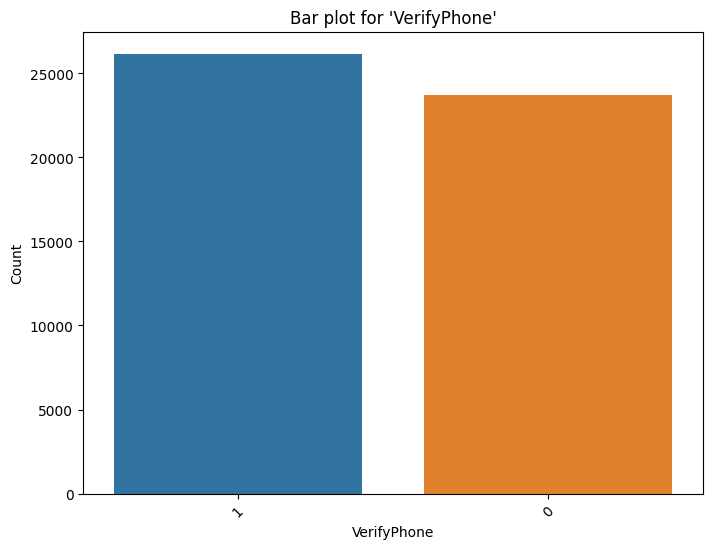

Value counts for 'BankVerification':
0    34013
1    15861
Name: BankVerification, dtype: int64
--------------------------------


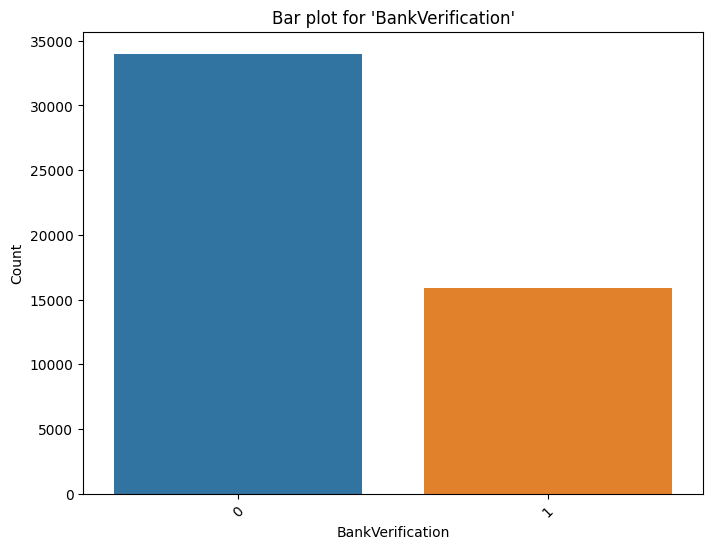

Value counts for 'VerifyDateOfBirth':
0    26247
1    23627
Name: VerifyDateOfBirth, dtype: int64
--------------------------------


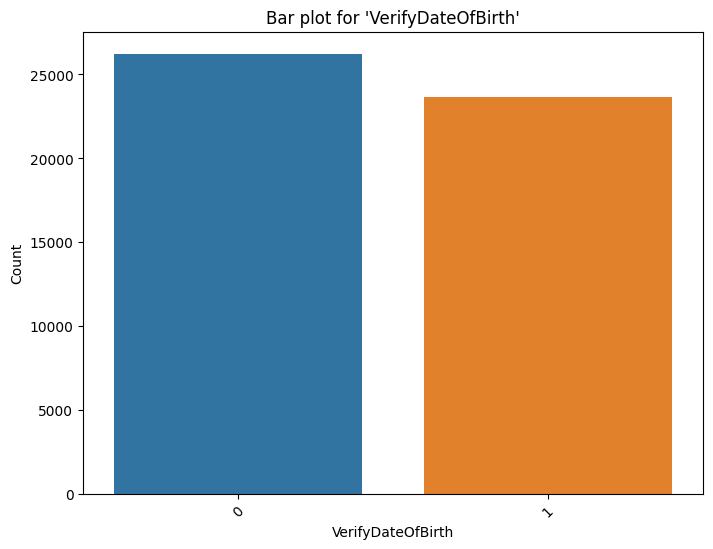

Value counts for 'ProfilePage':
0    41989
1     7885
Name: ProfilePage, dtype: int64
--------------------------------


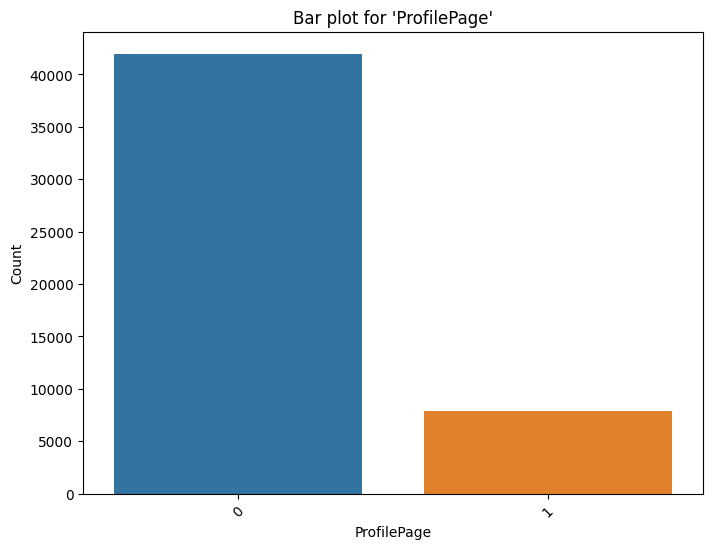

Value counts for 'VerifyCountry':
0    28765
1    21109
Name: VerifyCountry, dtype: int64
--------------------------------


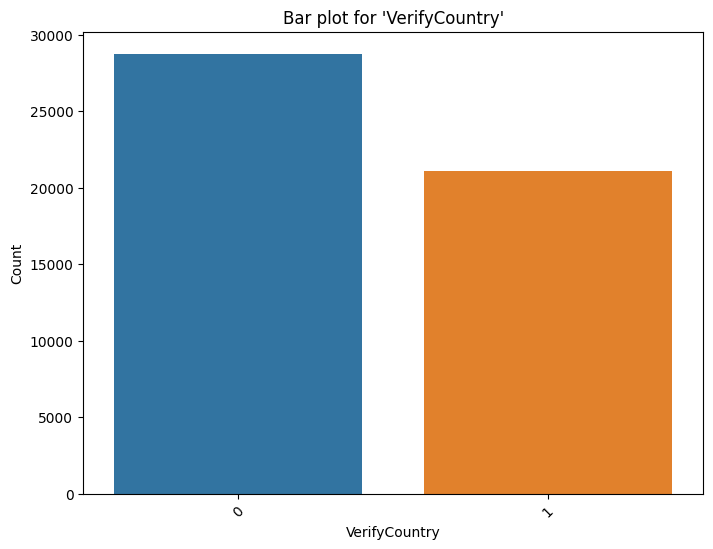

Value counts for 'Cycle':
0    32146
1    17728
Name: Cycle, dtype: int64
--------------------------------


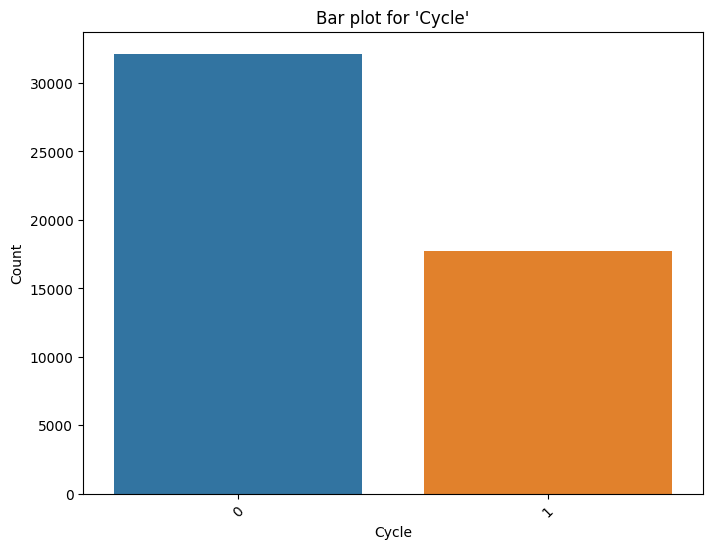

Value counts for 'idscreen':
0    32883
1    16991
Name: idscreen, dtype: int64
--------------------------------


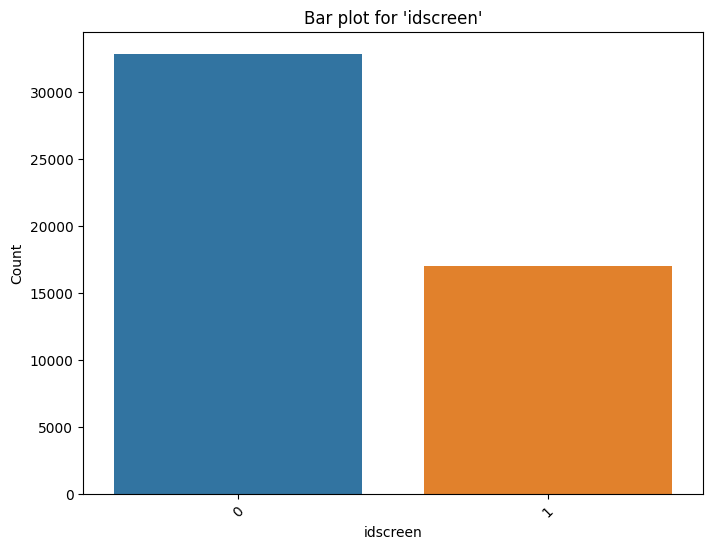

Value counts for 'Splash':
0    39872
1    10002
Name: Splash, dtype: int64
--------------------------------


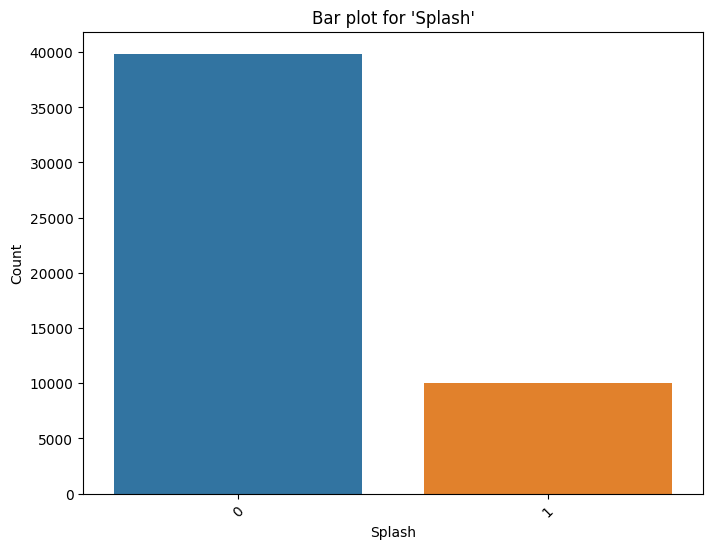

Value counts for 'RewardsContainer':
0    45688
1     4186
Name: RewardsContainer, dtype: int64
--------------------------------


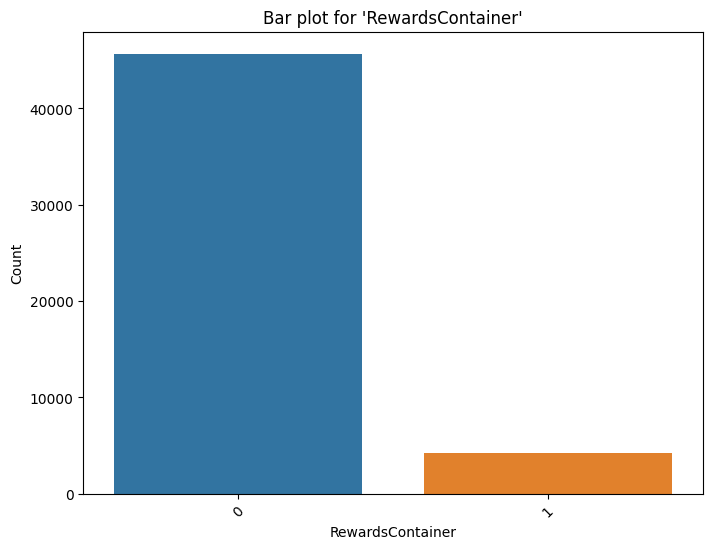

Value counts for 'EditProfile':
0    47432
1     2442
Name: EditProfile, dtype: int64
--------------------------------


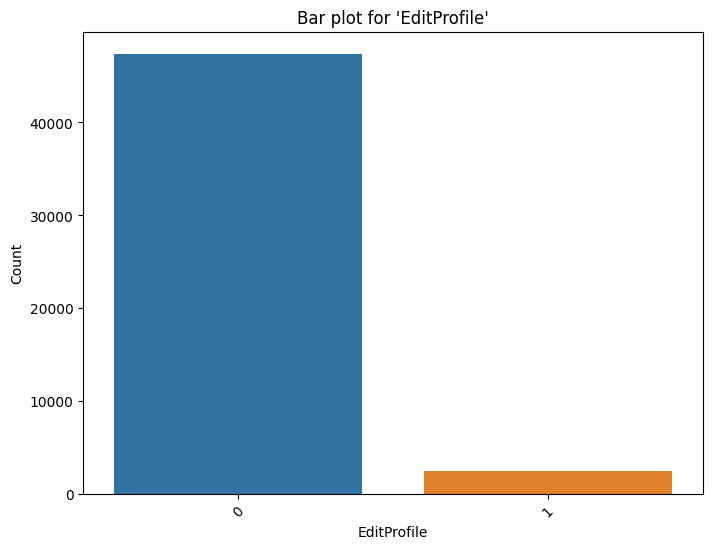

Value counts for 'Finances':
0    46066
1     3808
Name: Finances, dtype: int64
--------------------------------


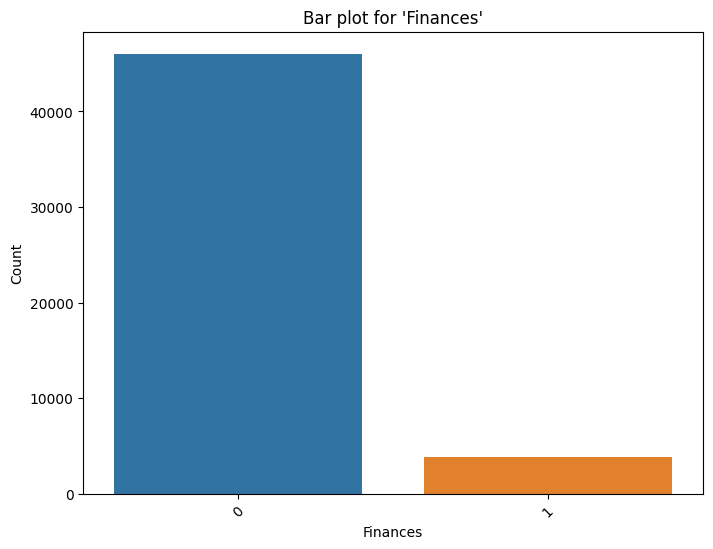

Value counts for 'Alerts':
0    46426
1     3448
Name: Alerts, dtype: int64
--------------------------------


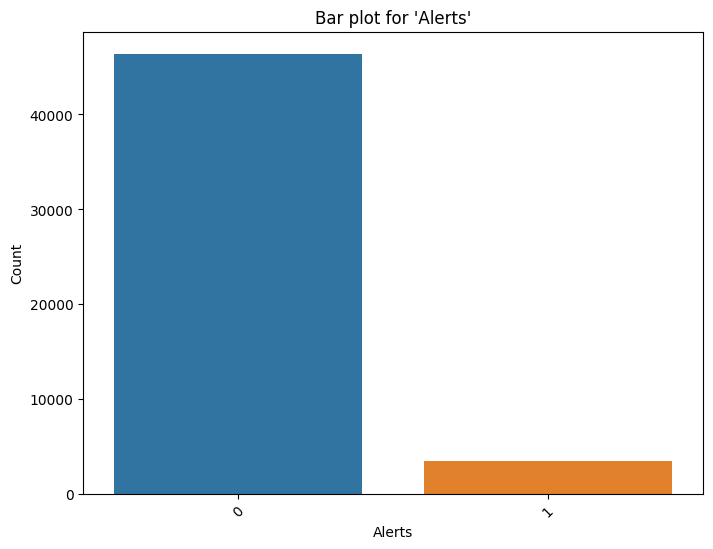

Value counts for 'Leaderboard':
0    47302
1     2572
Name: Leaderboard, dtype: int64
--------------------------------


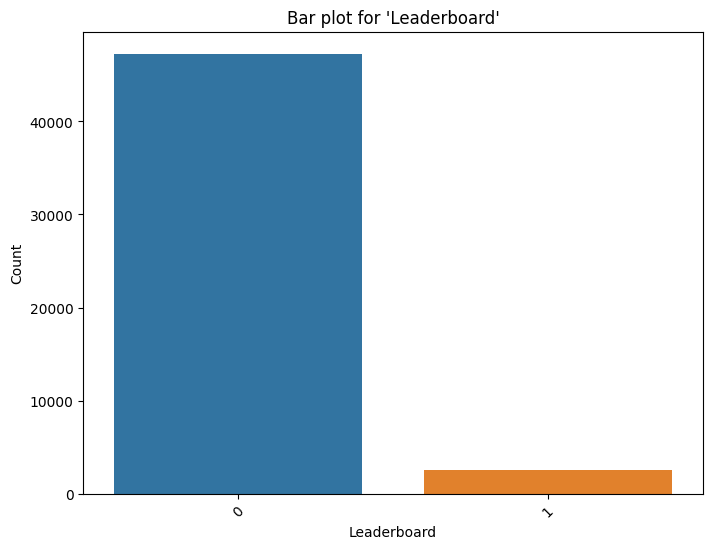

Value counts for 'VerifyMobile':
0    47186
1     2688
Name: VerifyMobile, dtype: int64
--------------------------------


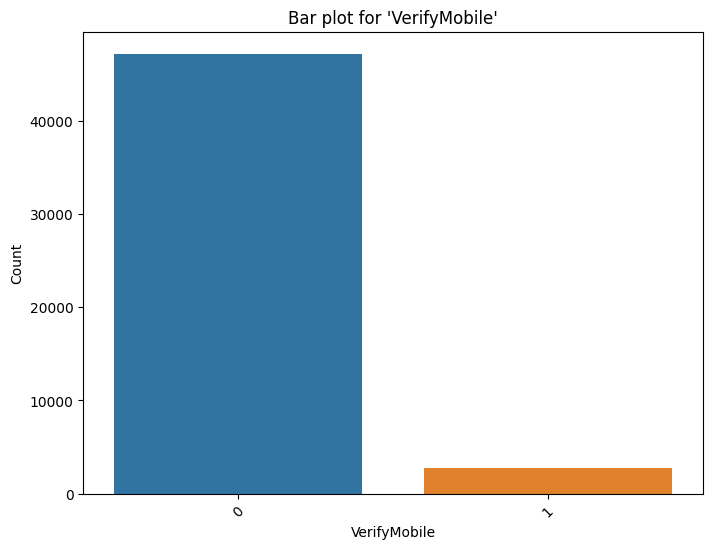

Value counts for 'VerifyHousing':
0    47732
1     2142
Name: VerifyHousing, dtype: int64
--------------------------------


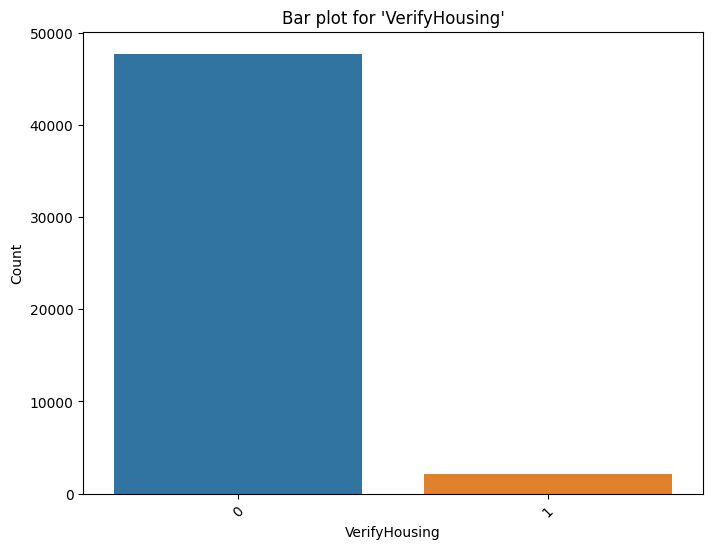

Value counts for 'RewardDetail':
0    48333
1     1541
Name: RewardDetail, dtype: int64
--------------------------------


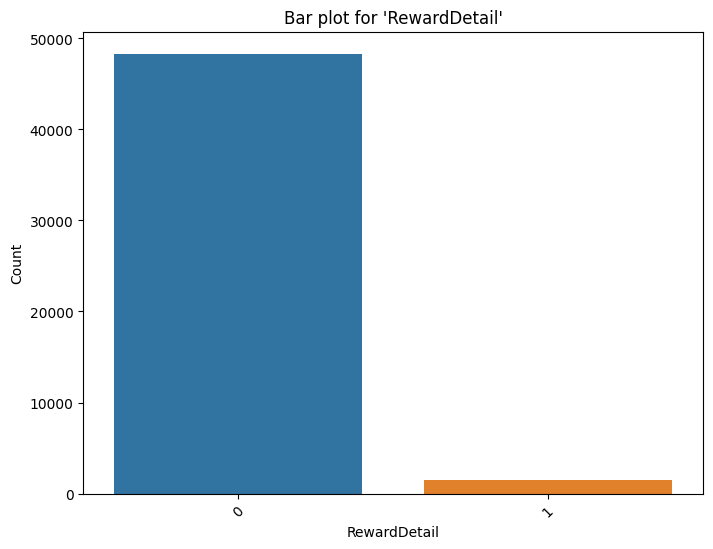

Value counts for 'VerifyHousingAmount':
0    47809
1     2065
Name: VerifyHousingAmount, dtype: int64
--------------------------------


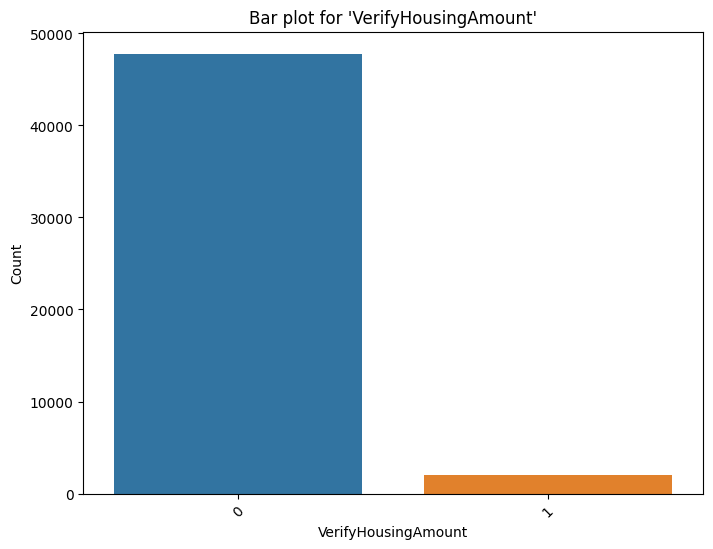

Value counts for 'ProfileMaritalStatus':
0    47504
1     2370
Name: ProfileMaritalStatus, dtype: int64
--------------------------------


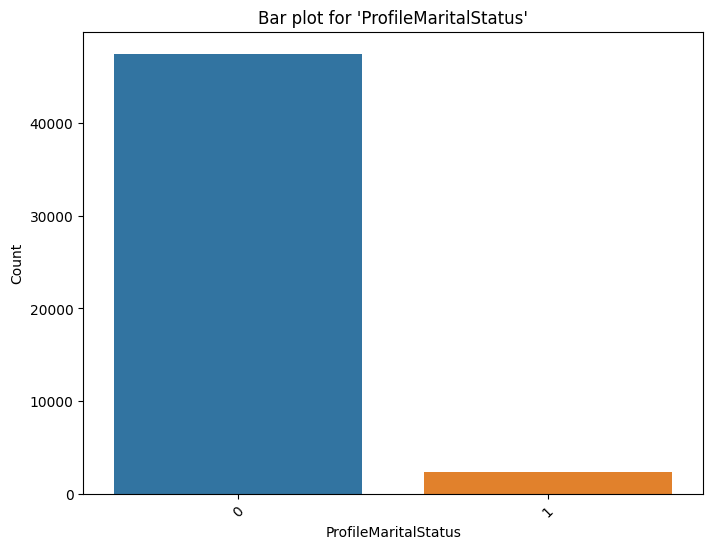

Value counts for 'ProfileChildren ':
0    47574
1     2300
Name: ProfileChildren , dtype: int64
--------------------------------


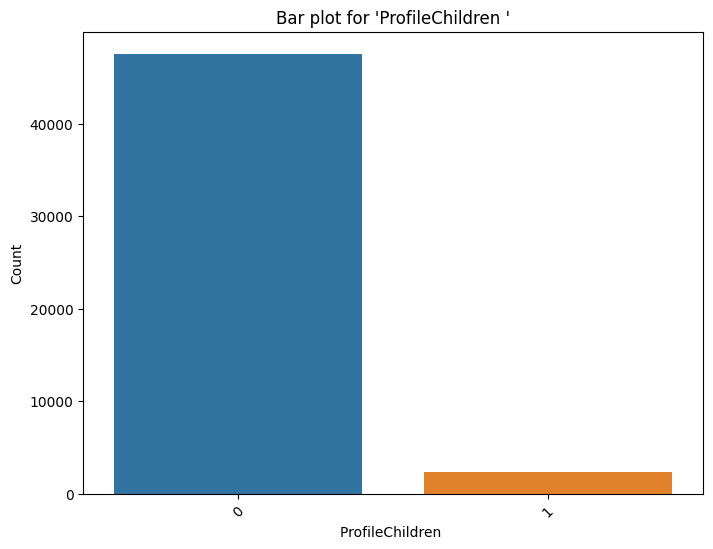

Value counts for 'ProfileEducation':
0    47740
1     2134
Name: ProfileEducation, dtype: int64
--------------------------------


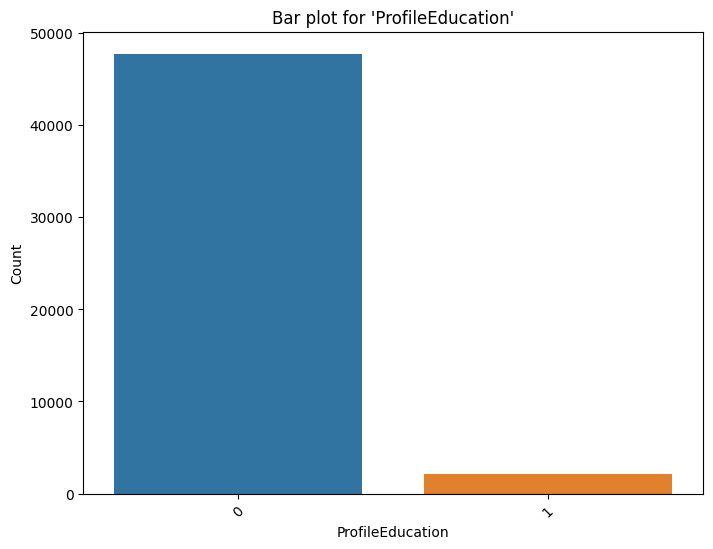

Value counts for 'ProfileEducationMajor':
0    47828
1     2046
Name: ProfileEducationMajor, dtype: int64
--------------------------------


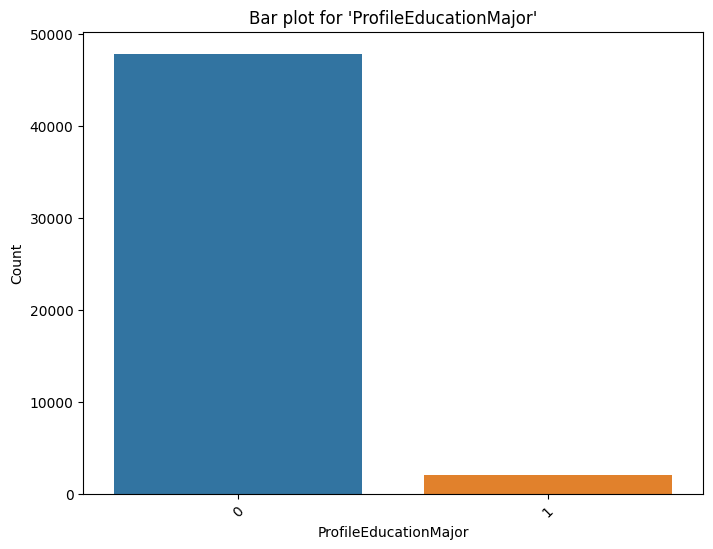

Value counts for 'Rewards':
0    48656
1     1218
Name: Rewards, dtype: int64
--------------------------------


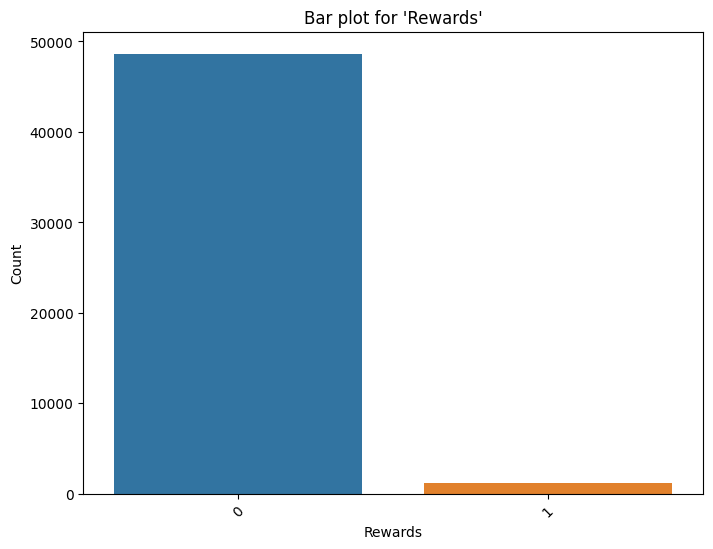

Value counts for 'AccountView':
0    48566
1     1308
Name: AccountView, dtype: int64
--------------------------------


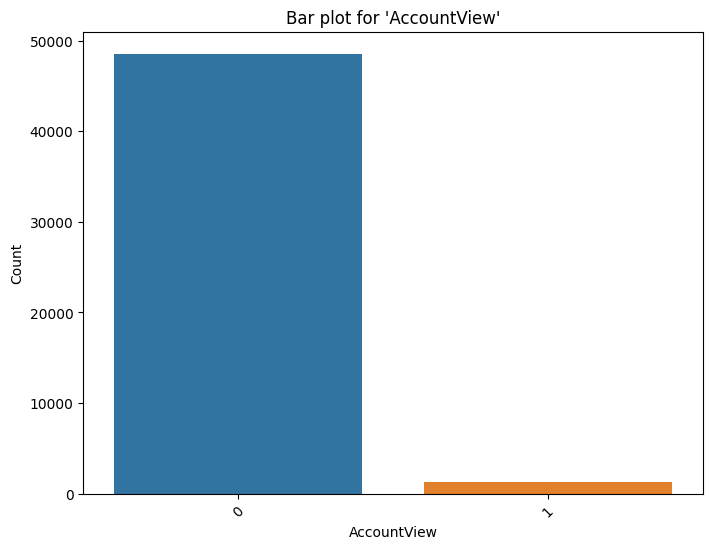

Value counts for 'VerifyAnnualIncome':
0    48698
1     1176
Name: VerifyAnnualIncome, dtype: int64
--------------------------------


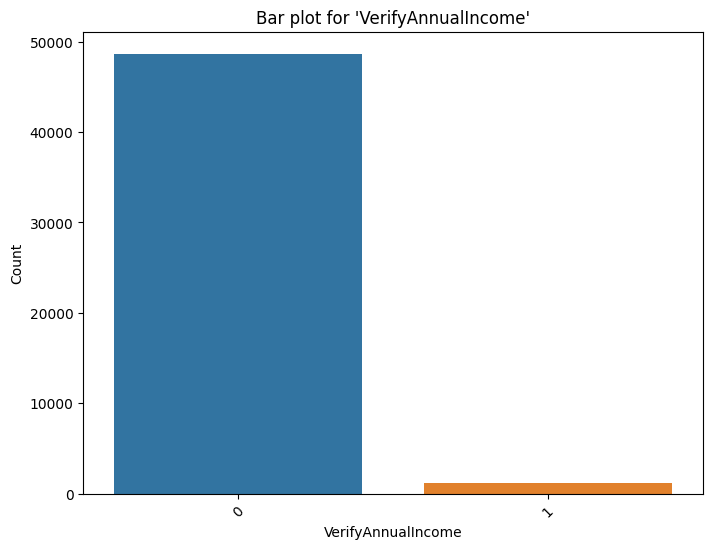

Value counts for 'VerifyIncomeType':
0    48660
1     1214
Name: VerifyIncomeType, dtype: int64
--------------------------------


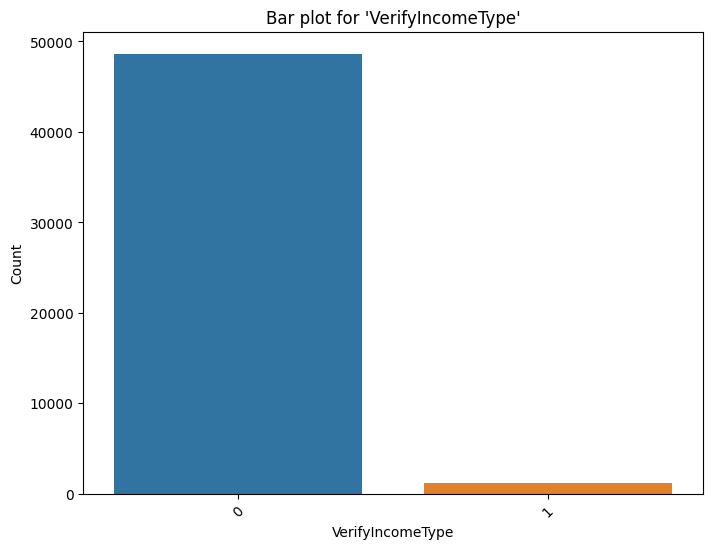

Value counts for 'ProfileJobTitle':
0    48754
1     1120
Name: ProfileJobTitle, dtype: int64
--------------------------------


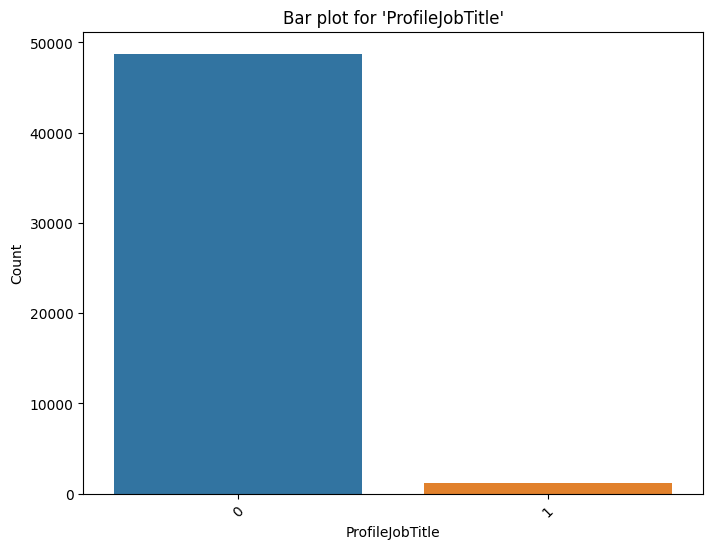

Value counts for 'Login':
0    48981
1      893
Name: Login, dtype: int64
--------------------------------


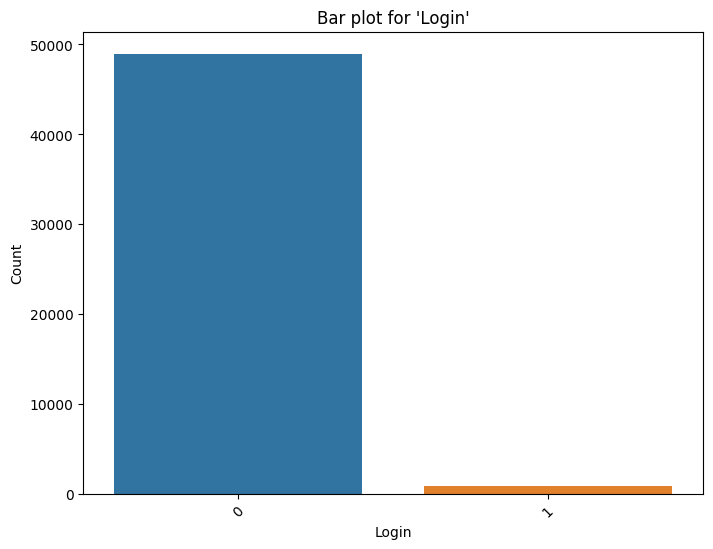

Value counts for 'ProfileEmploymentLength':
0    48818
1     1056
Name: ProfileEmploymentLength, dtype: int64
--------------------------------


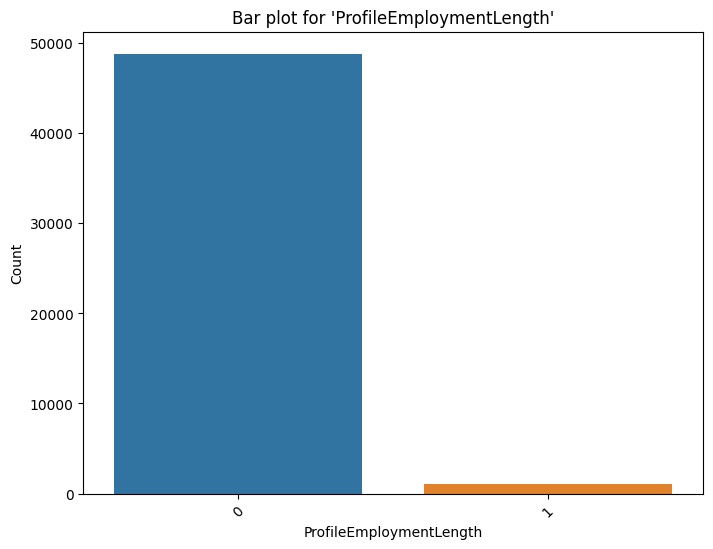

Value counts for 'WebView':
0    48877
1      997
Name: WebView, dtype: int64
--------------------------------


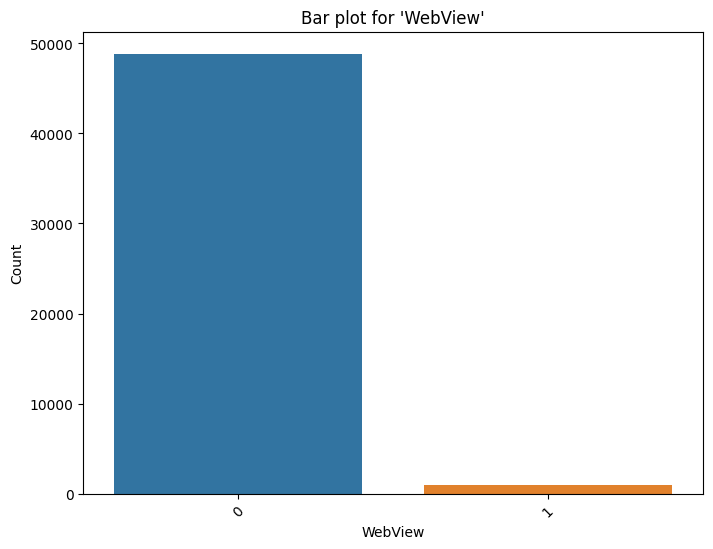

Value counts for 'SecurityModal':
0    49165
1      709
Name: SecurityModal, dtype: int64
--------------------------------


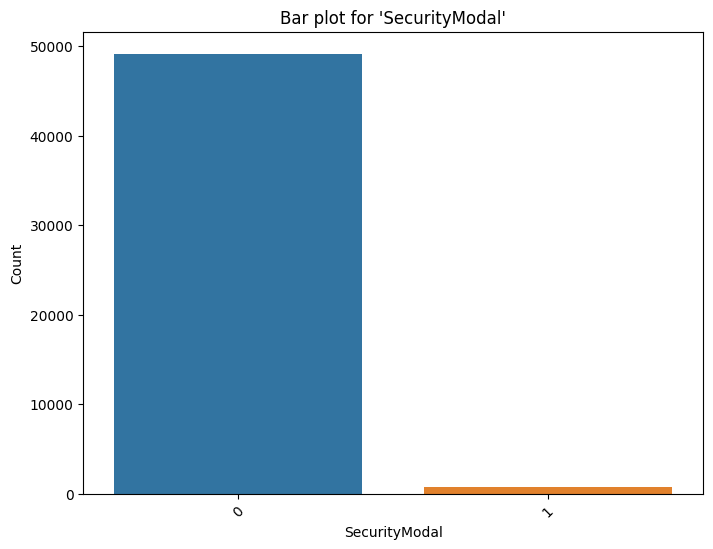

Value counts for 'ResendToken':
0    49209
1      665
Name: ResendToken, dtype: int64
--------------------------------


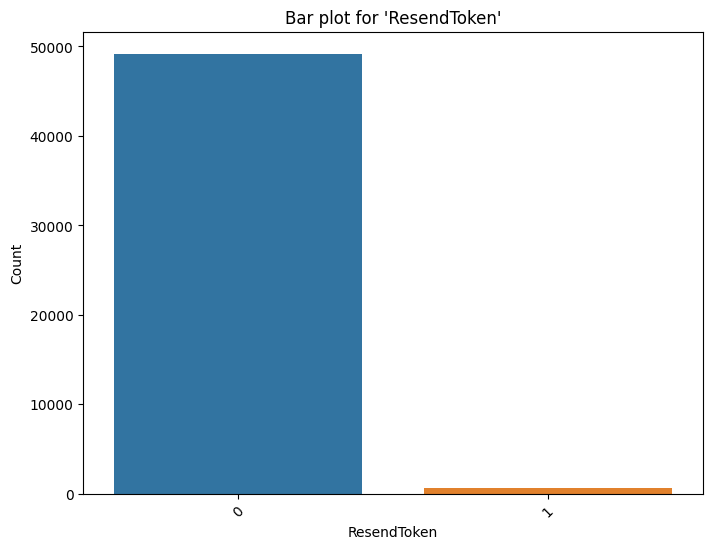

Value counts for 'TransactionList':
0    49209
1      665
Name: TransactionList, dtype: int64
--------------------------------


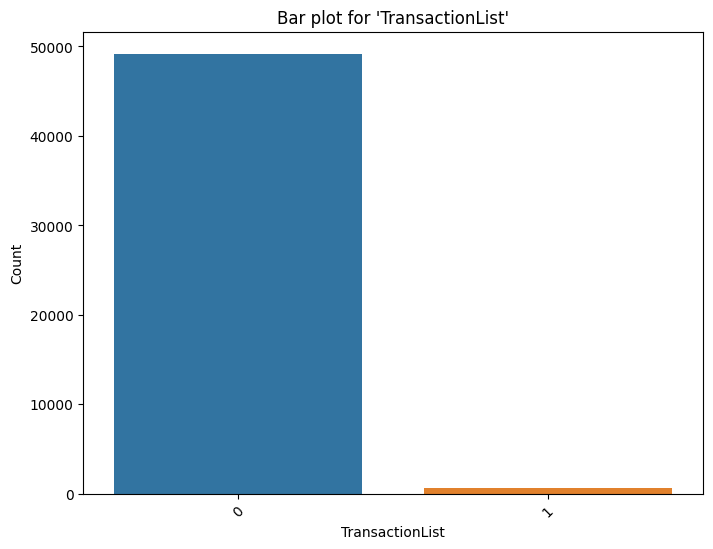

Value counts for 'NetworkFailure':
0    49465
1      409
Name: NetworkFailure, dtype: int64
--------------------------------


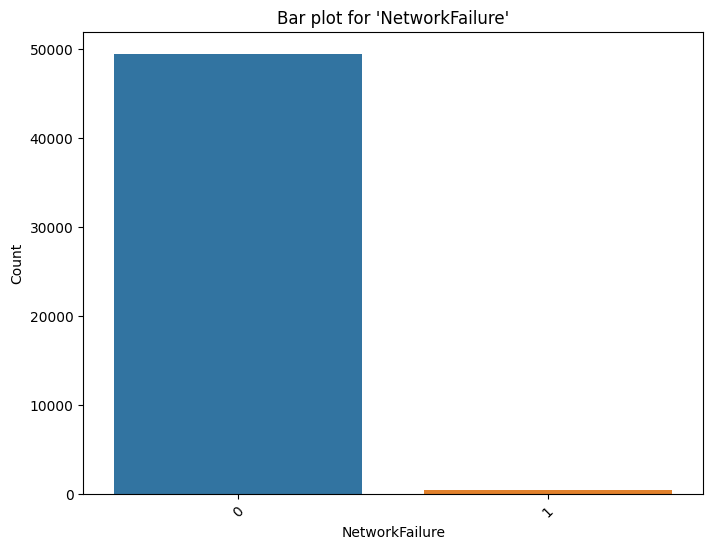

Value counts for 'ListPicker':
0    49495
1      379
Name: ListPicker, dtype: int64
--------------------------------


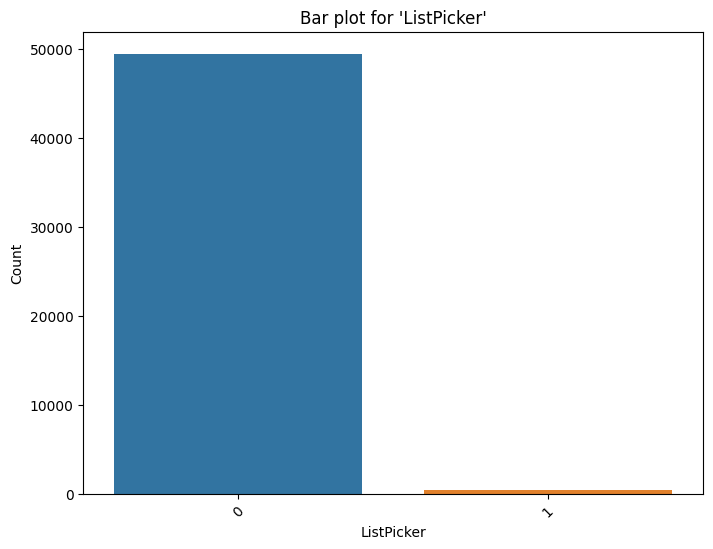

In [136]:
 univariate_analysis_categorical(df,df_cat)

## BIVARIATE ANALYSIS

In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def bivariate_analysis(df, independent_numerical, target_categorical):

    for column in independent_numerical:
        # Box plot by target category
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=target_categorical, y=column, data=df)
        plt.title(f"Box plot of '{column}' by '{target_categorical}'")
        plt.xlabel(target_categorical)
        plt.ylabel(column)
        plt.show()

        # Violin plot by target category
        plt.figure(figsize=(8, 6))
        sns.violinplot(x=target_categorical, y=column, data=df)
        plt.title(f"Violin plot of '{column}' by '{target_categorical}'")
        plt.xlabel(target_categorical)
        plt.ylabel(column)
        plt.show()

        # Scatter plot by target category (if target is binary)
        if len(df[target_categorical].unique()) == 2:
            plt.figure(figsize=(8, 6))
            sns.scatterplot(x=column, y=target_categorical, data=df)
            plt.title(f"Scatter plot of '{column}' by '{target_categorical}'")
            plt.xlabel(column)
            plt.ylabel(target_categorical)
            plt.show()




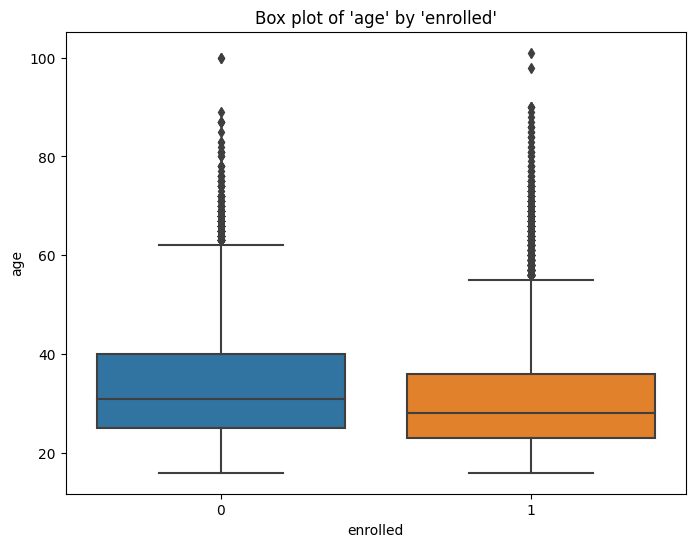

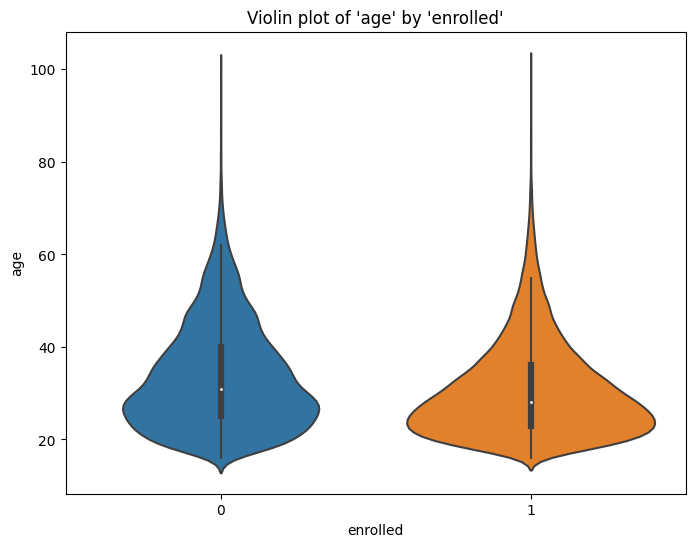

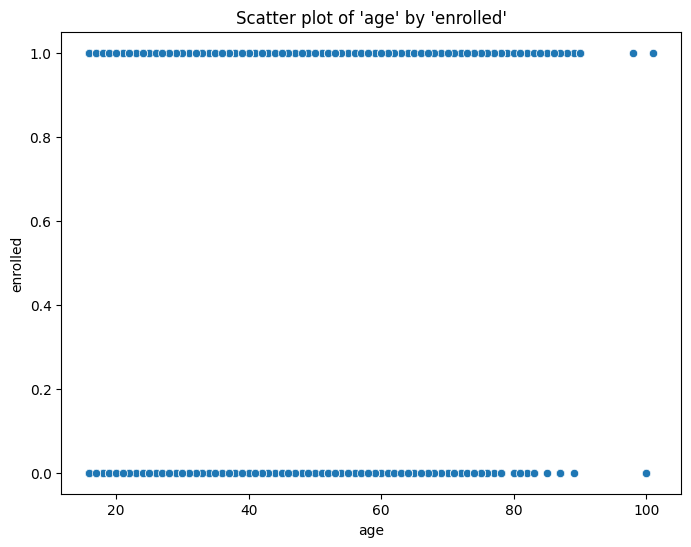

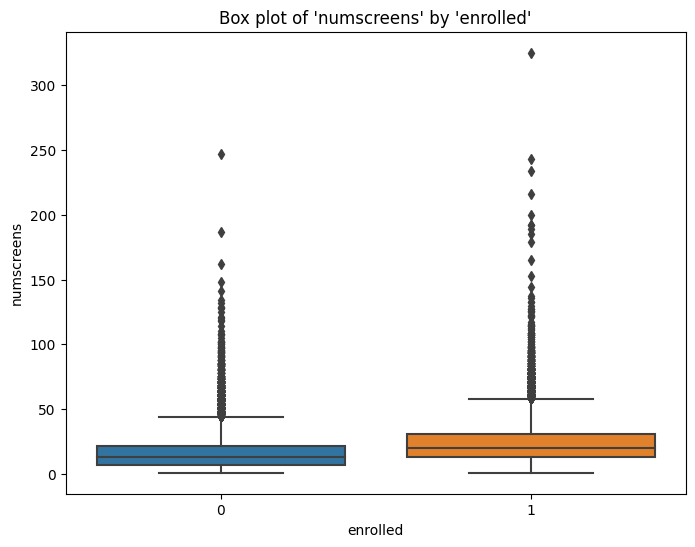

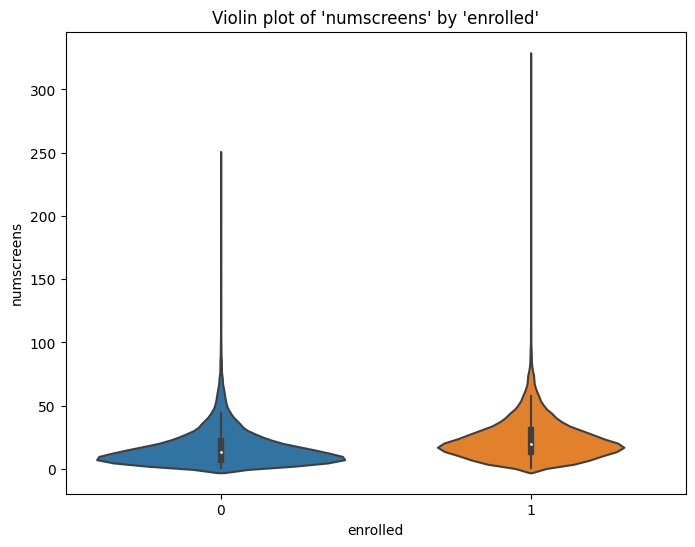

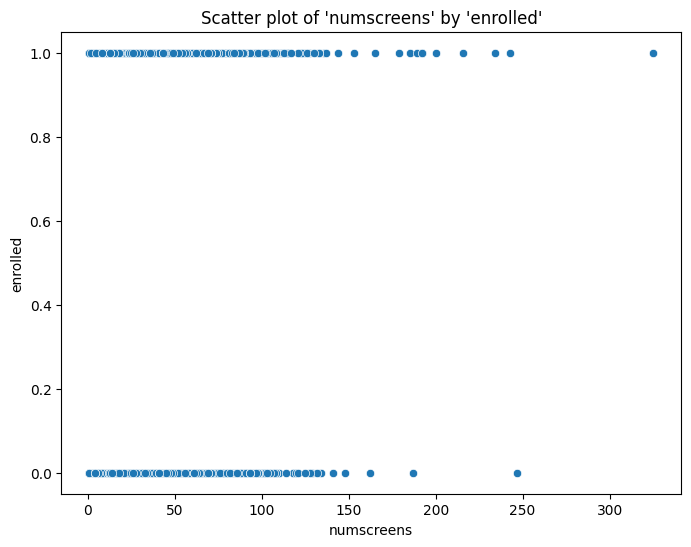

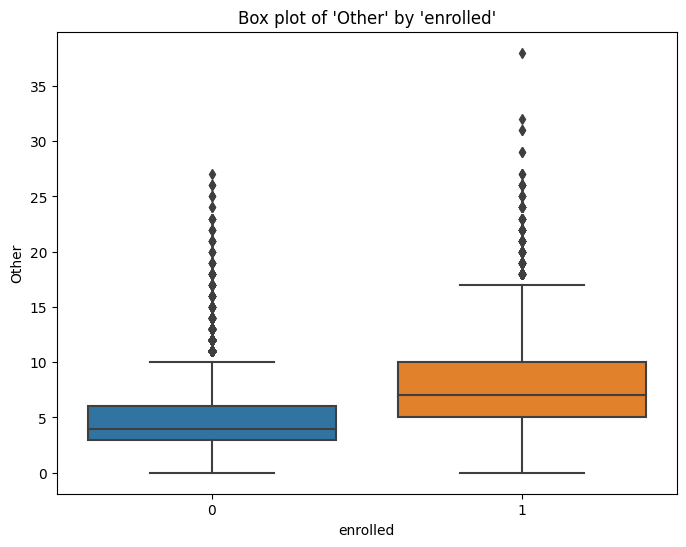

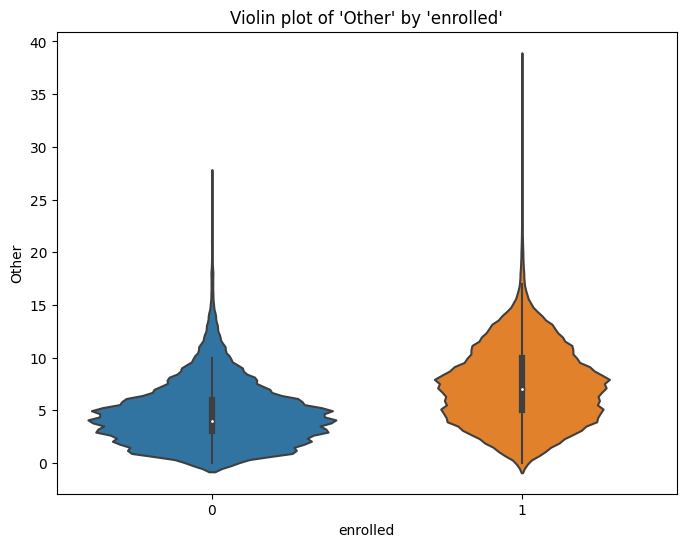

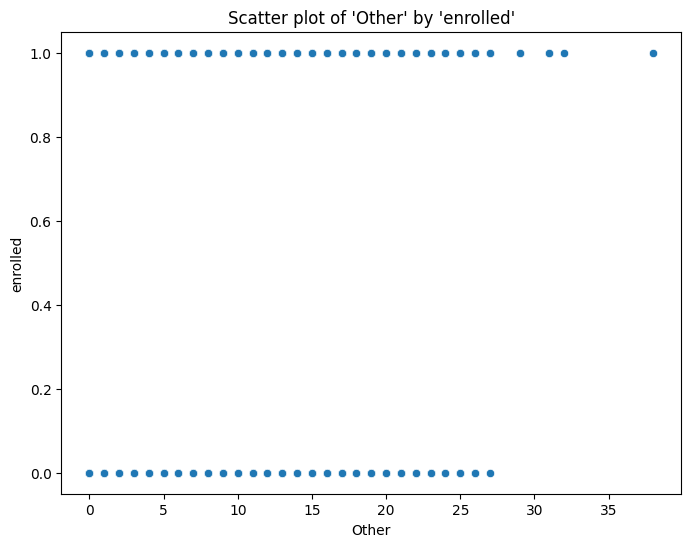

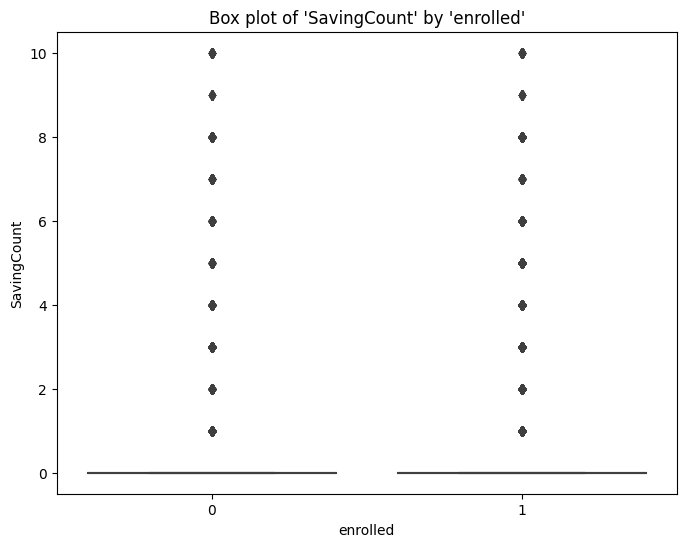

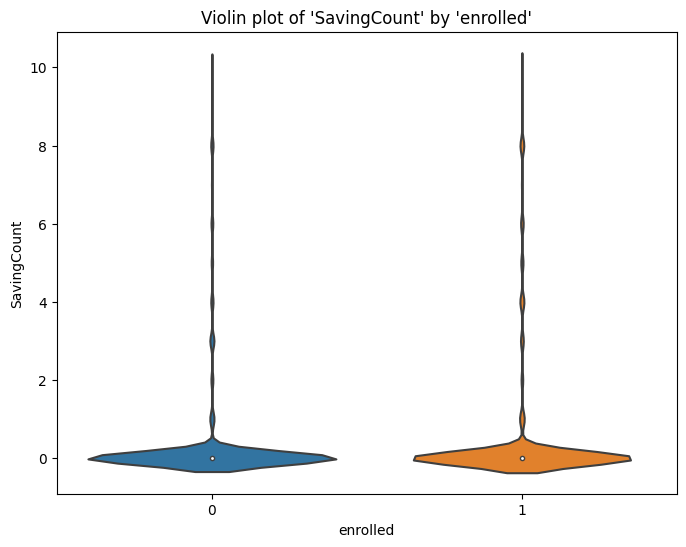

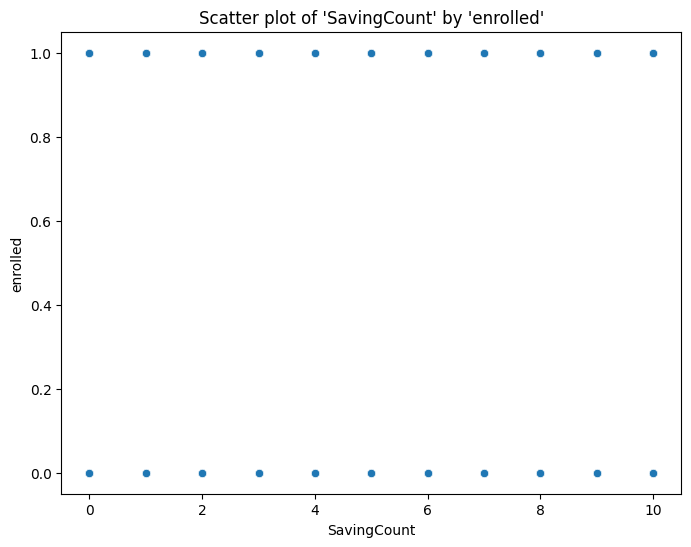

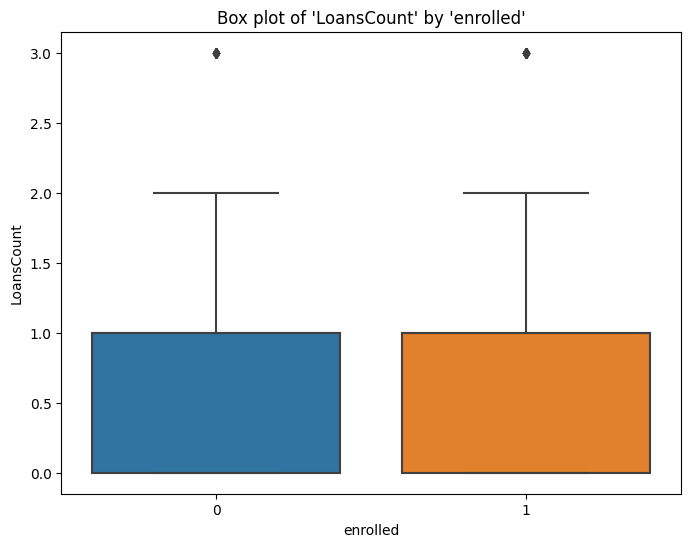

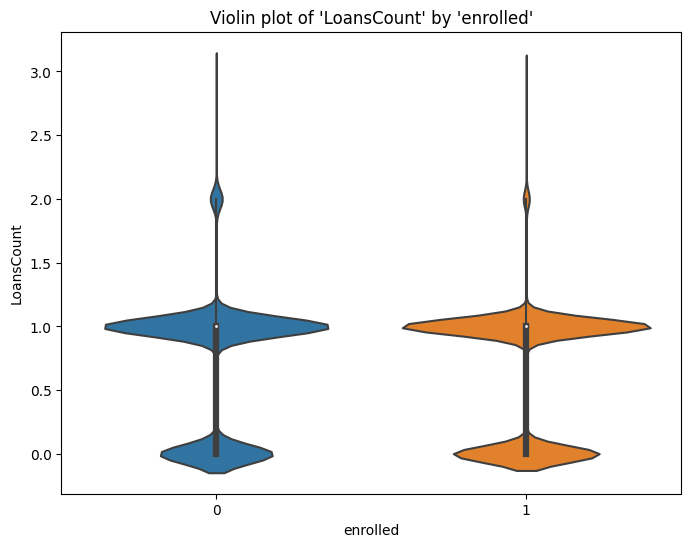

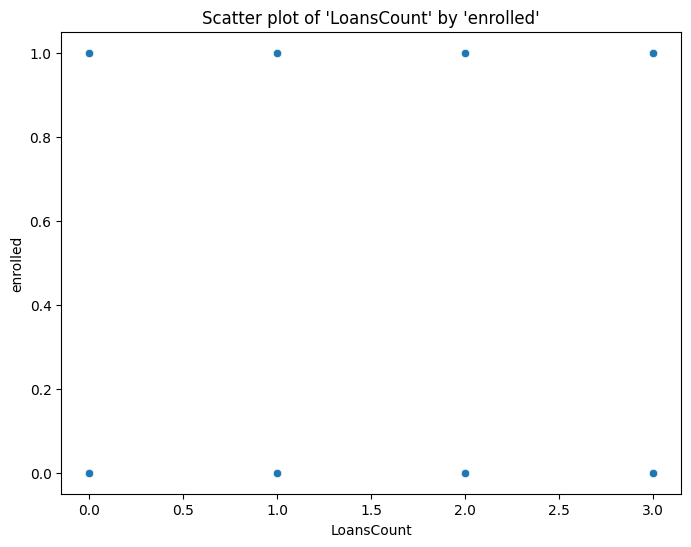

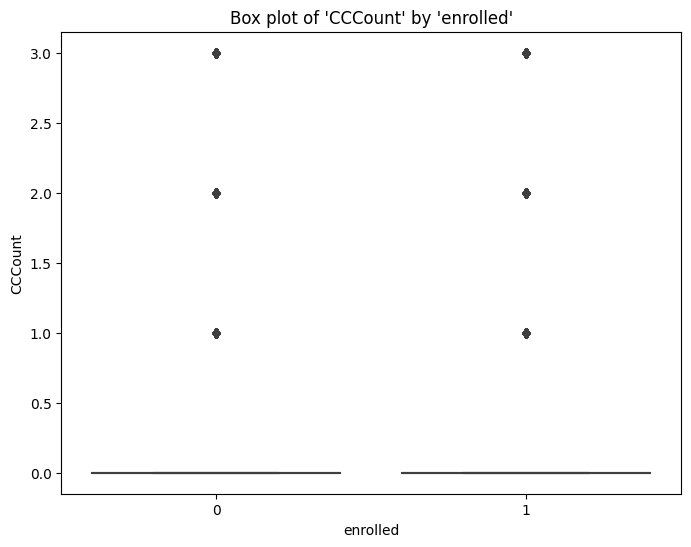

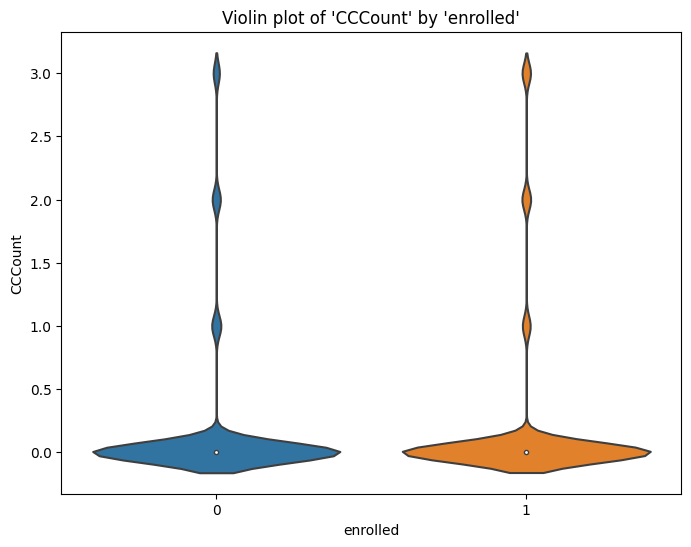

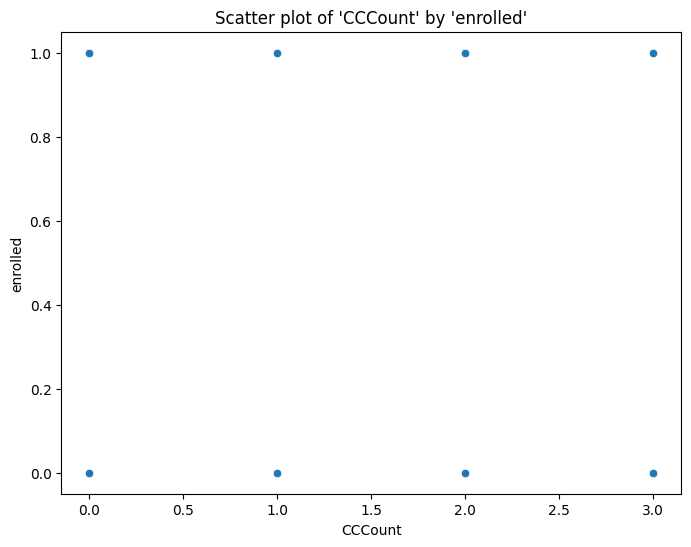

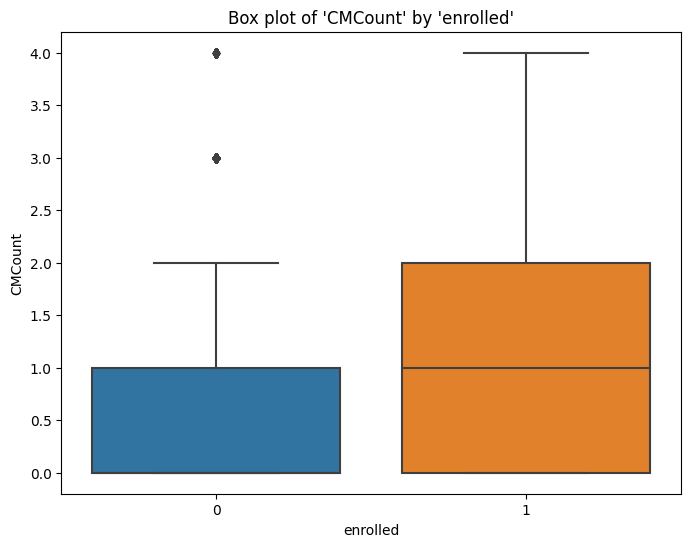

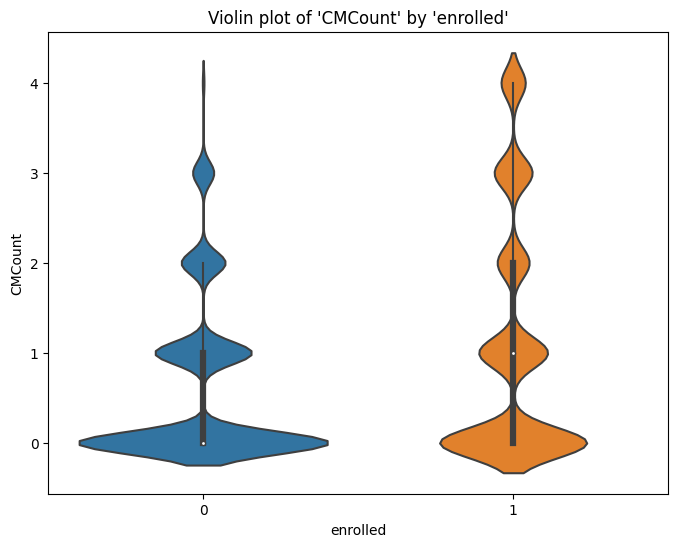

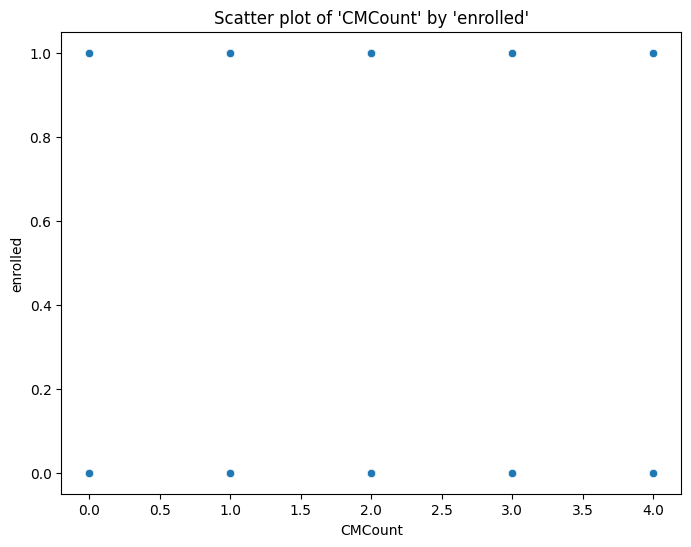

In [138]:
 bivariate_analysis(df,df_num,'enrolled')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def bivariate_analysis_categorical(df, independent_categorical, target_categorical):

    for column in independent_categorical:
        # Cross-tabulation
        cross_tab = pd.crosstab(df[column], df[target_categorical], normalize='index')

        # Plot stacked bar chart
        plt.figure(figsize=(8, 6))
        cross_tab.plot(kind='bar', stacked=True)
        plt.title(f'Stacked Bar Chart of "{column}" vs "{target_categorical}"')
        plt.xlabel(column)
        plt.ylabel('Proportion')
        plt.xticks(rotation=45)
        plt.legend(title=target_categorical)
        plt.show()




<Figure size 800x600 with 0 Axes>

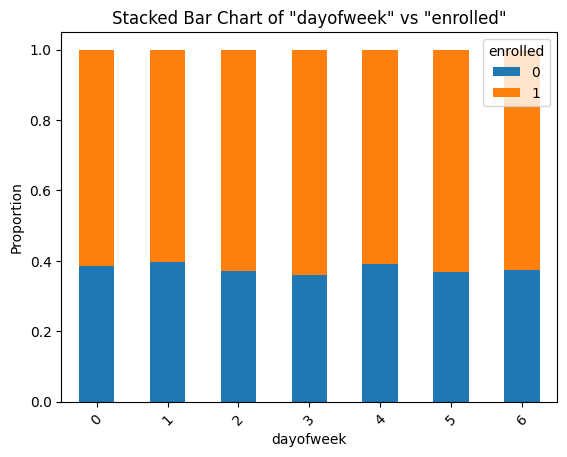

<Figure size 800x600 with 0 Axes>

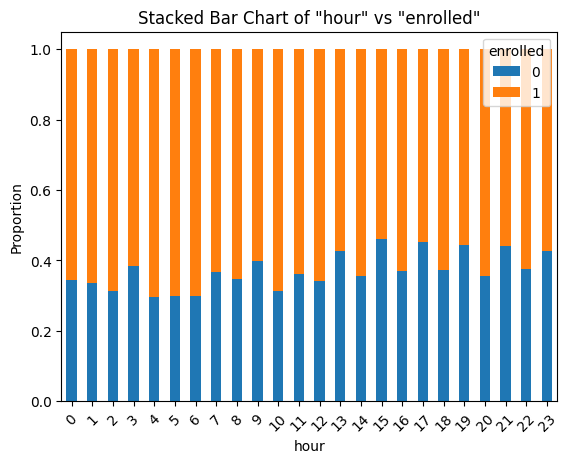

<Figure size 800x600 with 0 Axes>

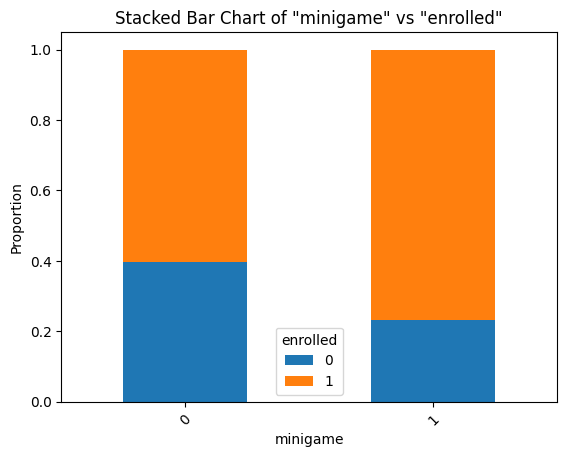

<Figure size 800x600 with 0 Axes>

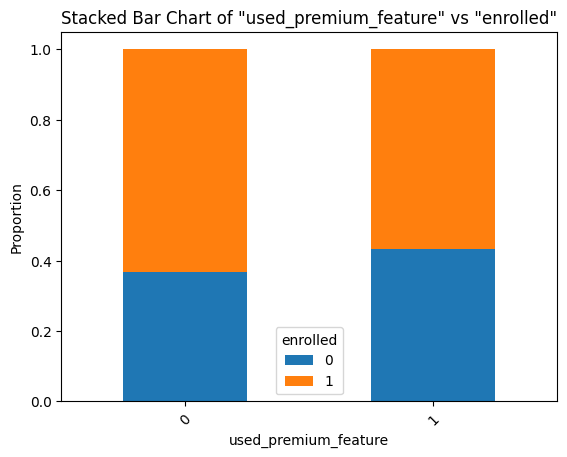

<Figure size 800x600 with 0 Axes>

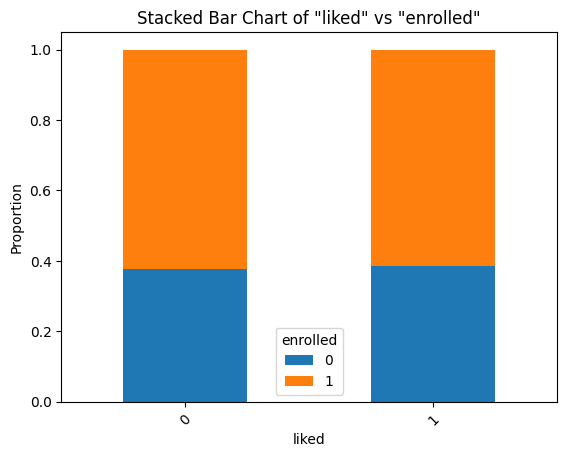

<Figure size 800x600 with 0 Axes>

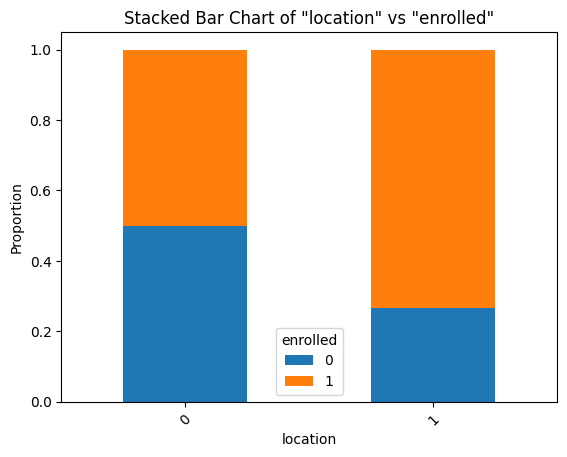

<Figure size 800x600 with 0 Axes>

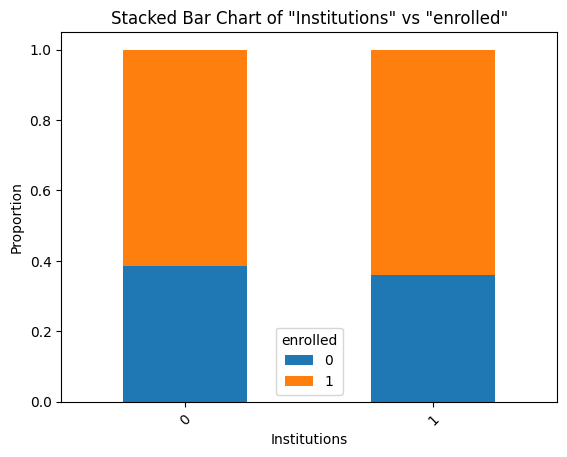

<Figure size 800x600 with 0 Axes>

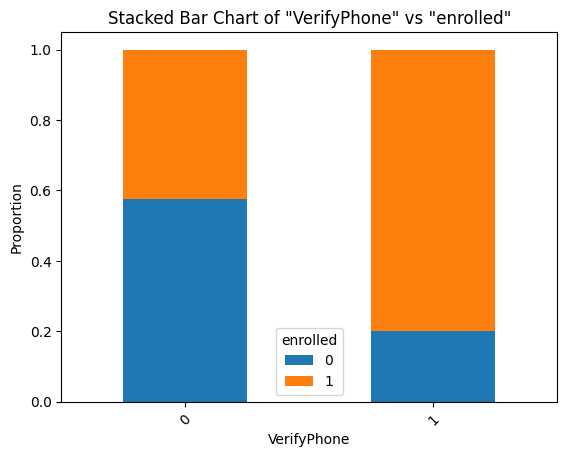

<Figure size 800x600 with 0 Axes>

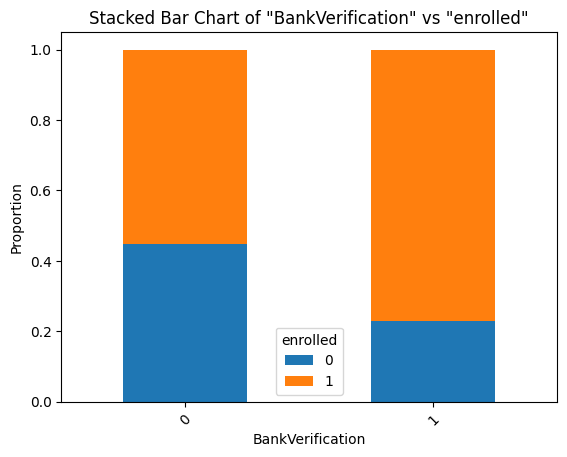

<Figure size 800x600 with 0 Axes>

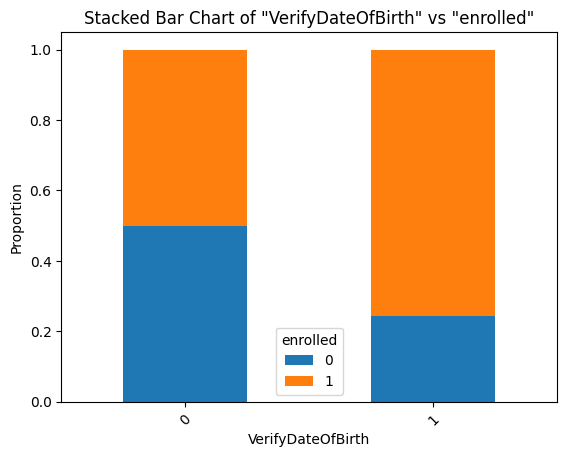

<Figure size 800x600 with 0 Axes>

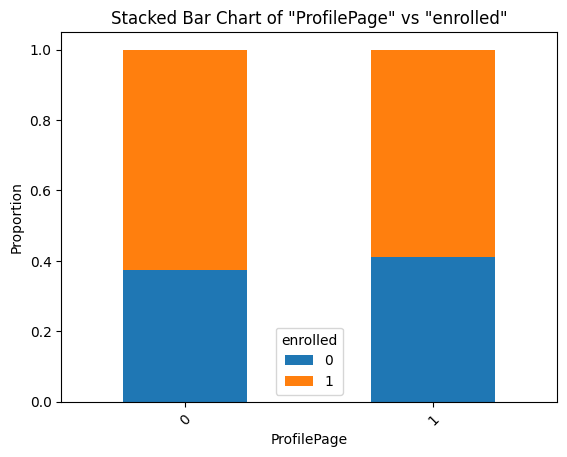

<Figure size 800x600 with 0 Axes>

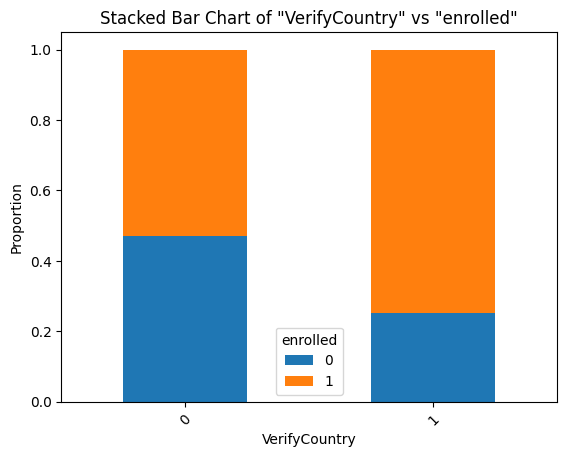

<Figure size 800x600 with 0 Axes>

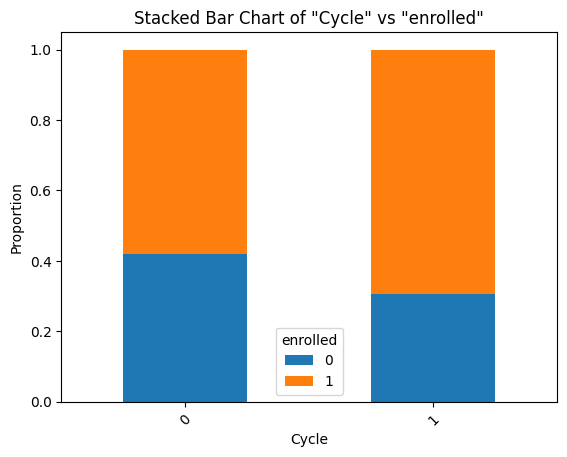

<Figure size 800x600 with 0 Axes>

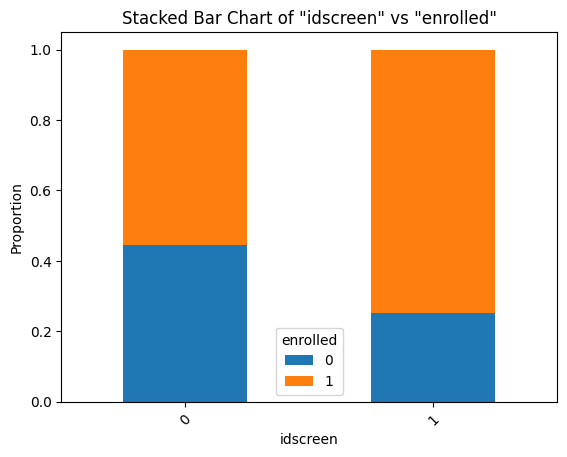

<Figure size 800x600 with 0 Axes>

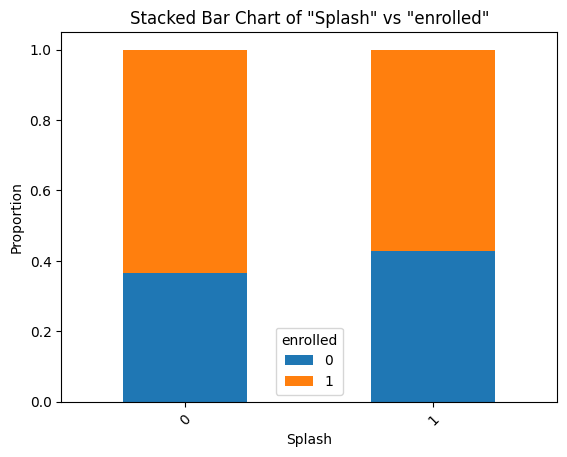

<Figure size 800x600 with 0 Axes>

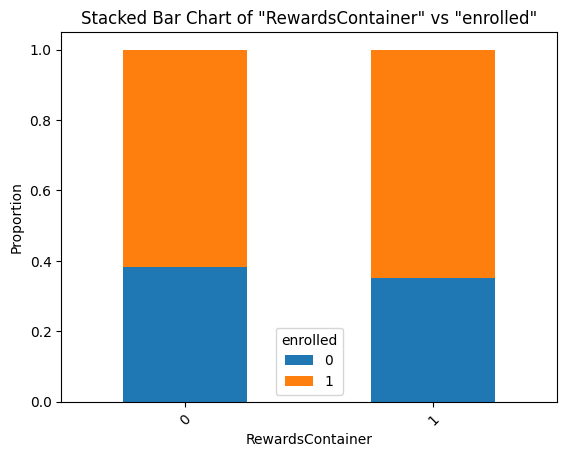

<Figure size 800x600 with 0 Axes>

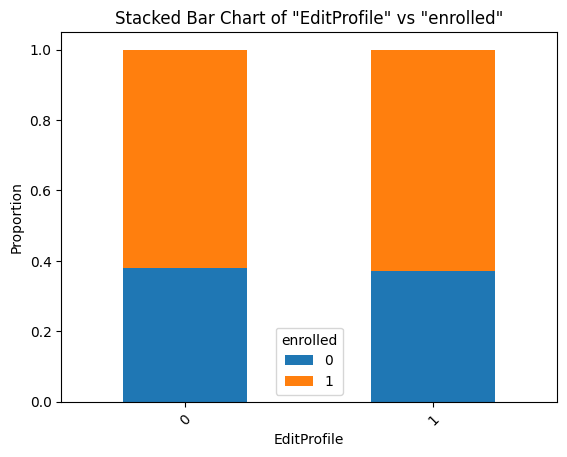

<Figure size 800x600 with 0 Axes>

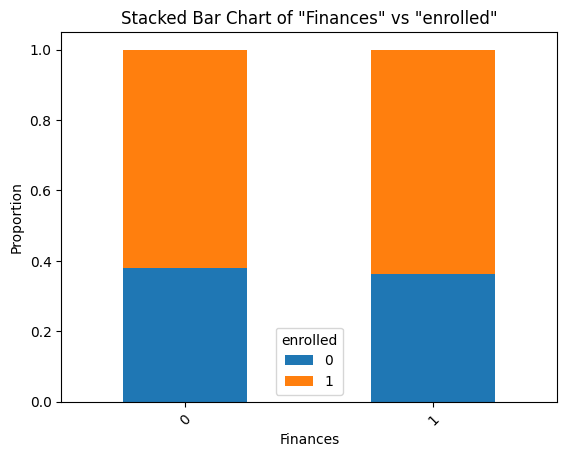

<Figure size 800x600 with 0 Axes>

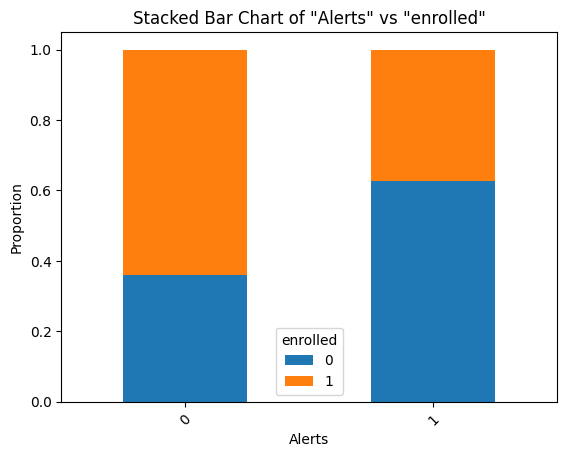

<Figure size 800x600 with 0 Axes>

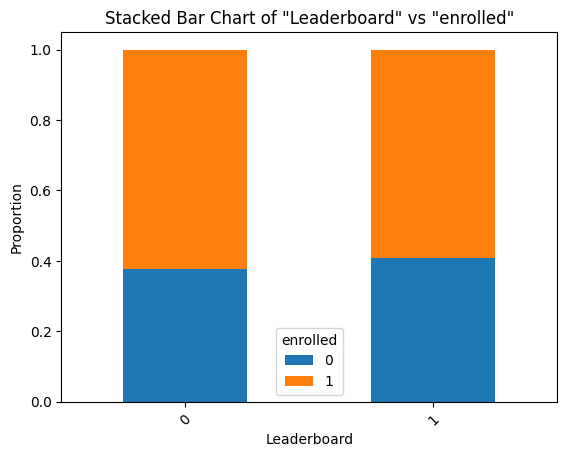

<Figure size 800x600 with 0 Axes>

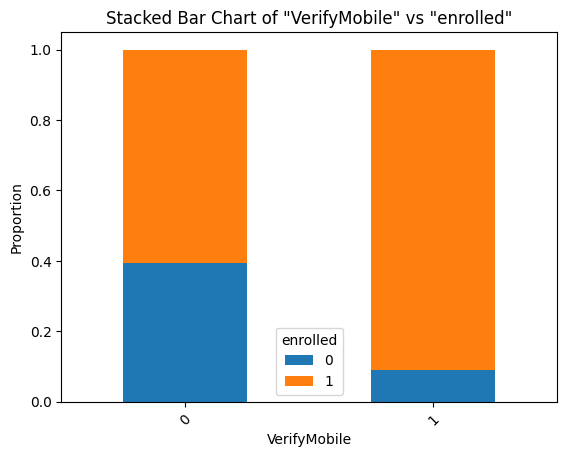

<Figure size 800x600 with 0 Axes>

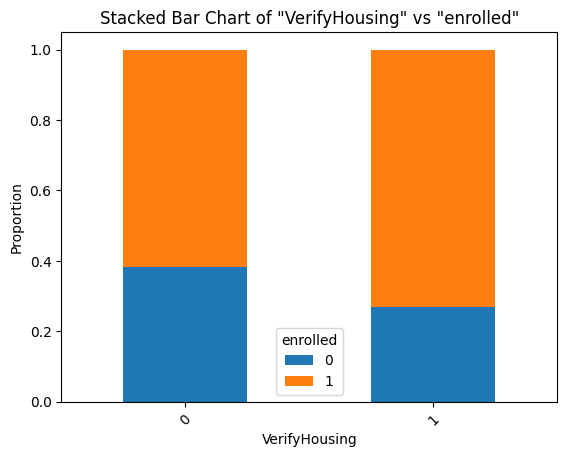

<Figure size 800x600 with 0 Axes>

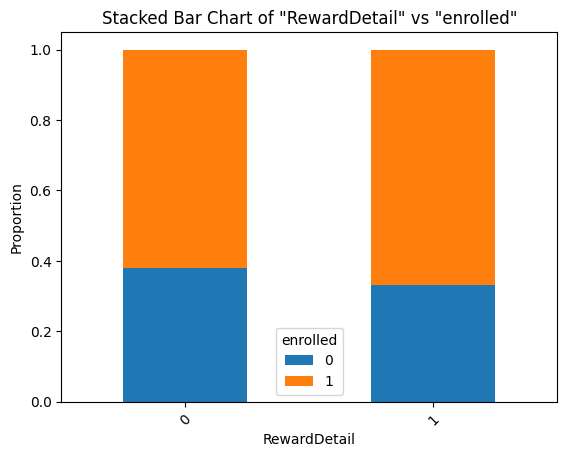

<Figure size 800x600 with 0 Axes>

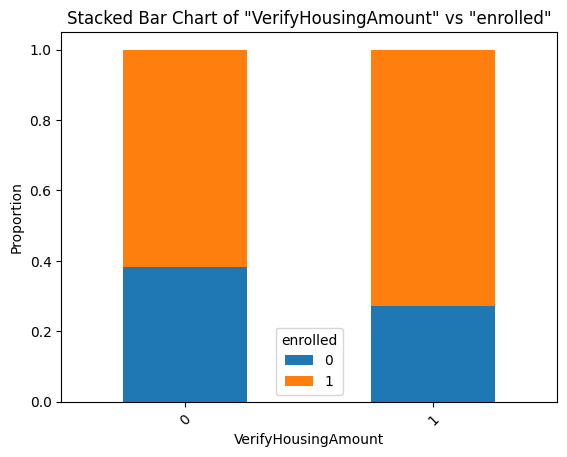

<Figure size 800x600 with 0 Axes>

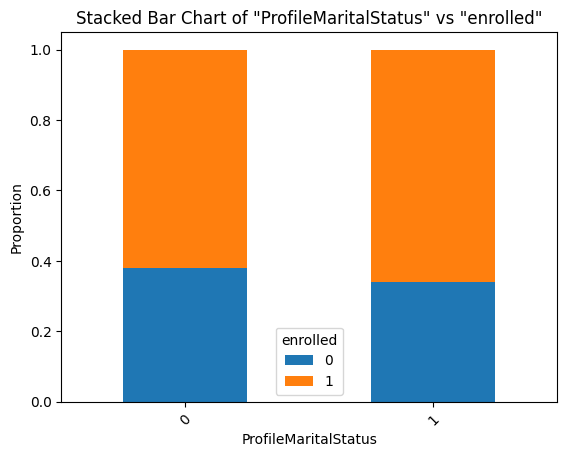

<Figure size 800x600 with 0 Axes>

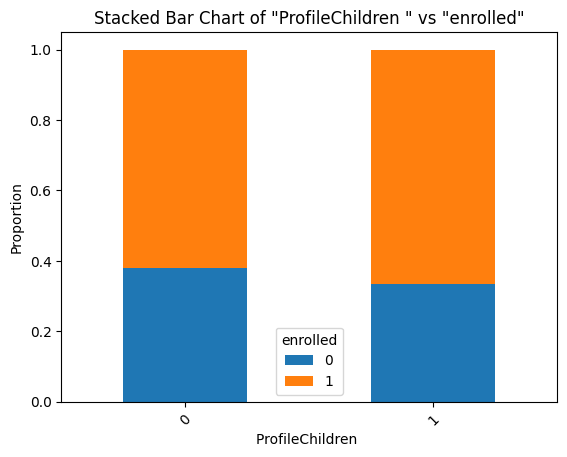

<Figure size 800x600 with 0 Axes>

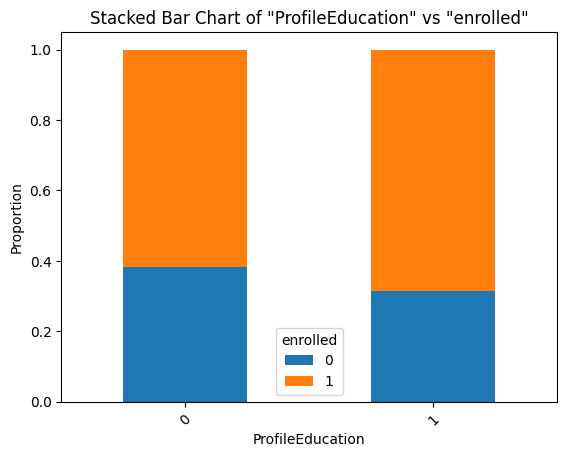

<Figure size 800x600 with 0 Axes>

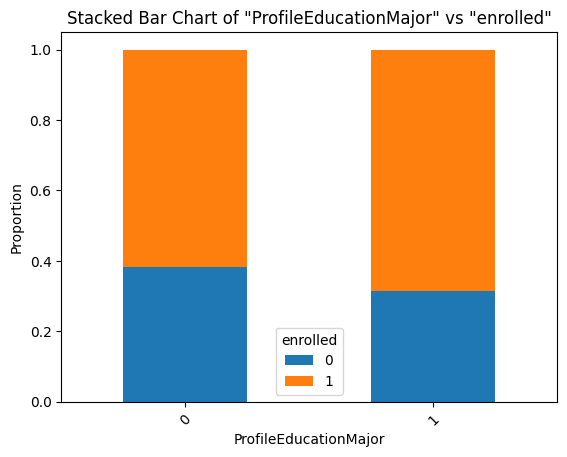

<Figure size 800x600 with 0 Axes>

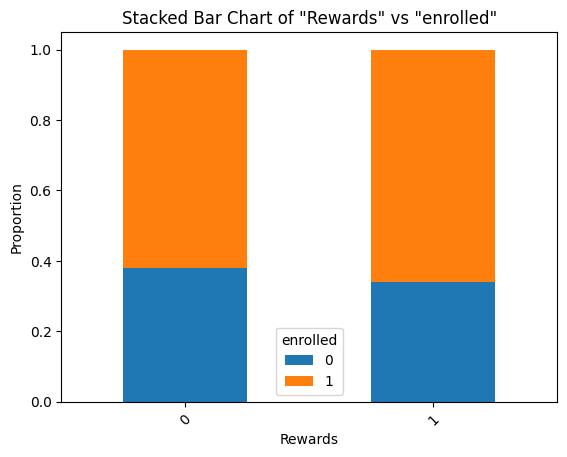

<Figure size 800x600 with 0 Axes>

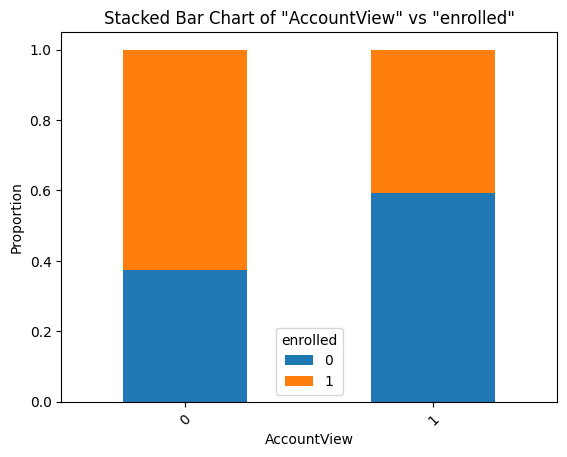

<Figure size 800x600 with 0 Axes>

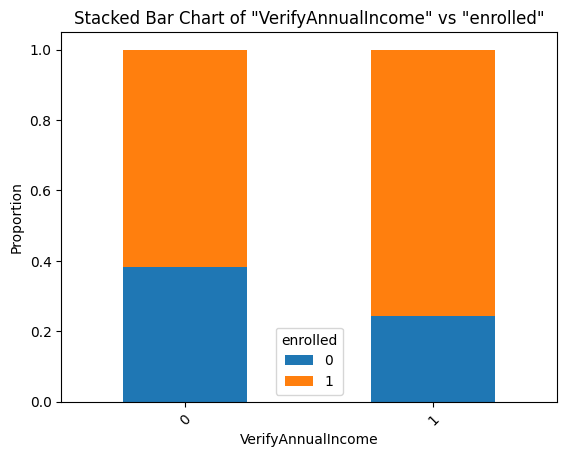

<Figure size 800x600 with 0 Axes>

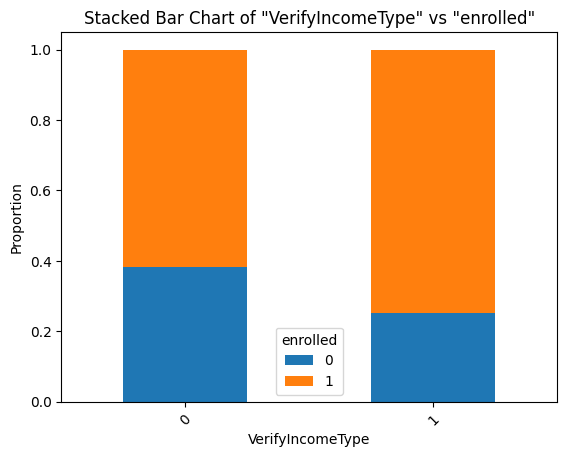

<Figure size 800x600 with 0 Axes>

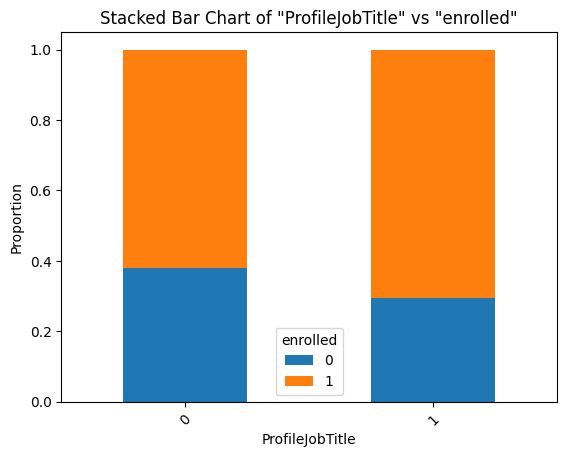

<Figure size 800x600 with 0 Axes>

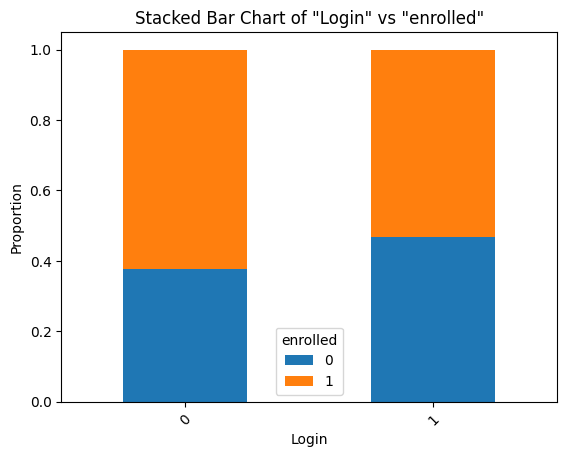

<Figure size 800x600 with 0 Axes>

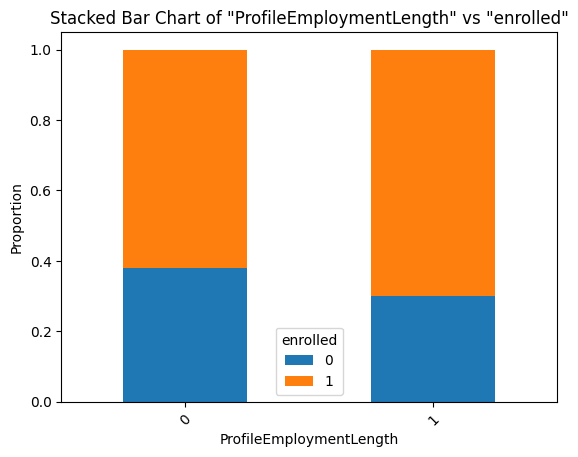

<Figure size 800x600 with 0 Axes>

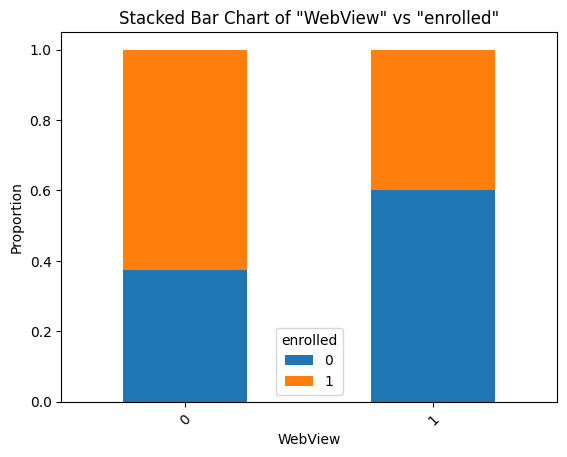

<Figure size 800x600 with 0 Axes>

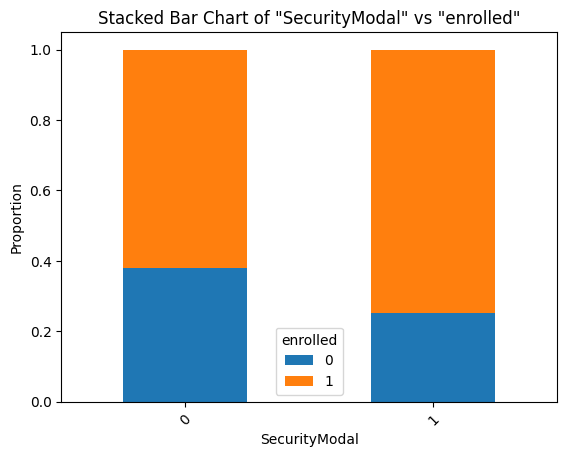

<Figure size 800x600 with 0 Axes>

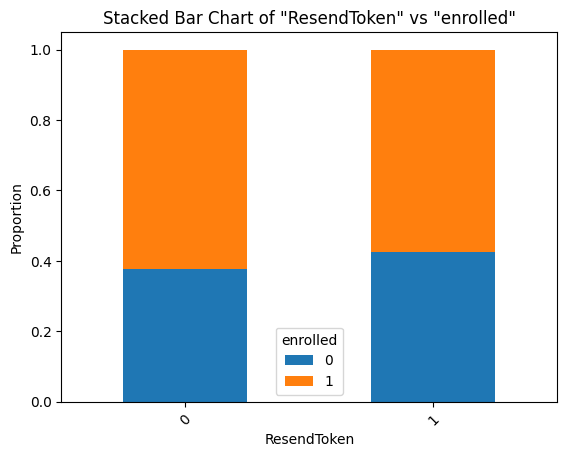

<Figure size 800x600 with 0 Axes>

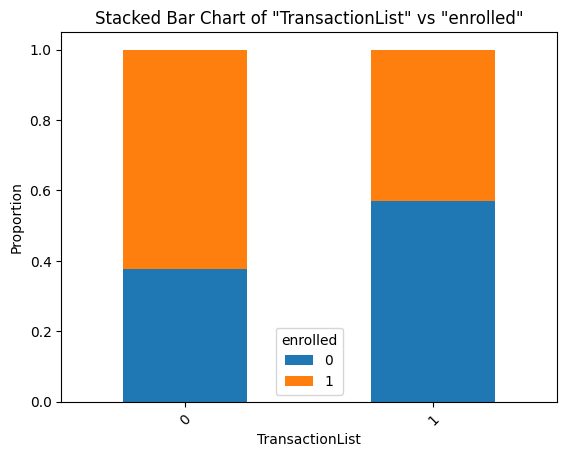

<Figure size 800x600 with 0 Axes>

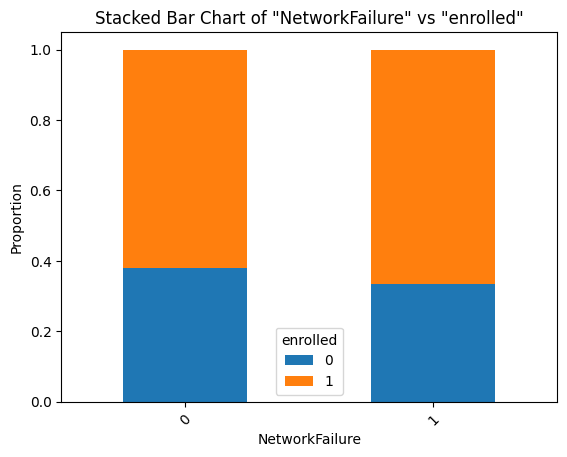

<Figure size 800x600 with 0 Axes>

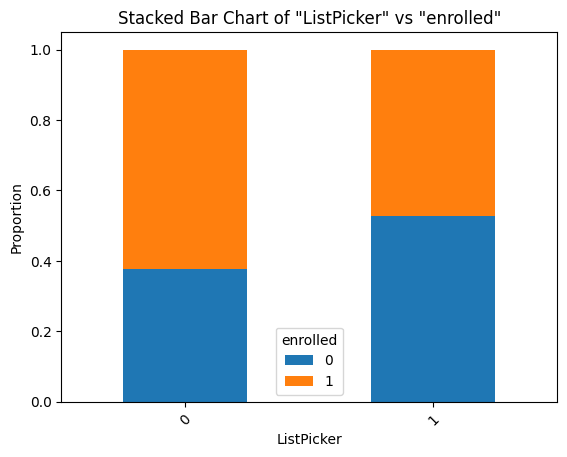

In [ ]:
 bivariate_analysis_categorical(df,df_cat, "enrolled")

## OUTLIER ANALYSIS FUNCTION

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def outlier_analysis(df, independent_numerical):

    for column in independent_numerical:
        # Box plot to identify potential outliers
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=df[column])
        plt.title(f"Box plot of '{column}'")
        plt.xlabel(column)
        plt.show()

        # Calculate IQR (Interquartile Range)
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1

        # Define outlier boundaries
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        if not outliers.empty:
            print(f"Outliers in '{column}':")
            print(outliers)
            print("--------------------------------")
        else:
            print(f"No outliers found in '{column}'")
            print("--------------------------------")




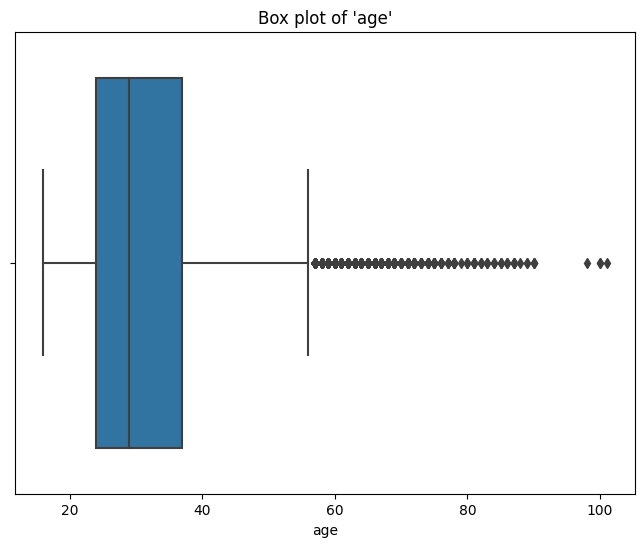

Outliers in 'age':
       dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
46             4    14   58          45         0                     0   
54             4     3   57          11         0                     0   
167            1    13   58          13         0                     0   
193            5    11   60          10         0                     0   
197            0    15   60           6         0                     0   
...          ...   ...  ...         ...       ...                   ...   
49873          4    21   57           8         0                     1   
49945          3    19   60          21         0                     0   
49957          2    19   58          12         0                     0   
49969          6    14   58          26         0                     0   
49982          4     2   58           2         0                     0   

       enrolled  liked  location  Institutions  ...  SecurityModal  \
46        

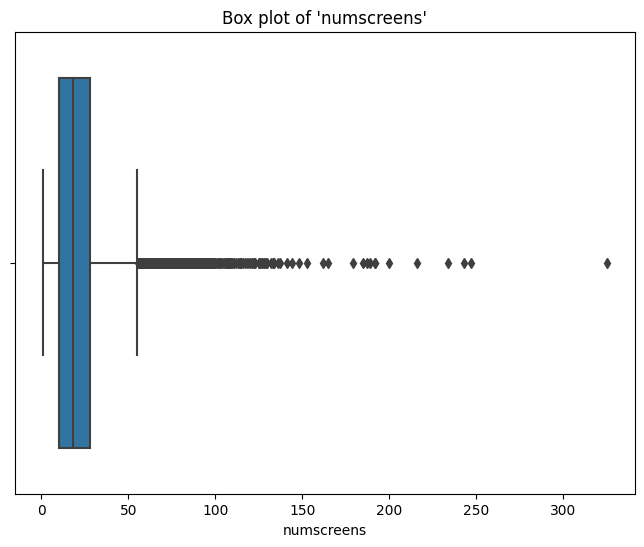

Outliers in 'numscreens':
       dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
32             6    20   23          76         0                     0   
40             1     6   25          90         0                     0   
57             3    19   20          57         0                     0   
84             6     6   24         136         1                     0   
109            0     4   24          59         0                     0   
...          ...   ...  ...         ...       ...                   ...   
49784          4     2   18          71         0                     0   
49808          3    15   32          62         0                     0   
49872          2    12   32          71         0                     0   
49955          2    18   29          86         1                     0   
49976          2    20   35          69         0                     0   

       enrolled  liked  location  Institutions  ...  SecurityModal  \
32 

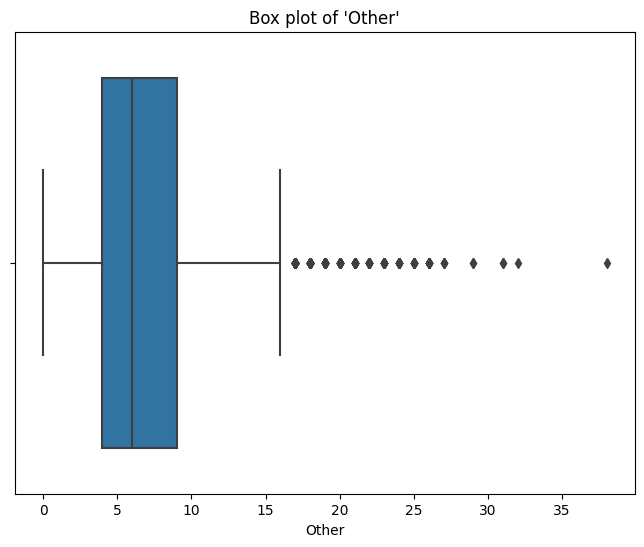

Outliers in 'Other':
       dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
8              2    14   29          33         1                     1   
76             6    14   35          48         1                     0   
84             6     6   24         136         1                     0   
298            0     4   22          46         0                     0   
377            0    16   25          32         0                     0   
...          ...   ...  ...         ...       ...                   ...   
49182          0     5   24         125         0                     1   
49699          5    16   25          31         0                     0   
49799          5    10   26          28         0                     1   
49844          3    20   27          36         1                     1   
49965          6    16   33          43         0                     0   

       enrolled  liked  location  Institutions  ...  SecurityModal  \
8       

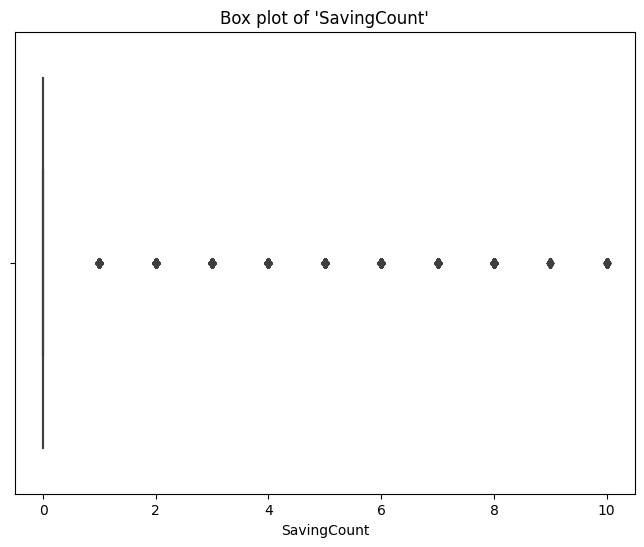

Outliers in 'SavingCount':
       dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
27             2     1   35          35         0                     0   
32             6    20   23          76         0                     0   
40             1     6   25          90         0                     0   
42             1     8   25          24         0                     0   
48             4    13   40          16         0                     0   
...          ...   ...  ...         ...       ...                   ...   
49963          2    23   33          44         0                     0   
49967          0     5   53          21         0                     0   
49972          0    15   24          41         0                     1   
49976          2    20   35          69         0                     0   
49999          4     1   25          26         0                     0   

       enrolled  liked  location  Institutions  ...  SecurityModal  \
27

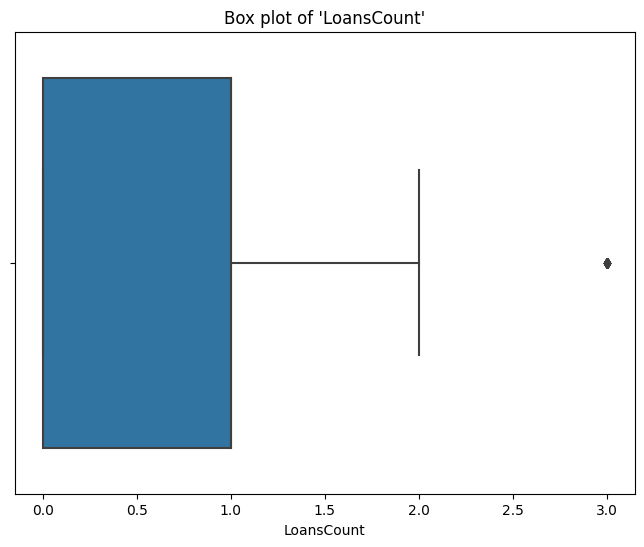

Outliers in 'LoansCount':
       dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
2895           6    18   27          31         1                     1   
4624           5    22   29          33         0                     1   
7051           2    22   26          30         0                     1   
10197          4    11   44          49         0                     0   
12494          3     4   24          47         0                     0   
13533          1     2   33          39         0                     0   
16352          6    12   35          30         0                     1   
16651          5    12   42          42         0                     1   
21000          6     3   28          32         1                     1   
21500          1     6   30          33         0                     0   
22033          4    13   31          43         0                     1   
23336          5    12   23          42         0                     0   

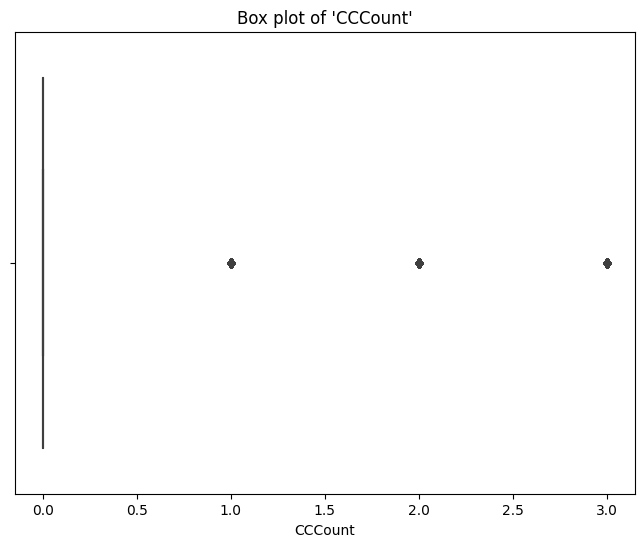

Outliers in 'CCCount':
       dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
11             1    11   32          25         1                     1   
21             5     4   38          42         0                     1   
27             2     1   35          35         0                     0   
32             6    20   23          76         0                     0   
35             3    21   21          32         0                     0   
...          ...   ...  ...         ...       ...                   ...   
49881          4    17   40          23         0                     0   
49905          2     7   17          33         0                     0   
49924          0    18   27          31         0                     0   
49951          5     6   24          36         0                     0   
49967          0     5   53          21         0                     0   

       enrolled  liked  location  Institutions  ...  SecurityModal  \
11    

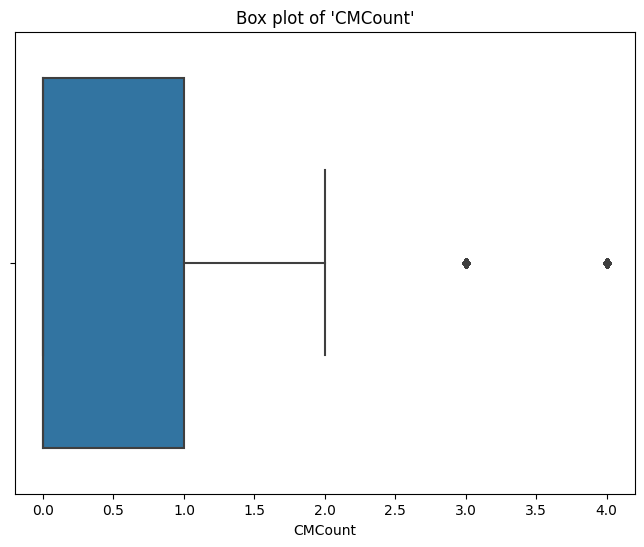

Outliers in 'CMCount':
       dayofweek  hour  age  numscreens  minigame  used_premium_feature  \
3              4    16   28          40         0                     0   
21             5     4   38          42         0                     1   
23             6     2   27          42         0                     0   
31             2     2   25          50         0                     0   
33             0     4   31          37         0                     0   
...          ...   ...  ...         ...       ...                   ...   
49952          2    18   40          49         1                     0   
49971          5    11   19          23         0                     0   
49972          0    15   24          41         0                     1   
49986          0    18   21          13         0                     0   
49991          4    22   45          30         1                     1   

       enrolled  liked  location  Institutions  ...  SecurityModal  \
3     

In [ ]:
 outlier_analysis(df,df_num)

## CORRELATION MAP

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def correlation_heatmap(df, independent_numerical):

    # Calculate Pearson correlation matrix
    correlation_matrix = df[independent_numerical].corr()

    # Generate a correlation heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title("Pearson Correlation Heatmap")
    plt.show()

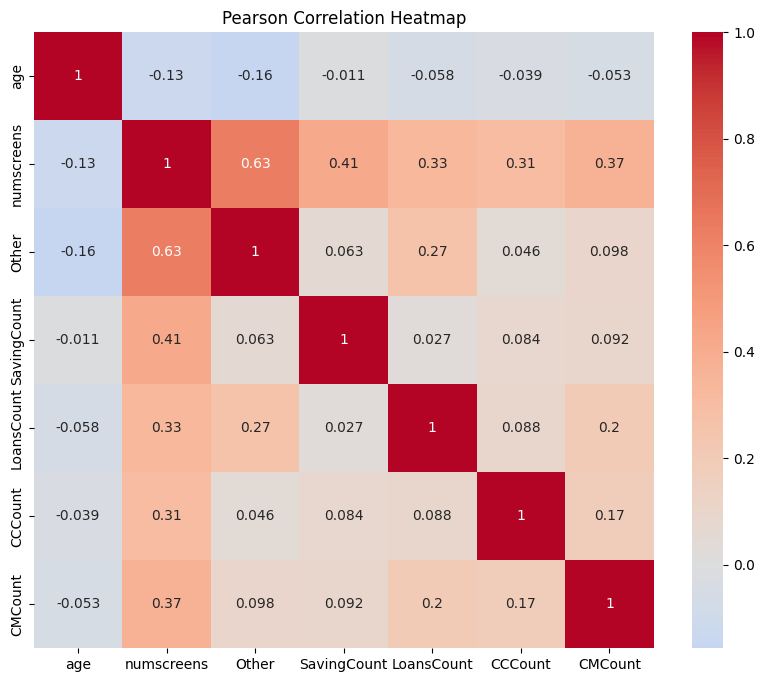

In [ ]:
 correlation_heatmap(df,df_num)

# HYPOTHEIS TESTING

## ANNOVA

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_test_numerical(df, independent_numerical, target_categorical, alpha=0.05):

    independent_columns = []

    for column in independent_numerical:
        formula = f"{column} ~ {target_categorical}"
        model = ols(formula, data=df).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)

        p_value = anova_table.loc[target_categorical, 'PR(>F)']
        print(f"ANOVA test result for '{column}' and '{target_categorical}':")
        print(anova_table)
        print("")

        if p_value < alpha:
            print(f"'{column}' is dependent on '{target_categorical}' (p-value < {alpha})")
        else:
            print(f"'{column}' is independent of '{target_categorical}' (p-value >= {alpha})")
            independent_columns.append(column)

        print("--------------------------------")

    return independent_columns

In [ ]:
 independent_cols = anova_test_numerical(df,df_num,"enrolled")

ANOVA test result for 'age' and 'enrolled':
                sum_sq       df           F         PR(>F)
enrolled  1.003679e+05      1.0  875.082228  1.149132e-190
Residual  5.720090e+06  49872.0         NaN            NaN

'age' is dependent on 'enrolled' (p-value < 0.05)
--------------------------------
ANOVA test result for 'numscreens' and 'enrolled':
                sum_sq       df            F  PR(>F)
enrolled  5.420238e+05      1.0  2292.113909     0.0
Residual  1.179340e+07  49872.0          NaN     NaN

'numscreens' is dependent on 'enrolled' (p-value < 0.05)
--------------------------------
ANOVA test result for 'Other' and 'enrolled':
                 sum_sq       df            F  PR(>F)
enrolled   83473.827058      1.0  7007.439135     0.0
Residual  594083.890390  49872.0          NaN     NaN

'Other' is dependent on 'enrolled' (p-value < 0.05)
--------------------------------
ANOVA test result for 'SavingCount' and 'enrolled':
                sum_sq       df          F      

In [ ]:
print("Independent Columns:", independent_cols)


Independent Columns: []


## CHISQUARE

In [ ]:
import pandas as pd
import scipy.stats as stats

def chi_square_test(df, independent_categorical, target_categorical, alpha=0.05):

    independent_columns = []

    for column in independent_categorical:
        contingency_table = pd.crosstab(df[column], df[target_categorical])
        chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

        print(f"Chi-square test result for '{column}' and '{target_categorical}':")
        print("Contingency Table:")
        print(contingency_table)
        print(f"Chi-square statistic: {chi2}")
        print(f"P-value: {p_value}")

        if p_value < alpha:
            print(f"'{column}' is dependent on '{target_categorical}' (p-value < {alpha})")
        else:
            print(f"'{column}' is independent of '{target_categorical}' (p-value >= {alpha})")
            independent_columns.append(column)

        print("--------------------------------")

    return independent_columns


In [ ]:
 independent_cols = chi_square_test(df, df_cat,"enrolled")
 print("Independent Columns:", independent_cols)


Chi-square test result for 'dayofweek' and 'enrolled':
Contingency Table:
enrolled      0     1
dayofweek            
0          2899  4602
1          2816  4306
2          2339  3960
3          2394  4244
4          2927  4587
5          2728  4677
6          2767  4628
Chi-square statistic: 28.733062803989846
P-value: 6.833634078971146e-05
'dayofweek' is dependent on 'enrolled' (p-value < 0.05)
--------------------------------
Chi-square test result for 'hour' and 'enrolled':
Contingency Table:
enrolled     0     1
hour                
0          920  1740
1          821  1614
2          778  1714
3          825  1329
4          573  1354
5          467  1100
6          382   898
7          405   701
8          310   585
9          307   463
10         265   583
11         402   706
12         513   992
13         833  1113
14         822  1483
15        1371  1603
16        1033  1749
17        1273  1532
18        1017  1703
19        1198  1501
20         998  1812
21        1216 

In [ ]:
 print("Independent Columns:", independent_cols)

Independent Columns: ['liked', 'EditProfile', 'NetworkFailure']


In [ ]:
df.drop(independent_cols,axis=1,inplace=True)

# ONE HOT ENCODING AND STANDARD SCALING

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df1 = pd.get_dummies(data=df, columns = ['dayofweek', 'hour'])
df1.head()

age  numscreens  minigame  used_premium_feature  enrolled  location  \
0   23          15         0                     0         0         0   
1   24          13         0                     0         0         1   
2   23           3         0                     1         0         0   
3   28          40         0                     0         1         1   
4   31          32         0                     0         1         0   

   Institutions  VerifyPhone  BankVerification  VerifyDateOfBirth  ...  \
0             0            1                 0                  1  ...   
1             1            1                 0                  1  ...   
2             0            0                 0                  0  ...   
3             0            1                 0                  1  ...   
4             1            1                 1                  0  ...   

   hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        1        0        0   
3        0        0        1        0        0        0        0        0   
4        0        0        0        0        1        0        0        0   

   hour_22  hour_23  
0        0        0  
1        0        0  
2        0        0  
3        0        0  
4        0        0  

[5 rows x 75 columns]

In [ ]:
scaler = StandardScaler()
df1[df_num] = scaler.fit_transform(df1[df_num])
df1.head()

age  numscreens  minigame  used_premium_feature  enrolled  location  \
0 -0.806555   -0.387800         0                     0         0         0   
1 -0.713988   -0.514972         0                     0         0         1   
2 -0.806555   -1.150830         0                     1         0         0   
3 -0.343718    1.201845         0                     0         1         1   
4 -0.066015    0.693158         0                     0         1         0   

   Institutions  VerifyPhone  BankVerification  VerifyDateOfBirth  ...  \
0             0            1                 0                  1  ...   
1             1            1                 0                  1  ...   
2             0            0                 0                  0  ...   
3             0            1                 0                  1  ...   
4             1            1                 1                  0  ...   

   hour_14  hour_15  hour_16  hour_17  hour_18  hour_19  hour_20  hour_21  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        1        0        0   
3        0        0        1        0        0        0        0        0   
4        0        0        0        0        1        0        0        0   

   hour_22  hour_23  
0        0        0  
1        0        0  
2        0        0  
3        0        0  
4        0        0  

[5 rows x 75 columns]

In [ ]:
x=df1.drop("enrolled",axis=1)
y=df1["enrolled"]

In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Perform stratified train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
x_train.shape

(39899, 74)

In [ ]:
x_test.shape

(9975, 74)

In [ ]:
y_train.shape

(39899,)

In [ ]:
y_test.shape

(9975,)

# MODELLING

## BASELINE MODELS

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

def plot_confusion_matrix(conf_matrix, class_labels, title, ax):
    im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=conf_matrix.max())
    ax.set_title(title)
    plt.colorbar(im, ax=ax)
    tick_marks = np.arange(len(class_labels))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(class_labels, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(class_labels)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

    # Display the count of predicted labels in each cell
    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            ax.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

def plot_roc_curve(fpr, tpr, auc_score, title, ax):
    ax.plot(fpr, tpr, label=f"{title} (AUC = {auc_score:.2f})")
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {title}')
    ax.legend(loc='lower right')

def classify_and_plot_metrics(xtrain, ytrain, xtest, ytest):
    classifiers = [
        ("Logistic Regression", LogisticRegression(solver='liblinear')),
        ("Random Forest Classifier", RandomForestClassifier()),
        ("XGBoost Classifier", XGBClassifier()),
        ("Gradient Boosting Classifier", GradientBoostingClassifier()),
        ("AdaBoost Classifier", AdaBoostClassifier()),
        ("Naive Bayes Classifier", GaussianNB())
    ]

    num_rows = int(np.ceil(len(classifiers) / 3))  # Number of subplot rows
    fig, axes = plt.subplots(nrows=num_rows, ncols=6, figsize=(20, 5*num_rows))

    results = []

    for i, (name, clf) in enumerate(classifiers):
        clf.fit(xtrain, ytrain)
        y_pred = clf.predict(xtest)
        y_prob = clf.predict_proba(xtest)[:, 1]

        accuracy = accuracy_score(ytest, y_pred)
        precision = precision_score(ytest, y_pred)
        recall = recall_score(ytest, y_pred)
        auc_score = roc_auc_score(ytest, y_prob)

        conf_matrix = confusion_matrix(ytest, y_pred)

        fpr, tpr, _ = roc_curve(ytest, y_prob)

        row = i // 3
        col_confusion = i % 3
        col_roc = col_confusion + 3

        ax_confusion = axes[row, col_confusion]
        ax_roc = axes[row, col_roc]

        plot_confusion_matrix(conf_matrix, ['0', '1'], f'Confusion Matrix - {name}', ax_confusion)
        plot_roc_curve(fpr, tpr, auc_score, name, ax_roc)

        results.append([name, accuracy, precision, recall, auc_score])

        print(f"Classifier: {name}")
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Classification Report:")
        print(classification_report(ytest, y_pred))
        print(f"AUC Score: {auc_score:.2f}")
        print("\n")

    plt.tight_layout()

    # Create a DataFrame from the results list
    columns = ["Classifier", "Accuracy", "Precision", "Recall", "AUC"]
    results_df = pd.DataFrame(results, columns=columns)

    print("Results DataFrame:")
    print(results_df)

    return results_df


Classifier: Logistic Regression
Confusion Matrix:
[[2426 1348]
 [1055 5146]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.64      0.67      3774
           1       0.79      0.83      0.81      6201

    accuracy                           0.76      9975
   macro avg       0.74      0.74      0.74      9975
weighted avg       0.76      0.76      0.76      9975

AUC Score: 0.83


Classifier: Random Forest Classifier
Confusion Matrix:
[[2552 1222]
 [ 991 5210]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70      3774
           1       0.81      0.84      0.82      6201

    accuracy                           0.78      9975
   macro avg       0.77      0.76      0.76      9975
weighted avg       0.78      0.78      0.78      9975

AUC Score: 0.86


Classifier: XGBoost Classifier
Confusion Matrix:
[[2669 1105]
 [1039 5162]]
Classification Report:
      

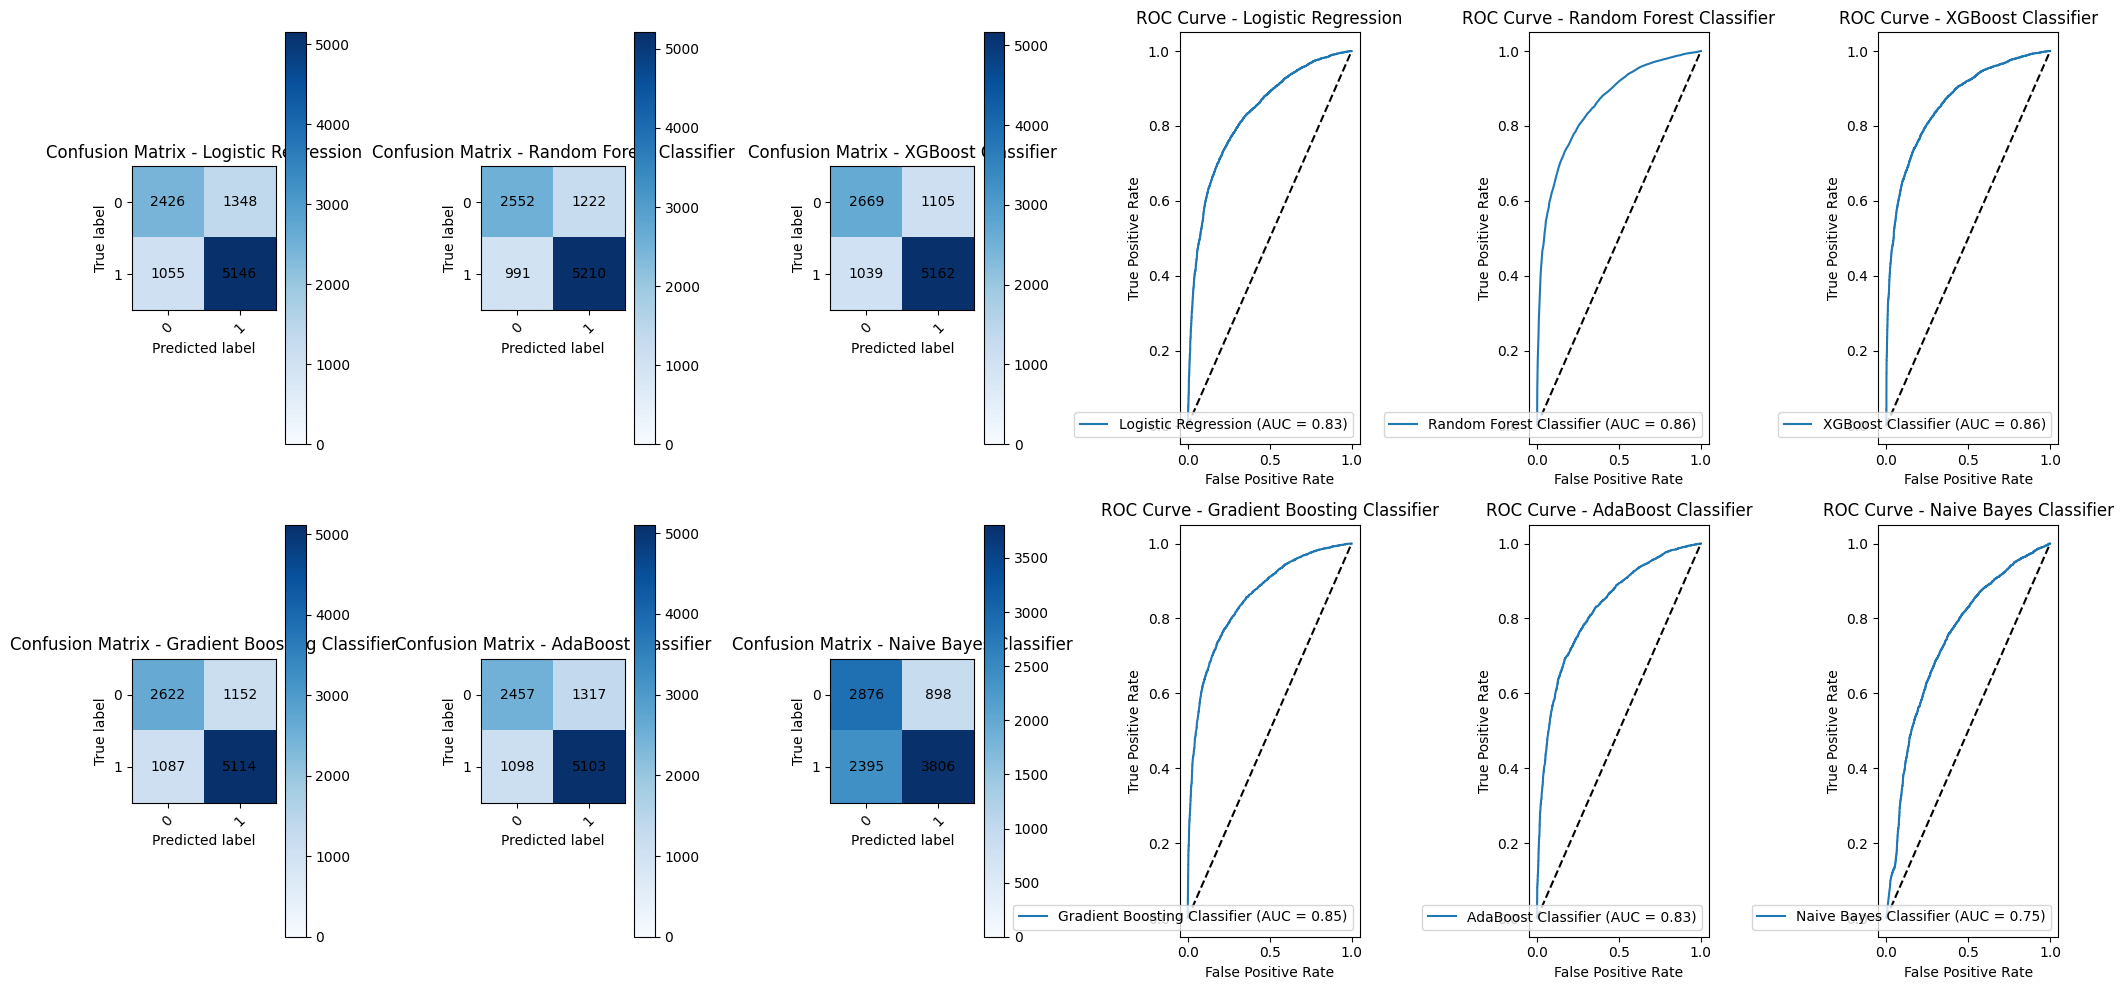

In [ ]:
 results_df = classify_and_plot_metrics(x_train, y_train, x_test, y_test)

In [ ]:
print(results_df)

                     Classifier  Accuracy  Precision    Recall       AUC
0           Logistic Regression  0.759098   0.792424  0.829866  0.830152
1      Random Forest Classifier  0.778145   0.810012  0.840187  0.859086
2            XGBoost Classifier  0.785063   0.823680  0.832446  0.863558
3  Gradient Boosting Classifier  0.775539   0.816151  0.824706  0.853395
4           AdaBoost Classifier  0.757895   0.794860  0.822932  0.830239
5        Naive Bayes Classifier  0.669875   0.809099  0.613772  0.745476


##PCA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

def plot_variance_vs_components(pca):
    plt.figure(figsize=(10, 6))
    plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Variance vs. Number of Components')
    plt.grid(True)
    plt.show()

def plot_custom_confusion_matrix(conf_matrix, class_labels, title, ax):
    im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=conf_matrix.max())
    ax.set_title(title)
    plt.colorbar(im, ax=ax)
    tick_marks = np.arange(len(class_labels))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(class_labels, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(class_labels)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

    # Display the count of predicted labels in each cell
    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            ax.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

def plot_custom_roc_curve(fpr, tpr, auc_score, title, ax):
    ax.plot(fpr, tpr, label=f"{title} (AUC = {auc_score:.2f})")
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {title}')
    ax.legend(loc='lower right')

def classify_and_plot_custom_metrics(xtrain, ytrain, xtest, ytest):
    pca = PCA(0.95)
    xtrain_pca = pca.fit_transform(xtrain)
    xtest_pca = pca.transform(xtest)

    plot_variance_vs_components(pca)

    classifiers = [
        ("Logistic Regression", LogisticRegression(solver='liblinear')),
        ("Random Forest Classifier", RandomForestClassifier()),
        ("XGBoost Classifier", XGBClassifier()),
        ("Gradient Boosting Classifier", GradientBoostingClassifier()),
        ("AdaBoost Classifier", AdaBoostClassifier()),
        ("Naive Bayes Classifier", GaussianNB())
    ]

    num_rows = int(np.ceil(len(classifiers) / 3))  # Number of subplot rows
    fig, axes = plt.subplots(nrows=num_rows, ncols=6, figsize=(20, 5*num_rows))

    results = []

    for i, (name, clf) in enumerate(classifiers):
        clf.fit(xtrain_pca, ytrain)
        y_pred = clf.predict(xtest_pca)
        y_prob = clf.predict_proba(xtest_pca)[:, 1]

        accuracy = accuracy_score(ytest, y_pred)
        precision = precision_score(ytest, y_pred)
        recall = recall_score(ytest, y_pred)
        auc_score = roc_auc_score(ytest, y_prob)

        conf_matrix = confusion_matrix(ytest, y_pred)

        fpr, tpr, _ = roc_curve(ytest, y_prob)

        row = i // 3
        col_confusion = i % 3
        col_roc = col_confusion + 3

        ax_confusion = axes[row, col_confusion]
        ax_roc = axes[row, col_roc]

        plot_custom_confusion_matrix(conf_matrix, ['0', '1'], f'Confusion Matrix - {name}', ax_confusion)
        plot_custom_roc_curve(fpr, tpr, auc_score, name, ax_roc)

        results.append([name, accuracy, precision, recall, auc_score])

        print(f"Classifier: {name}")
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Classification Report:")
        print(classification_report(ytest, y_pred))
        print(f"AUC Score: {auc_score:.2f}")
        print("\n")

    plt.tight_layout()

    # Create a DataFrame from the results list
    columns = ["Classifier", "Accuracy", "Precision", "Recall", "AUC"]
    results_df = pd.DataFrame(results, columns=columns)

    print("Results DataFrame:")
    print(results_df)


    return results_df



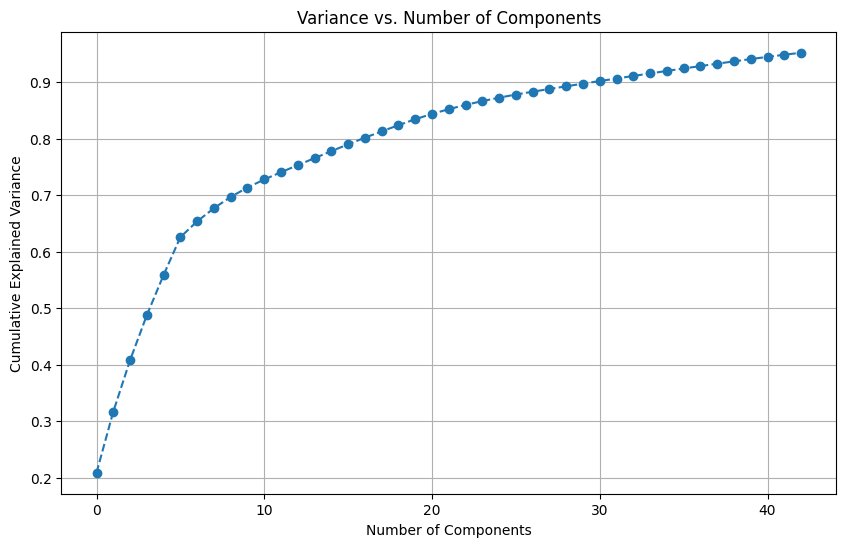

Classifier: Logistic Regression
Confusion Matrix:
[[2313 1461]
 [1081 5120]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.61      0.65      3774
           1       0.78      0.83      0.80      6201

    accuracy                           0.75      9975
   macro avg       0.73      0.72      0.72      9975
weighted avg       0.74      0.75      0.74      9975

AUC Score: 0.82


Classifier: Random Forest Classifier
Confusion Matrix:
[[2413 1361]
 [ 988 5213]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.64      0.67      3774
           1       0.79      0.84      0.82      6201

    accuracy                           0.76      9975
   macro avg       0.75      0.74      0.74      9975
weighted avg       0.76      0.76      0.76      9975

AUC Score: 0.84


Classifier: XGBoost Classifier
Confusion Matrix:
[[2534 1240]
 [1086 5115]]
Classification Report:
      

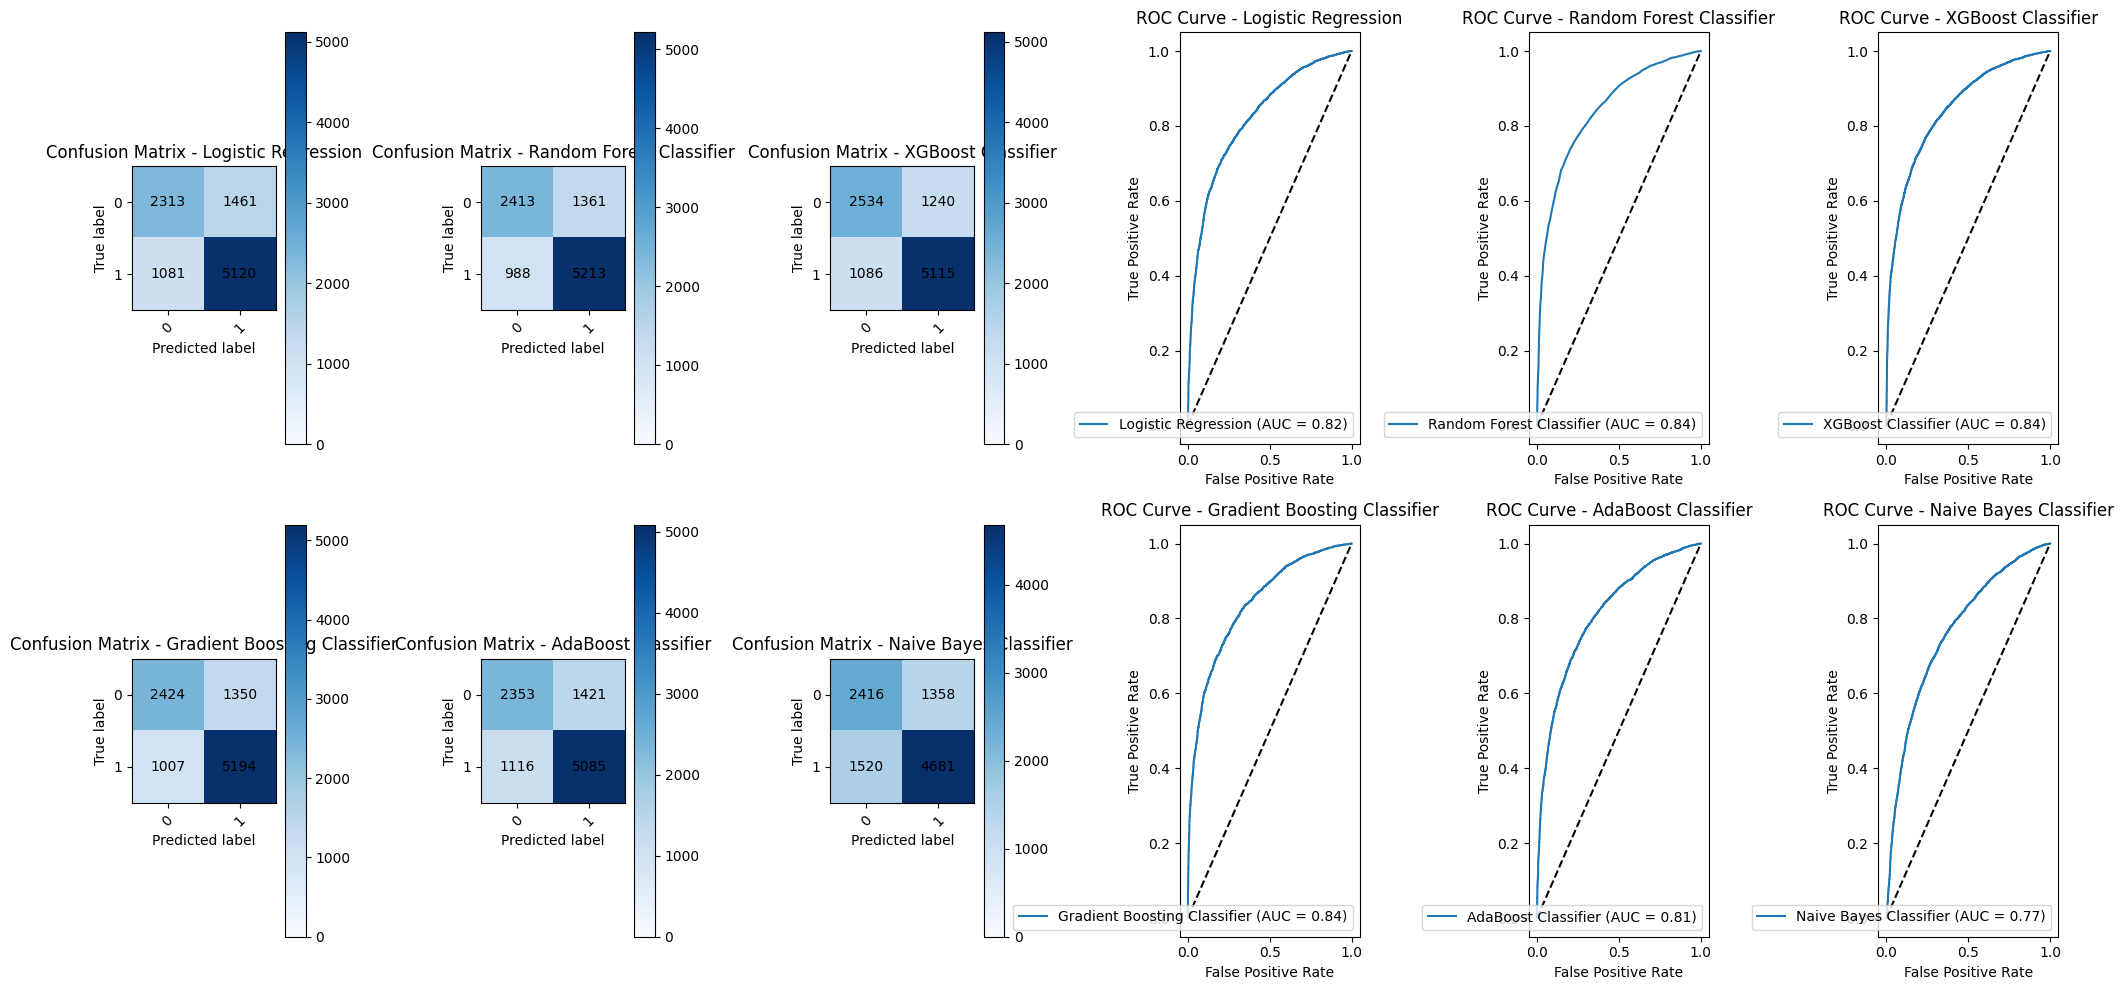

In [ ]:
 results_df1 = classify_and_plot_custom_metrics(x_train, y_train, x_test, y_test)

In [ ]:
print(results_df1)

                     Classifier  Accuracy  Precision    Recall       AUC
0           Logistic Regression  0.745163   0.777997  0.825673  0.821174
1      Random Forest Classifier  0.764511   0.792972  0.840671  0.841677
2            XGBoost Classifier  0.766817   0.804878  0.824867  0.843914
3  Gradient Boosting Classifier  0.763709   0.793704  0.837607  0.838624
4           AdaBoost Classifier  0.745664   0.781586  0.820029  0.814683
5        Naive Bayes Classifier  0.711479   0.775128  0.754878  0.765924


## FEATURE SELECTION USING EXTRA TREE CLASSIFIER

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

def plot_feature_importance(x_train, y_train, x_test, _y_test):
    # Initialize the RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Fit the model on the training data
    clf.fit(x_train, y_train)

    # Get feature importances
    importances = clf.feature_importances_

    # Get feature names (assuming x_train is a DataFrame or a numpy array with named columns)
    feature_names = x_train.columns if hasattr(x_train, 'columns') else np.arange(len(importances))

    # Sort indices based on feature importances
    indices = np.argsort(importances)[::-1]

    # Get top 30 feature indices and their importances
    top_indices = indices[:30]
    top_importances = importances[top_indices]

    # Set up a colorful color map
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_indices)))

    # Plotting
    plt.figure(figsize=(10, 8))
    plt.title("Top 30 Feature Importance")
    bars = plt.bar(range(len(top_indices)), top_importances, align="center", color=colors)
    plt.xticks(range(len(top_indices)), [feature_names[i] for i in top_indices], rotation='vertical')

    plt.xlim([-1, len(top_indices)])
    plt.tight_layout()
    plt.show()



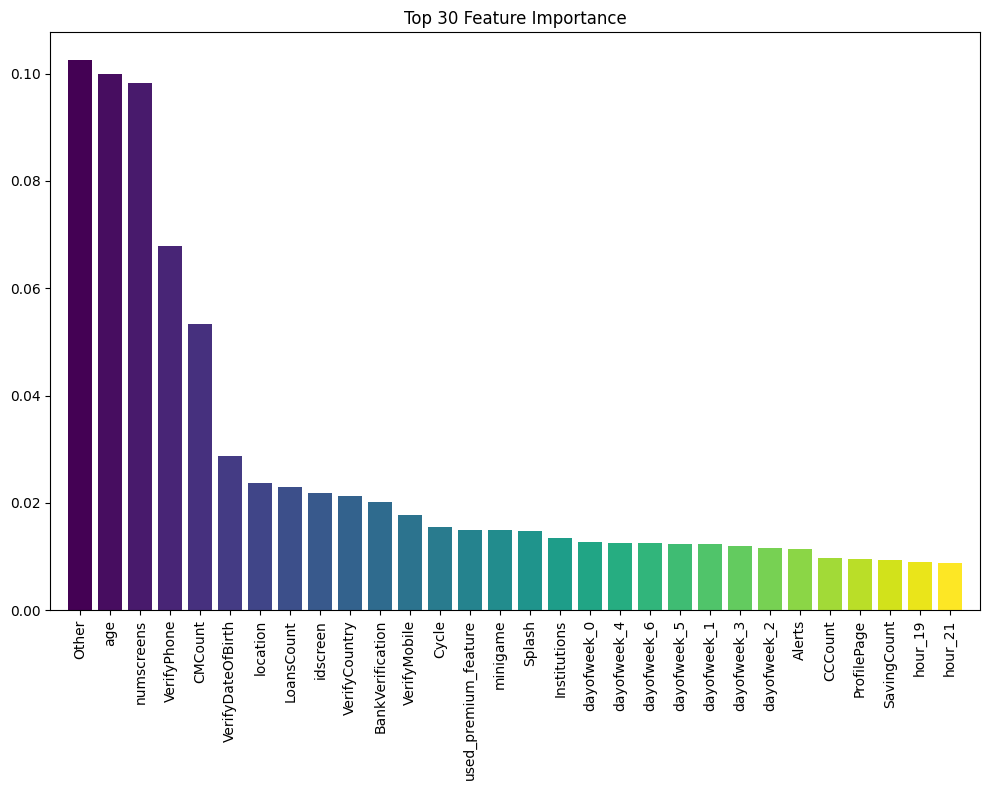

In [ ]:
 plot_feature_importance(x_train, y_train, x_test, y_test)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectFromModel

def plot_confusion_matrix_extratree(conf_matrix, class_labels, title, ax):
    im = ax.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues, vmin=0, vmax=conf_matrix.max())
    ax.set_title(title)
    plt.colorbar(im, ax=ax)
    tick_marks = np.arange(len(class_labels))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(class_labels, rotation=45)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(class_labels)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')

    # Display the count of predicted labels in each cell
    for i in range(len(class_labels)):
        for j in range(len(class_labels)):
            ax.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')

def plot_roc_curve_extratree(fpr, tpr, auc_score, title, ax):
    ax.plot(fpr, tpr, label=f"{title} (AUC = {auc_score:.2f})")
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title(f'ROC Curve - {title}')
    ax.legend(loc='lower right')

def classify_and_plot_metrics_extratree(xtrain, ytrain, xtest, ytest):
    classifiers = [
        ("Logistic Regression", LogisticRegression(solver='liblinear')),
        ("Random Forest Classifier", RandomForestClassifier()),
        ("XGBoost Classifier", XGBClassifier()),
        ("Gradient Boosting Classifier", GradientBoostingClassifier()),
        ("AdaBoost Classifier", AdaBoostClassifier()),
        ("Naive Bayes Classifier", GaussianNB())
    ]

    num_rows = int(np.ceil(len(classifiers) / 3))  # Number of subplot rows
    fig, axes = plt.subplots(nrows=num_rows, ncols=6, figsize=(20, 5*num_rows))

    results = []

    # Perform feature selection using Extra Trees Classifier
    etc = ExtraTreesClassifier(n_estimators=100, random_state=42)
    etc.fit(xtrain, ytrain)
    sfm = SelectFromModel(etc, max_features=30)
    xtrain_selected = sfm.transform(xtrain)
    xtest_selected = sfm.transform(xtest)

    selected_feature_indices = sfm.get_support(indices=True)
    selected_feature_names = [f"Feature {i+1}" for i in selected_feature_indices]
    print("Selected Features:")
    print(selected_feature_names)

    for i, (name, clf) in enumerate(classifiers):
        clf.fit(xtrain_selected, ytrain)
        y_pred = clf.predict(xtest_selected)
        y_prob = clf.predict_proba(xtest_selected)[:, 1]

        accuracy = accuracy_score(ytest, y_pred)
        precision = precision_score(ytest, y_pred)
        recall = recall_score(ytest, y_pred)
        auc_score = roc_auc_score(ytest, y_prob)

        conf_matrix = confusion_matrix(ytest, y_pred)

        fpr, tpr, _ = roc_curve(ytest, y_prob)

        row = i // 3
        col_confusion = i % 3
        col_roc = col_confusion + 3

        ax_confusion = axes[row, col_confusion]
        ax_roc = axes[row, col_roc]

        plot_confusion_matrix_extratree(conf_matrix, ['0', '1'], f'Confusion Matrix - {name}', ax_confusion)
        plot_roc_curve_extratree(fpr, tpr, auc_score, name, ax_roc)

        results.append([name, accuracy, precision, recall, auc_score])

        print(f"Classifier: {name}")
        print("Confusion Matrix:")
        print(conf_matrix)
        print("Classification Report:")
        print(classification_report(ytest, y_pred))
        print(f"AUC Score: {auc_score:.2f}")
        print("\n")

    plt.tight_layout()

    # Create a DataFrame from the results list
    columns = ["Classifier", "Accuracy", "Precision", "Recall", "AUC"]
    results_df = pd.DataFrame(results, columns=columns)

    print("Results DataFrame:")
    print(results_df)

    return results_df



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected Features:
['Feature 1', 'Feature 2', 'Feature 3', 'Feature 4', 'Feature 5', 'Feature 6', 'Feature 7', 'Feature 8', 'Feature 9', 'Feature 11', 'Feature 12', 'Feature 13', 'Feature 14', 'Feature 19', 'Feature 39', 'Feature 41', 'Feature 43', 'Feature 44', 'Feature 45', 'Feature 48', 'Feature 49', 'Feature 50']
Classifier: Logistic Regression
Confusion Matrix:
[[2384 1390]
 [1138 5063]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.63      0.65      3774
           1       0.78      0.82      0.80      6201

    accuracy                           0.75      9975
   macro avg       0.73      0.72      0.73      9975
weighted avg       0.74      0.75      0.74      9975

AUC Score: 0.82


Classifier: Random Forest Classifier
Confusion Matrix:
[[2534 1240]
 [1075 5126]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.67      0.69      3774
           1       0.8

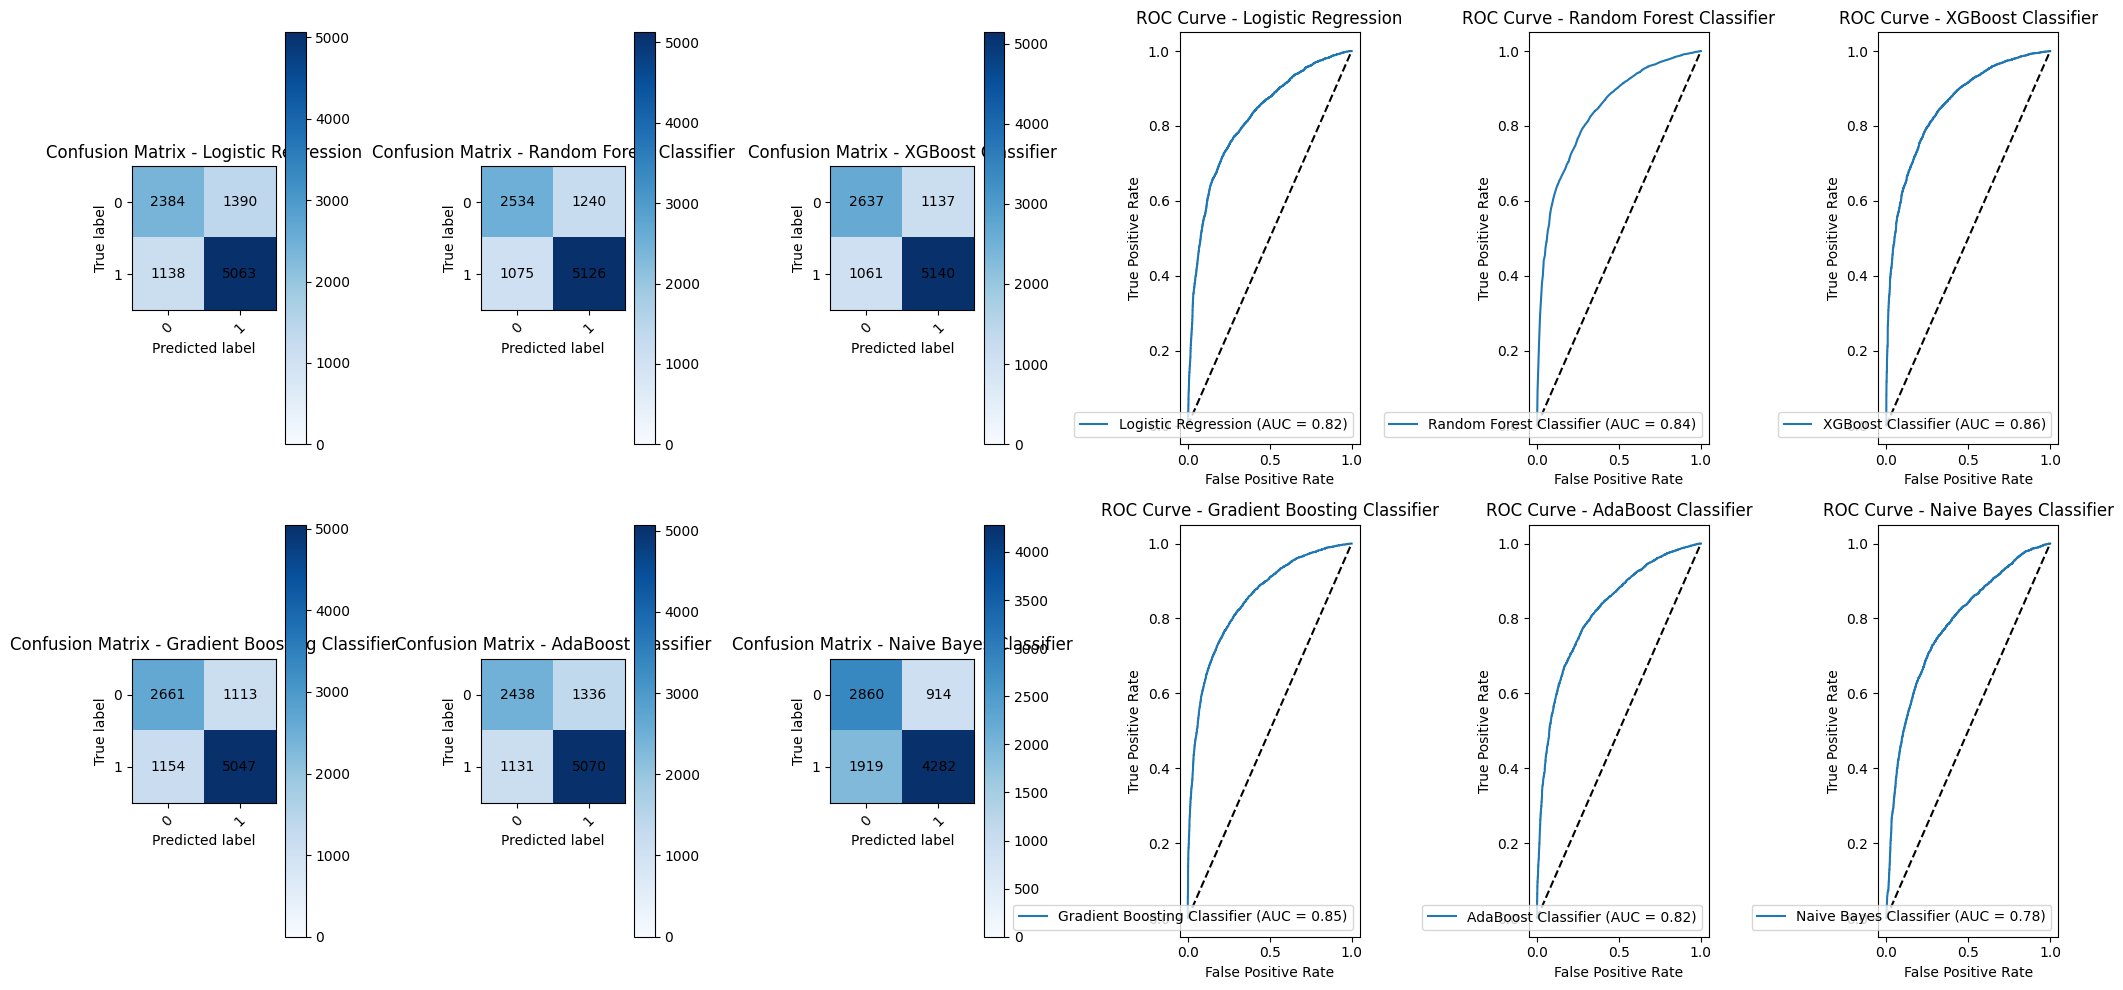

In [ ]:
results_df2 = classify_and_plot_metrics_extratree(x_train, y_train, x_test, y_test)


In [ ]:
print(results_df2)

                     Classifier  Accuracy  Precision    Recall       AUC
0           Logistic Regression  0.746566   0.784596  0.816481  0.819296
1      Random Forest Classifier  0.767920   0.805215  0.826641  0.840212
2            XGBoost Classifier  0.779649   0.818863  0.828899  0.855531
3  Gradient Boosting Classifier  0.772732   0.819318  0.813901  0.850372
4           AdaBoost Classifier  0.752682   0.791446  0.817610  0.822229
5        Naive Bayes Classifier  0.715990   0.824095  0.690534  0.783860


In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

def evaluate_gradient_boosting(x_train, y_train, x_test, _y_test):
    # Initialize the GradientBoostingClassifier
    clf = GradientBoostingClassifier(random_state=42)

    # Train the model on the training data
    clf.fit(x_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(x_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(_y_test, y_pred)
    precision = precision_score(_y_test, y_pred)
    recall = recall_score(_y_test, y_pred)

    print("Metrics using Gradient Boosting without Hyperparameter Tuning:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)

    # Perform hyperparameter tuning using GridSearchCV
    param_grid = {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.1, 0.01, 0.001],
        'max_depth': [3, 4, 5]
    }

    grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=3)
    grid_search.fit(x_train, y_train)

    # Get the best estimator and its parameters
    best_clf = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Make predictions using the best estimator
    y_pred_best = best_clf.predict(x_test)

    # Calculate evaluation metrics using the best estimator
    accuracy_best = accuracy_score(_y_test, y_pred_best)
    precision_best = precision_score(_y_test, y_pred_best)
    recall_best = recall_score(_y_test, y_pred_best)

    print("\nBest Parameters:", best_params)
    print("\nMetrics using Gradient Boosting with Best Parameters:")
    print("Accuracy:", accuracy_best)
    print("Precision:", precision_best)
    print("Recall:", recall_best)



In [ ]:
 evaluate_gradient_boosting(x_train, y_train, x_test, y_test)

Metrics using Gradient Boosting without Hyperparameter Tuning:
Accuracy: 0.7755388471177945
Precision: 0.8161506543249282
Recall: 0.824705692630221

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

Metrics using Gradient Boosting with Best Parameters:
Accuracy: 0.7841604010025063
Precision: 0.8232194187160652
Recall: 0.831317529430737


# DEEP LEARNING

## USING ADAM

Num GPUs Available:  0
Epoch 1/100
2128/2128 [==============================] - 11s 4ms/step - loss: 0.6177 - accuracy: 0.6753 - val_loss: 0.5035 - val_accuracy: 0.7370
Epoch 2/100
2128/2128 [==============================] - 8s 4ms/step - loss: 0.5303 - accuracy: 0.7317 - val_loss: 0.4844 - val_accuracy: 0.7580
Epoch 3/100
2128/2128 [==============================] - 9s 4ms/step - loss: 0.5156 - accuracy: 0.7431 - val_loss: 0.4797 - val_accuracy: 0.7598
Epoch 4/100
2128/2128 [==============================] - 9s 4ms/step - loss: 0.5093 - accuracy: 0.7460 - val_loss: 0.4783 - val_accuracy: 0.7644
Epoch 5/100
2128/2128 [==============================] - 8s 4ms/step - loss: 0.5073 - accuracy: 0.7510 - val_loss: 0.4768 - val_accuracy: 0.7637
Epoch 6/100
2128/2128 [==============================] - 9s 4ms/step - loss: 0.5014 - accuracy: 0.7531 - val_loss: 0.4721 - val_accuracy: 0.7702
Epoch 7/100
2128/2128 [==============================] - 8s 4ms/step - loss: 0.4960 - accuracy: 0.7572 - v

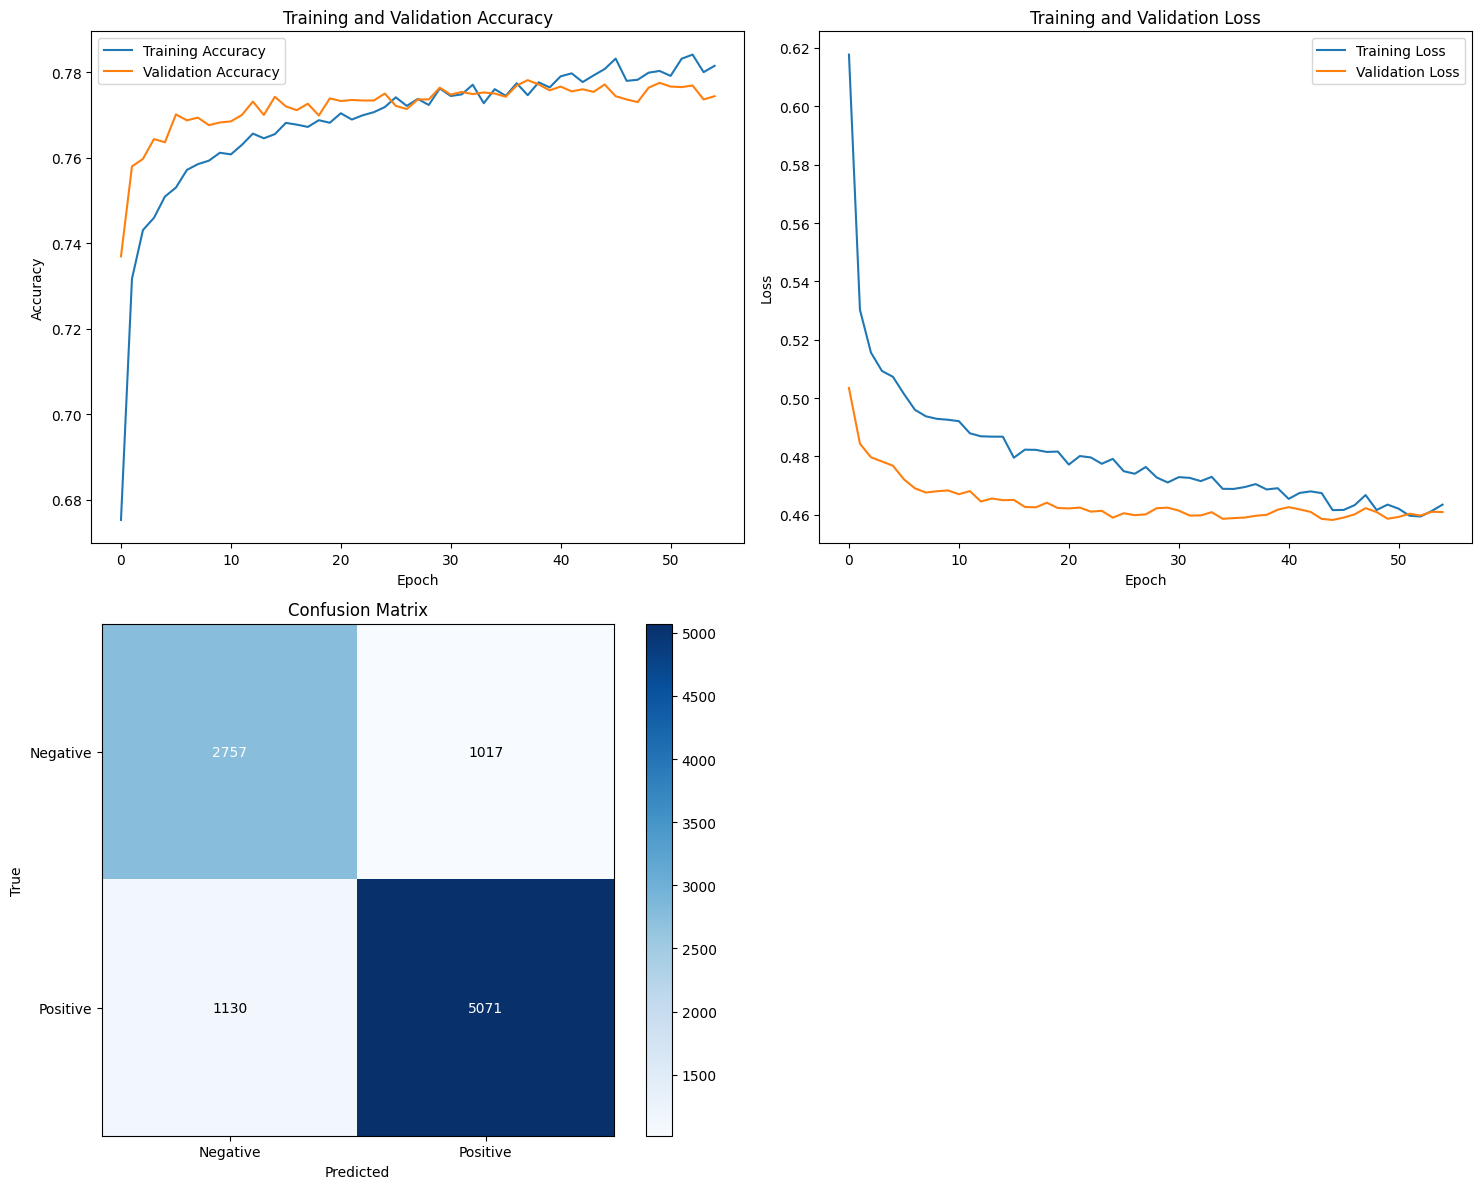

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping

# Check if a GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Generate or load your xtrain, ytrain, xtest, and ytest data

input_dim = x_train.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=input_dim),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, batch_size=15, verbose=1, validation_split=0.2, callbacks=[early_stopping])

y_pred_probs = model.predict(x_test)
y_pred = np.round(y_pred_probs)
cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

y_test_numpy = y_test.to_numpy()
accuracy = np.sum(y_pred == y_test_numpy) / len(y_test_numpy)

plt.figure(figsize=(15, 12))

# Plot training and validation accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot confusion matrix
plt.subplot(2, 2, 3)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')

# Annotate the confusion matrix with numbers
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > np.max(cm) / 2 else 'black')

plt.tight_layout()

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)

plt.show()


## USING SGD

Num GPUs Available:  0
Epoch 1/100
2128/2128 [==============================] - 10s 3ms/step - loss: 0.6216 - accuracy: 0.6627 - val_loss: 0.5408 - val_accuracy: 0.7157
Epoch 2/100
2128/2128 [==============================] - 7s 3ms/step - loss: 0.5637 - accuracy: 0.7003 - val_loss: 0.5265 - val_accuracy: 0.7261
Epoch 3/100
2128/2128 [==============================] - 6s 3ms/step - loss: 0.5532 - accuracy: 0.7106 - val_loss: 0.5147 - val_accuracy: 0.7340
Epoch 4/100
2128/2128 [==============================] - 7s 3ms/step - loss: 0.5429 - accuracy: 0.7163 - val_loss: 0.5111 - val_accuracy: 0.7437
Epoch 5/100
2128/2128 [==============================] - 6s 3ms/step - loss: 0.5351 - accuracy: 0.7248 - val_loss: 0.5008 - val_accuracy: 0.7461
Epoch 6/100
2128/2128 [==============================] - 6s 3ms/step - loss: 0.5289 - accuracy: 0.7312 - val_loss: 0.4980 - val_accuracy: 0.7500
Epoch 7/100
2128/2128 [==============================] - 6s 3ms/step - loss: 0.5239 - accuracy: 0.7345 - v

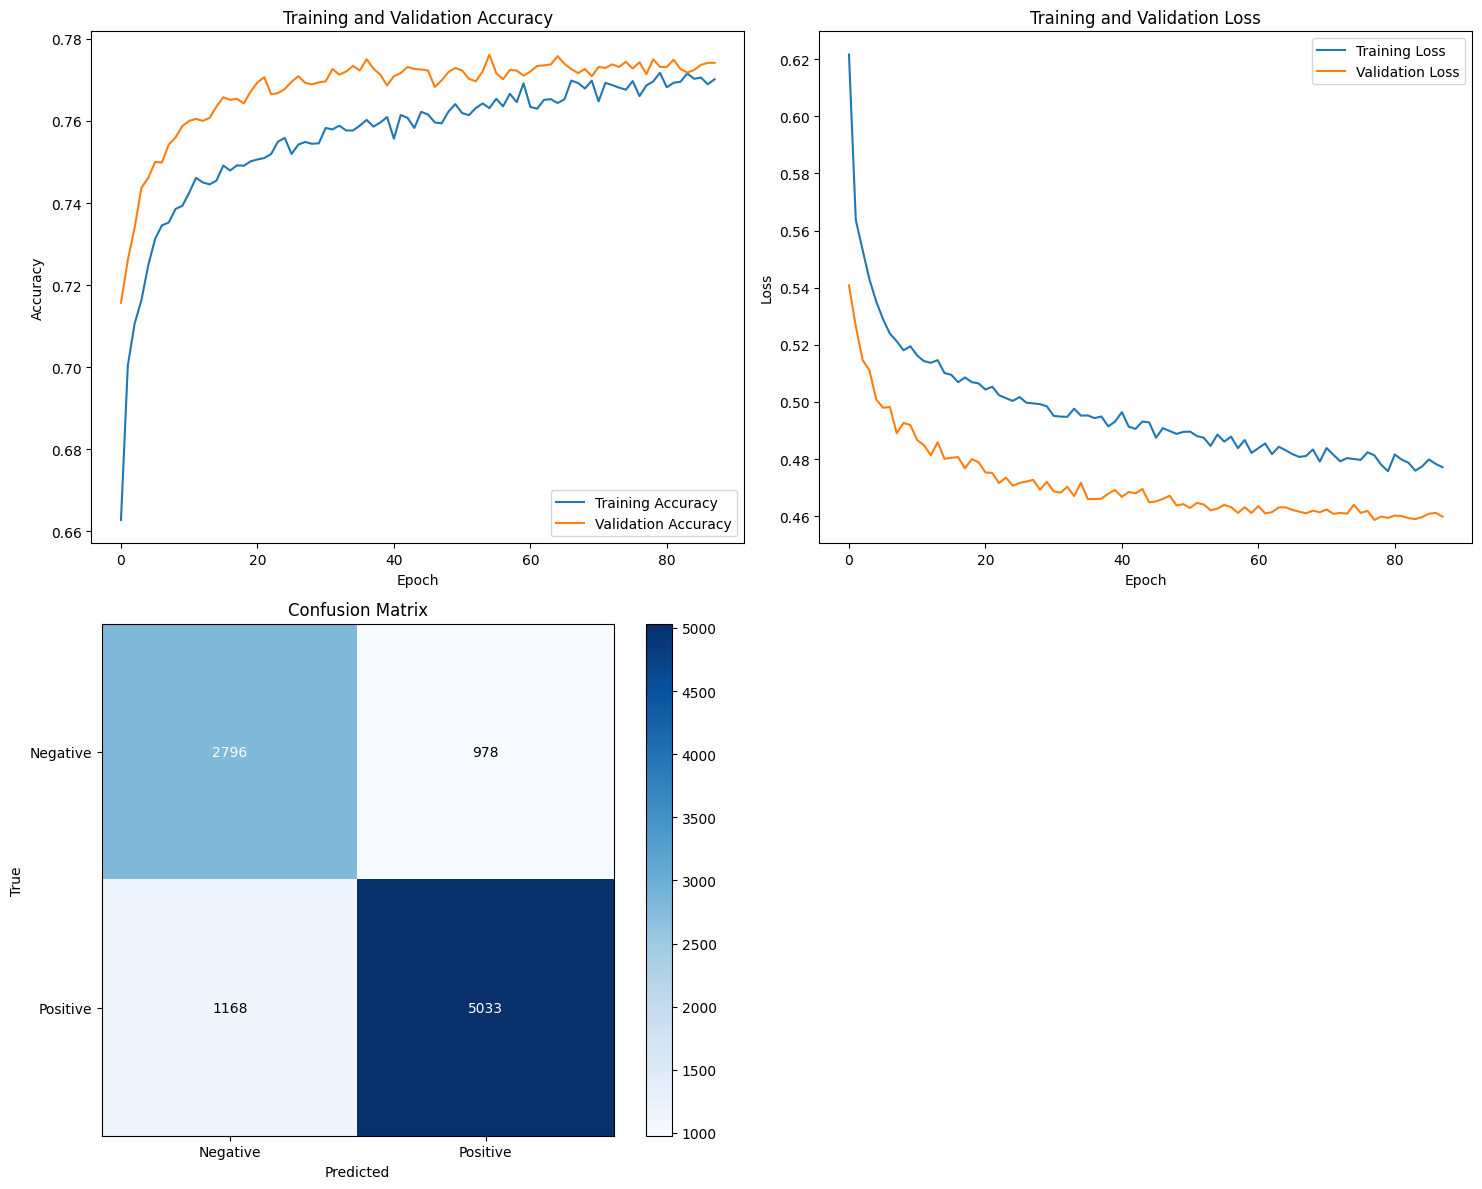

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping

# Check if a GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Generate or load your xtrain, ytrain, xtest, and ytest data

input_dim = x_train.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=input_dim),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])  # Change optimizer to 'sgd'

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, batch_size=15, verbose=1, validation_split=0.2, callbacks=[early_stopping])

y_pred_probs = model.predict(x_test)
y_pred = np.round(y_pred_probs)
cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

y_test_numpy = y_test.to_numpy()
accuracy = np.sum(y_pred == y_test_numpy) / len(y_test_numpy)

plt.figure(figsize=(15, 12))

# Plot training and validation accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot confusion matrix
plt.subplot(2, 2, 3)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')

# Annotate the confusion matrix with numbers
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > np.max(cm) / 2 else 'black')

plt.tight_layout()

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)

plt.show()


## USING RMS PROP

Num GPUs Available:  0
Epoch 1/100
2128/2128 [==============================] - 10s 4ms/step - loss: 0.5935 - accuracy: 0.6947 - val_loss: 0.4925 - val_accuracy: 0.7518
Epoch 2/100
2128/2128 [==============================] - 8s 4ms/step - loss: 0.5188 - accuracy: 0.7432 - val_loss: 0.4849 - val_accuracy: 0.7625
Epoch 3/100
2128/2128 [==============================] - 7s 3ms/step - loss: 0.5106 - accuracy: 0.7514 - val_loss: 0.4785 - val_accuracy: 0.7665
Epoch 4/100
2128/2128 [==============================] - 7s 3ms/step - loss: 0.5067 - accuracy: 0.7525 - val_loss: 0.4751 - val_accuracy: 0.7689
Epoch 5/100
2128/2128 [==============================] - 6s 3ms/step - loss: 0.5046 - accuracy: 0.7558 - val_loss: 0.4746 - val_accuracy: 0.7717
Epoch 6/100
2128/2128 [==============================] - 8s 4ms/step - loss: 0.5010 - accuracy: 0.7599 - val_loss: 0.4712 - val_accuracy: 0.7721
Epoch 7/100
2128/2128 [==============================] - 7s 3ms/step - loss: 0.4992 - accuracy: 0.7586 - v

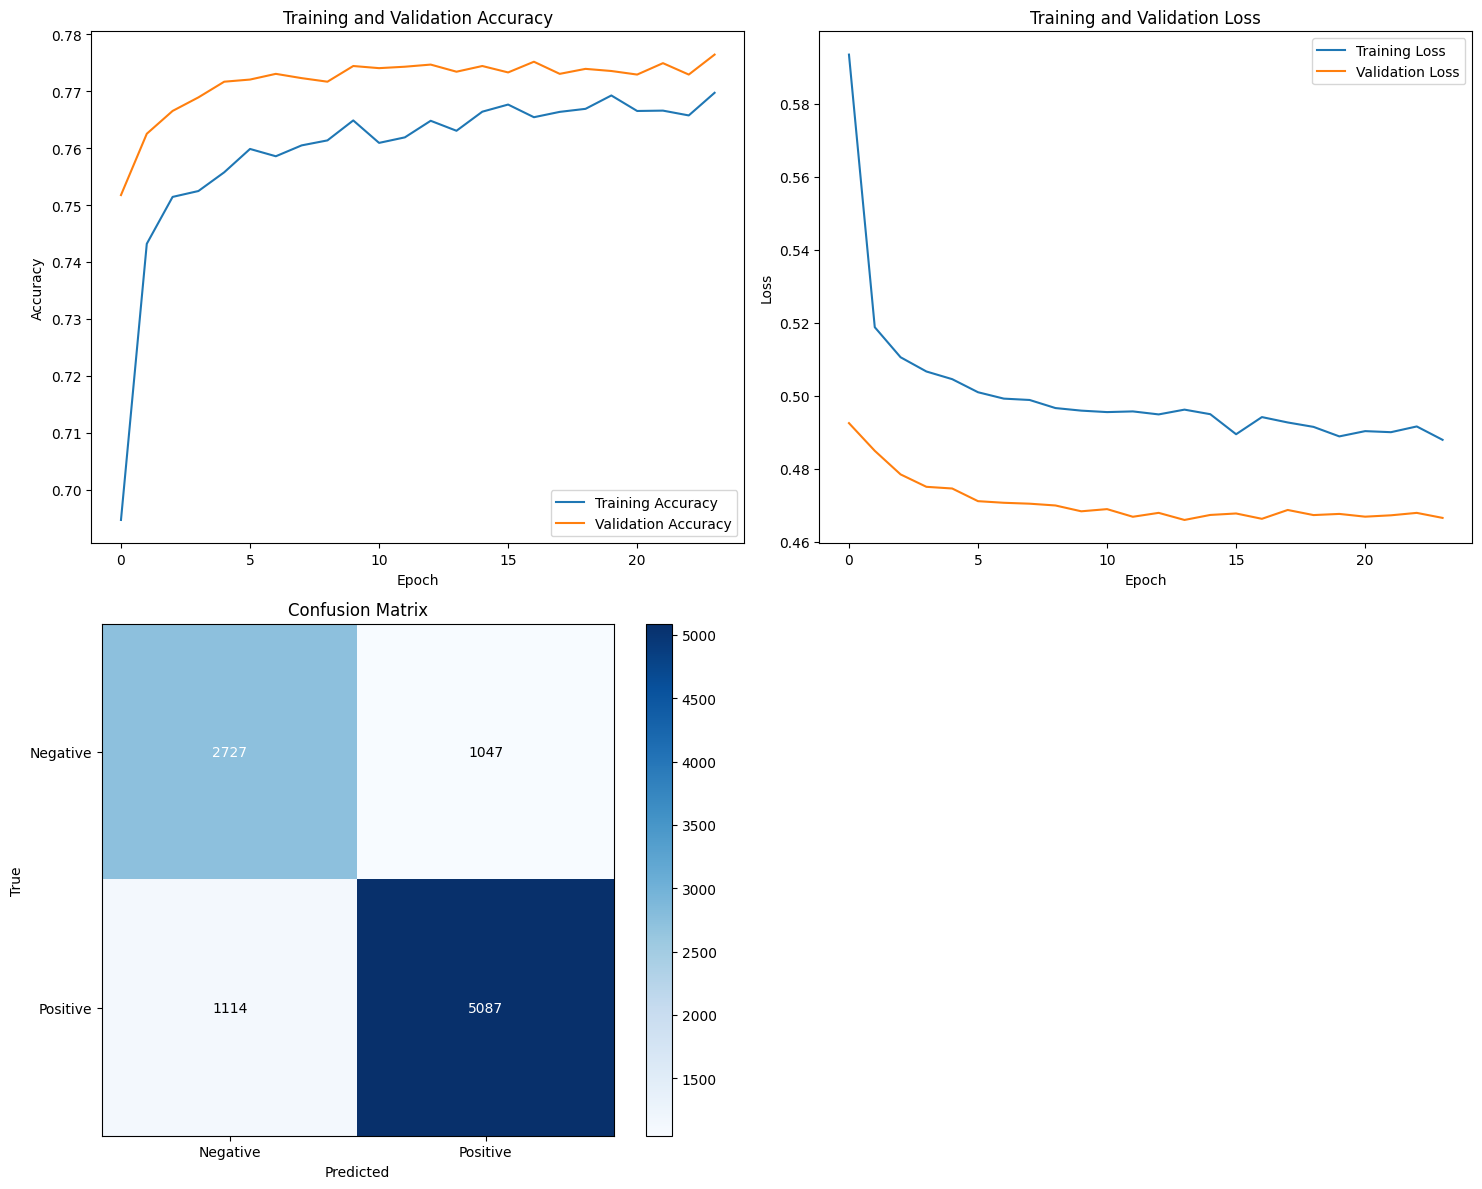

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.callbacks import EarlyStopping

# Check if a GPU is available
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

# Generate or load your xtrain, ytrain, xtest, and ytest data

input_dim = x_train.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_dim=input_dim),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])  # Change optimizer to 'rmsprop'

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=100, batch_size=15, verbose=1, validation_split=0.2, callbacks=[early_stopping])

y_pred_probs = model.predict(x_test)
y_pred = np.round(y_pred_probs)
cm = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

y_test_numpy = y_test.to_numpy()
accuracy = np.sum(y_pred == y_test_numpy) / len(y_test_numpy)

plt.figure(figsize=(15, 12))

# Plot training and validation accuracy
plt.subplot(2, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(2, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot confusion matrix
plt.subplot(2, 2, 3)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')

# Annotate the confusion matrix with numbers
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), ha='center', va='center', color='white' if cm[i, j] > np.max(cm) / 2 else 'black')

plt.tight_layout()

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", class_report)
print("\nAccuracy:", accuracy)

plt.show()


## Keras Tuner

In [ ]:
pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
import keras_tuner
from tensorflow import keras

In [ ]:
import tensorflow as tf
from tensorflow import keras
from kerastuner import HyperParameters

# Early Stopping callback
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)

def build_model(hp):
    model = keras.Sequential()

    # Choose the number of hidden layers
    num_layers = hp.Int('num_layers', min_value=1, max_value=5, default=2)

    # Add hidden layers
    for i in range(num_layers):
        model.add(keras.layers.Dense(
            units=hp.Choice(f'units_{i}', [16, 32, 64, 128, 256]),
            activation='relu'))

        # Add dropout layer after each hidden layer
        dropout_rate = hp.Float(f'dropout_{i}', min_value=0.0, max_value=0.5, default=0.25)
        model.add(keras.layers.Dropout(rate=dropout_rate))

    # Add output layer
    model.add(keras.layers.Dense(1, activation='sigmoid'))

    # Choose optimizer from hyperparameters
    optimizer = hp.Choice('optimizer', ['adam', 'sgd', 'rmsprop'])

    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    return model


In [ ]:
tuner = keras_tuner.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5)

In [ ]:
tuner.search(x_train, y_train, epochs=100, validation_data=(x_test, y_test),batch_size=15,callbacks=[early_stopping])

Trial 5 Complete [00h 04m 03s]
val_accuracy: 0.7883709073066711

Best val_accuracy So Far: 0.7904762029647827
Total elapsed time: 00h 30m 19s


In [ ]:
search_results = tuner.results_summary()

# Display the summary
print(search_results)

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 3 summary
Hyperparameters:
num_layers: 3
units_0: 64
dropout_0: 0.056577048404091945
units_1: 256
dropout_1: 0.07436089466272983
optimizer: sgd
units_2: 64
dropout_2: 0.2854398694206977
units_3: 128
dropout_3: 0.44011208386395406
units_4: 32
dropout_4: 0.017206443151385142
Score: 0.7904762029647827

Trial 4 summary
Hyperparameters:
num_layers: 3
units_0: 256
dropout_0: 0.486139301192436
units_1: 16
dropout_1: 0.4764725883671324
optimizer: adam
units_2: 32
dropout_2: 0.04525181836246106
units_3: 32
dropout_3: 0.33038324333294167
units_4: 128
dropout_4: 0.30459828594014854
Score: 0.7883709073066711

Trial 1 summary
Hyperparameters:
num_layers: 3
units_0: 16
dropout_0: 0.14250294995515017
units_1: 256
dropout_1: 0.49547966389181086
optimizer: sgd
units_2: 64
dropout_2: 0.07865356341902974
Score: 0.7873684167861938

Trial 2 summary
Hyperparameters:
num_layers: 5
units

In [ ]:
# Hyperparameters:
# num_layers: 3
# units_0: 64
# dropout_0: 0.056577048404091945
# units_1: 256
# dropout_1: 0.07436089466272983
# optimizer: sgd
# units_2: 64
# dropout_2: 0.2854398694206977
# units_3: 128
# dropout_3: 0.44011208386395406
# units_4: 32
# dropout_4: 0.017206443151385142
# Score: 0.7904762029647827

In [ ]:
# Selecting best model
best_model = tuner.get_best_models()[0]

In [ ]:
best_model

In [ ]:
from sklearn.metrics import classification_report

y_pred_prob = best_model.predict(x_train)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print classification report
print(classification_report(y_train, y_pred))

1247/1247 [==============================] - 7s 6ms/step
              precision    recall  f1-score   support

           0       0.73      0.72      0.73     15096
           1       0.83      0.84      0.84     24803

    accuracy                           0.79     39899
   macro avg       0.78      0.78      0.78     39899
weighted avg       0.79      0.79      0.79     39899



In [ ]:
from sklearn.metrics import classification_report

y_pred_prob = best_model.predict(x_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Print classification report
print(classification_report(y_test, y_pred))

312/312 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.73      0.71      0.72      3774
           1       0.83      0.84      0.83      6201

    accuracy                           0.79      9975
   macro avg       0.78      0.77      0.78      9975
weighted avg       0.79      0.79      0.79      9975

